# 7506 - Trabajo práctico 1


##### Librerías

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
import scipy as sc
from sklearn.ensemble import IsolationForest
import sklearn as sk
#import geopandas as gpd

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
from IPython.display import display, HTML


def display_side_by_side(dfs: list, captions: list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [3]:
complete_dataset = pd.read_csv("./properati_argentina_2021.csv")
df = complete_dataset.copy()

## Análisis Exploratorio y Preprocesamiento de Datos

Primero, observaremos un poco los datos que tiene el dataset

**Primeras 5 observaciones**

In [4]:
df.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


**Ultimas 5 observaciones**

In [5]:
df.tail()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
460149,EWHC/xcODFkeEA0+pPE6Rw==,2021-01-05,2021-01-08,2021-01-05,-34.599594,-58.588715,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,NaN,NaN,NaN,Venta,Local comercial,NaN,NaN,113.0,113.0,190000.0,USD,LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-
460150,txKUq0LjMaORjJQeeqTOfw==,2021-01-05,2021-11-01,2021-01-05,-34.582777,-58.545220,Bs.As. G.B.A. Zona Norte,General San Martín,Villa Lynch,NaN,NaN,Venta,Local comercial,NaN,NaN,11580.0,11580.0,3500000.0,USD,Nave Industrial - Villa Lynch
460151,E0zwHT18DX8AxhU22hXgng==,2021-01-05,2021-03-01,2021-01-05,NaN,NaN,Bs.As. G.B.A. Zona Norte,General San Martín,NaN,NaN,NaN,Venta,Local comercial,NaN,NaN,915.0,915.0,800000.0,USD,importante edificio comercial en tres plantas ...
460152,Ec4Tvy/WX5f6RgfaJf2FHQ==,2021-01-05,2021-11-28,2021-01-05,-33.226234,-60.331848,Santa Fe,Villa Constitución,NaN,NaN,NaN,Alquiler,Local comercial,NaN,NaN,NaN,15.0,NaN,NaN,Local - Villa Constitucion
460153,Y7KBafQ+e5noGh2Pio0xLg==,2021-01-05,9999-12-31,2021-01-05,-26.827938,-65.220708,Tucumán,San Miguel de Tucumán,NaN,NaN,NaN,Venta,Local comercial,1.0,NaN,243.0,133.0,160000.0,USD,Local - San Miguel De Tucumán


In [6]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 460154 filas y 20 columnas


In [7]:
df.describe()

,latitud,longitud,place_l6,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,419740.000000,419740.000000,0.0,368498.000000,344113.000000,397813.000000,4.279160e+05,4.421530e+05
mean,-34.228570,-59.557066,NaN,3.278053,2.297960,420.601250,9.605005e+03,3.063273e+05
std,3.251509,2.905129,NaN,1.870832,1.673985,4026.380748,3.440367e+06,4.899613e+06
min,-54.832057,-103.219258,NaN,1.000000,-3.000000,-1.000000,-3.000000e+00,0.000000e+00
25%,-34.640132,-58.899343,NaN,2.000000,1.000000,50.000000,4.500000e+01,4.490000e+04
50%,-34.585122,-58.488309,NaN,3.000000,2.000000,90.000000,7.800000e+01,9.800000e+04
75%,-34.423414,-58.404876,NaN,4.000000,3.000000,210.000000,1.700000e+02,1.990000e+05
max,42.557773,-35.044991,NaN,40.000000,390.000000,200000.000000,2.147484e+09,1.500000e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

In [9]:
df.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

## Descripción de las columnas
- type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
- country - País en el que está publicado el aviso (Argentina, Uruguay, Colombia, Ecuador, Perú)
- id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
- start_date - Fecha de alta del aviso.
- end_date - Fecha de baja del aviso.
- created_on - Fecha de alta de la primera versión del aviso.
- place - Campos referidos a la ubicación de la propiedad o del desarrollo.

   - lat - Latitud.

   - lon - Longitud.

   - l1 - Nivel administrativo 1: país.

   - l2 - Nivel administrativo 2: usualmente provincia.

   - l3 - Nivel administrativo 3: usualmente ciudad.

   - l4 - Nivel administrativo 4: usualmente barrio.
- property - Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto).

   - operation - Tipo de operación (Venta, Alquiler).

   - type - Tipo de propiedad (Casa, Departamento, PH).

   - rooms - Cantidad de ambientes (útil en Argentina).

   - bedrooms - Cantidad de dormitorios (útil en el resto de los países).

   - bathrooms - Cantidad de baños.

   - surface_total - Superficie total en m².

   - surface_covered - Superficie cubierta en m².

   - price - Precio publicado en el anuncio.

   - currency - Moneda del precio publicado.

   - price_period - Periodo del precio (Diario, Semanal, Mensual)

   - title - Título del anuncio.

   - description - Descripción del anuncio.
- development - Campos relativos al desarrollo inmobiliario (vacío si el aviso es de una propiedad).
- status - Estado del desarrollo (Terminado, En construcción, ...)
- name - Nombre del desarrollo.
- short_description - Descripción corta del anuncio.
- description - Descripción del anuncio.


## Filtrado inicial del Dataset
Como trabajaremos con un universo acotado de propiedades, haremos una selección inicial de las publicaciones que nos interesa analizar:

Como primer paso hay que filtrar las observaciones que su tipo de vivienda sea: Casa, PH o Departamento.

Luego filtramos la ubicacion quedandonos unicamente con las propiedades de Capital Federal.

A continuación, consideraremos solo las que esten cotizadas en dolares.

Y finalmente, tomamos solo las que sean ventas

In [10]:
df_tipo_vivienda = df[(df.property_type == "Casa") | (df.property_type == "PH") | (df.property_type == "Departamento")]
df_por_ubicacion = df_tipo_vivienda[
    (df_tipo_vivienda.place_l2 == "Capital Federal") | (df_tipo_vivienda.place_l3 == "Capital Federal")]
df_cotizacion_usd = df_por_ubicacion[df_por_ubicacion.property_currency == "USD"]
ds_filtrado = df_cotizacion_usd[df_cotizacion_usd.operation == "Venta"]

ds_filtrado[["place_l2", "place_l3", "property_currency", "property_type", "operation"]]

,place_l2,place_l3,property_currency,property_type,operation
25,Capital Federal,NaN,USD,Casa,Venta
42,Capital Federal,Boca,USD,Departamento,Venta
43,Capital Federal,Boca,USD,Departamento,Venta
49,Capital Federal,Once,USD,Departamento,Venta
51,Capital Federal,Boedo,USD,PH,Venta
...,...,...,...,...,...
460072,Capital Federal,Villa del Parque,USD,Departamento,Venta
460073,Capital Federal,Villa del Parque,USD,Departamento,Venta
460074,Capital Federal,Villa del Parque,USD,Departamento,Venta
460075,Capital Federal,Villa del Parque,USD,Departamento,Venta


A partir de aquí trabajaremos con el dataset filtrado (`ds_filtrado`)

Analizando los tipos de dato de los campos:
- Hay 3 campos de fecha, evaluaremos más adelante como tratarlos.
- Tenemos latitud y longitd en su formato correcto
- Hay una variable place_l6 que no debería ser un número, también analizaremos a que se debe.
- La cantidad de habitaciones (rooms y bedrooms) quizás debería tener valores enteros.
- El precio tiene un tipo correcto

## Exploración Inicial

### Tipos de variable

In [11]:
categoricas = ['created_on', 'start_date', 'end_date', 'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6',
               'operation', 'property_type', 'property_currency', 'property_title']
cuantitativas_discretas = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered',
                           None, None, None, None, None, None, None, None]
cuantitativas_continuas = ['latitud', 'longitud', 'property_price', None, None, None, None, None, None, None, None,
                           None]
ordinales = [None, None, None, None, None, None, None, None, None, None, None, None]
tipos_de_variable = {'Categoricas': categoricas, 'Ordinales': ordinales,
                     'Cuantitativas Discretas': cuantitativas_discretas,
                     'Cuantitativas Continuas': cuantitativas_discretas}

cuantitativas = cuantitativas_discretas + cuantitativas_continuas

pd.DataFrame(tipos_de_variable)

,Categoricas,Ordinales,Cuantitativas Discretas,Cuantitativas Continuas
0,created_on,None,property_rooms,property_rooms
1,start_date,None,property_bedrooms,property_bedrooms
2,end_date,None,property_surface_total,property_surface_total
3,place_l2,None,property_surface_covered,property_surface_covered
4,place_l3,None,None,None
5,place_l4,None,None,None
6,place_l5,None,None,None
7,place_l6,None,None,None
8,operation,None,None,None
9,property_type,None,None,None


In [12]:
from sklearn.model_selection import train_test_split

ds_train, ds_test = train_test_split(ds_filtrado, test_size=0.2)

### Fechas


In [13]:
ds_train[["start_date", "end_date", "created_on"]].isna().sum()

start_date    0
end_date      0
created_on    0
dtype: int64

In [14]:
ds_train["start_date"].value_counts()

2021-12-16    3756
2021-02-13    1695
2021-11-03     823
2021-08-03     668
2021-04-10     661
              ... 
2021-12-26      13
2021-12-19       9
2021-01-02       9
2021-10-24       6
2021-11-27       1
Name: start_date, Length: 365, dtype: int64

In [15]:
ds_train["end_date"].value_counts()

2021-06-05    10268
2022-01-27     7431
2022-02-09     6102
9999-12-31     4045
2021-03-01     1463
              ...  
2022-06-21        1
2022-06-14        1
2022-09-12        1
2021-01-03        1
2022-06-28        1
Name: end_date, Length: 607, dtype: int64

In [16]:
ds_train[ds_train.created_on != ds_train.start_date].shape

(0, 20)

Podemos ver que la columnas created_on y start_date siempre son iguales, descartaremos una de ellas más adelante.

In [17]:
ds_train["created_on"].value_counts()

2021-12-16    3756
2021-02-13    1695
2021-11-03     823
2021-08-03     668
2021-04-10     661
              ... 
2021-12-26      13
2021-12-19       9
2021-01-02       9
2021-10-24       6
2021-11-27       1
Name: created_on, Length: 365, dtype: int64

Hay un valor extraño en end_date, la fecha 9999-12-31, hay 285 apariciones de esta fecha

In [18]:
ds_train[ds_train.end_date == '9999-12-31']['start_date'].value_counts()

2021-02-09    108
2021-06-24     97
2021-06-30     66
2021-02-23     64
2021-07-06     54
             ... 
2021-09-23      1
2021-04-26      1
2021-05-11      1
2021-09-18      1
2021-09-26      1
Name: start_date, Length: 284, dtype: int64

Considerando que todas las fechas son de 2021, y que el dato que falta es el del fin de la publicación (es decir, la casa esta publicada) y a fines de preservar estos datos, traeremos a consideración la duración promedio de cada publicación, calcularemos ese promedio dejando fuera los 285 casos que presentan la fecha inválida.

Tomaremos para el cálculo las fechas convertidas a datetime.

In [19]:
dias = pd.to_datetime(ds_train[ds_train.end_date != '9999-12-31']['end_date']) - pd.to_datetime(
    ds_train[ds_train.end_date != '9999-12-31']['start_date'])
dias.describe()

count                         71354
mean     74 days 10:28:57.791854696
std      84 days 02:45:44.001838492
min                 0 days 00:00:00
25%                16 days 00:00:00
50%                51 days 00:00:00
75%                99 days 00:00:00
max               618 days 00:00:00
dtype: object

El promedio de la duración de las publicaciones es casi de 75 días, asumiremos que las publicaciones con la fecha invalida duraron lo mismo que el promedio y tomaremos como fecha final la fecha de inicio + 75 días.

In [20]:
ds_train.loc[ds_train.end_date == '9999-12-31', 'end_date'] = pd.to_datetime(
    ds_train[ds_train.end_date == '9999-12-31']['start_date']) + dias.mean()
ds_train.end_date

311331    2021-06-05
314451    2021-02-13
342028    2022-03-09
434490    2021-07-23
236537    2021-06-05
             ...    
265395    2022-01-27
114205    2021-08-26
397326    2021-03-01
2669      2022-02-09
297471    2021-08-14
Name: end_date, Length: 75399, dtype: object

Finalmente, como todos los valores son formatos válidos de fecha, podemos convertir sin problemas.

### Conversion tipo de dato

In [21]:
## Train
new_ds = ds_train.copy()
new_ds.start_date = pd.to_datetime(new_ds.start_date, infer_datetime_format=True)
new_ds.end_date = pd.to_datetime(new_ds.end_date, infer_datetime_format=True)
new_ds.created_on = pd.to_datetime(new_ds.created_on, infer_datetime_format=True)
ds_train = new_ds.copy()
ds_train.dtypes

## Test
new_test_ds = ds_test.copy()
new_test_ds.start_date = pd.to_datetime(ds_train.start_date, infer_datetime_format=True)
new_test_ds.end_date = pd.to_datetime(ds_train.end_date, infer_datetime_format=True)
new_test_ds.created_on = pd.to_datetime(ds_train.created_on, infer_datetime_format=True)
ds_test = new_test_ds.copy()
ds_test.dtypes

id                                  object
start_date                  datetime64[ns]
end_date                    datetime64[ns]
created_on                  datetime64[ns]
latitud                            float64
longitud                           float64
place_l2                            object
place_l3                            object
place_l4                            object
place_l5                            object
place_l6                           float64
operation                           object
property_type                       object
property_rooms                     float64
property_bedrooms                  float64
property_surface_total             float64
property_surface_covered           float64
property_price                     float64
property_currency                   object
property_title                      object
dtype: object

## Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda

In [22]:
# Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda
cuantitativas_filtradas = list(filter(lambda element: element != None, cuantitativas))
description_quantitatives = ds_train[cuantitativas_filtradas].describe()

quantitative_mode = ds_train[cuantitativas_filtradas].mode()
quantitative_mode.rename(index={0: "mode"}, inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_mode)

description_quantitatives.rename(index={"25%": "quartile 1", "50%": "median", "75%": "quartile 3"}, inplace=True)
description_quantitatives

,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,latitud,longitud,property_price
count,74533.000000,66573.000000,71551.000000,72738.000000,72387.000000,72387.000000,7.539900e+04
mean,2.820107,2.014045,109.456597,85.012194,-34.591385,-58.448896,2.260900e+05
std,1.417634,1.137196,1027.664708,676.710459,0.168724,0.274640,3.217663e+05
min,1.000000,-1.000000,10.000000,1.000000,-41.168947,-71.439510,5.000000e+03
quartile 1,2.000000,1.000000,45.000000,40.000000,-34.616089,-58.466413,9.500000e+04
median,3.000000,2.000000,65.000000,57.000000,-34.595844,-58.438998,1.430000e+05
quartile 3,4.000000,3.000000,105.000000,88.750000,-34.577448,-58.408790,2.367500e+05
max,36.000000,70.000000,137000.000000,123000.000000,-24.219827,-54.133330,2.140000e+07
mode,3.000000,1.000000,50.000000,40.000000,-34.541250,-58.472966,1.100000e+05


## Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada uno.

In [23]:
qualitative_dataset = ds_train[categoricas]

dfs = list(
    pd.DataFrame(qualitative_dataset[column].value_counts().head()) for column in qualitative_dataset.columns.tolist())
display_side_by_side(dfs, qualitative_dataset.columns.tolist())

,created_on
2021-12-16 00:00:00,3756
2021-02-13 00:00:00,1695
2021-11-03 00:00:00,823
2021-08-03 00:00:00,668
2021-04-10 00:00:00,661
,start_date
2021-12-16 00:00:00,3756
2021-02-13 00:00:00,1695
2021-11-03 00:00:00,823
2021-08-03 00:00:00,668


La tabla muestra varias cosas:
- Hay 75399 propiedades habiendo filtrado solo las de Capital Federal, Venta y USD
- Hay 64617 departamentos, 7436 PHs y 3346 casas
- Hay 11547 propiedades en Palermo
- El id de la propiedad es único y no representa nada útil para nuestro procesamiento. Parecería pasar algo similar con el título, lo analizaremos en más detalle más adelante

## Análisis gráfico de las distribuciones de las variables

#### Distribución de fechas 

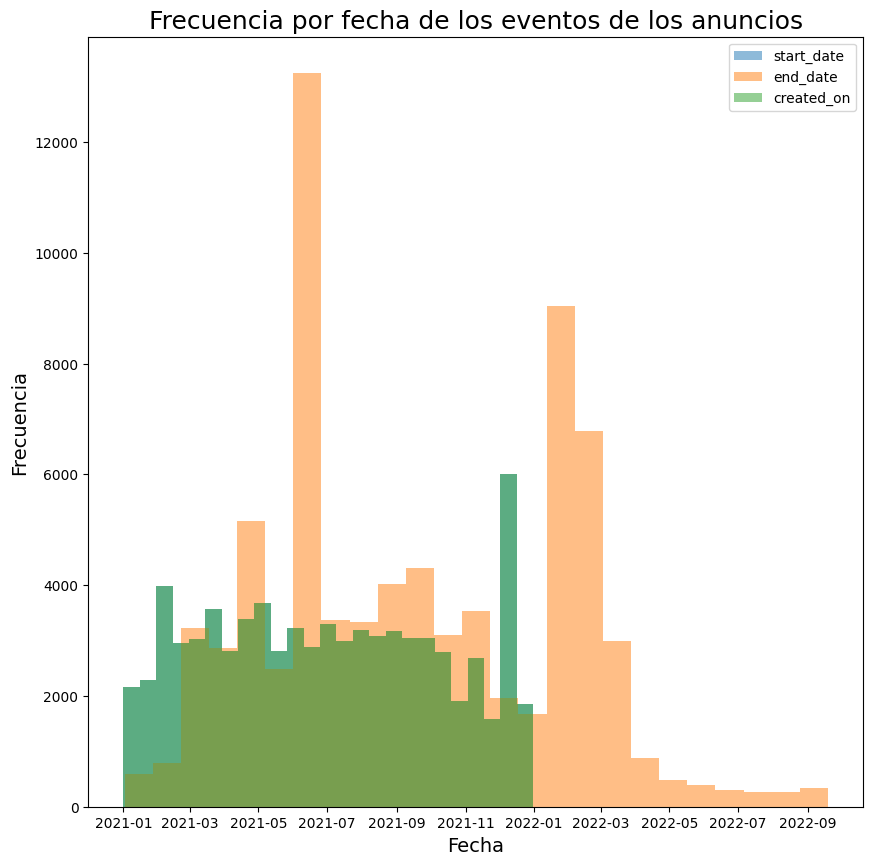

In [24]:

plt.figure(figsize=(10, 10))
plt.hist(ds_train.start_date, bins=25, alpha=0.5, label="start_date")
plt.hist(ds_train.end_date, bins=25, alpha=0.5, label="end_date")
plt.hist(ds_train.created_on, bins=25, alpha=0.5, label="created_on")
plt.xlabel("Fecha", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Frecuencia por fecha de los eventos de los anuncios", size=18)
plt.legend(loc='upper right')


En este grafico se puede apreciar la distribución de las variables que hacen referencia a las fechas de creacion, alta y baja de los anuncios. Podemos ver que la distribución de las fechas de creación coincide con la distribución de las fechas de alta del anuncio, lo cual tiene sentido que así sea ya que la fecha de creación del anuncio es la primer versión del anuncio en ser dada de alta. 

###  Distribución de barrios
Primero vemos la cantidad de apariciones de los barrios por anuncio en la siguiente tabla:

In [25]:
ds_train['place_l3'].value_counts()

Palermo                 11384
Belgrano                 7130
Caballito                5742
Recoleta                 5029
Villa Urquiza            3725
Almagro                  3255
Nuñez                    2852
Villa Crespo             2510
Flores                   2506
Barrio Norte             2389
Balvanera                2088
Colegiales               1567
Villa Devoto             1518
Villa del Parque         1471
Saavedra                 1438
Puerto Madero            1214
San Telmo                1127
San Cristobal            1052
San Nicolás              1029
Barracas                 1024
Retiro                   1006
Boedo                     981
Floresta                  961
Monserrat                 871
Parque Chacabuco          847
Villa Pueyrredón          787
Coghlan                   779
Mataderos                 588
Villa Luro                587
Chacarita                 558
Villa Ortuzar             527
Parque Patricios          526
Liniers                   517
Villa Luga

Como podemos observar, hay demasiados barrios con pocas apariciones, por lo que nos centraremos en visualizar los primeras 25 barrios que mas aparecen. Agrupando al resto en una nueva categoria llamada "Otras".

In [26]:
top25 = ds_train['place_l3'].value_counts().head(25)

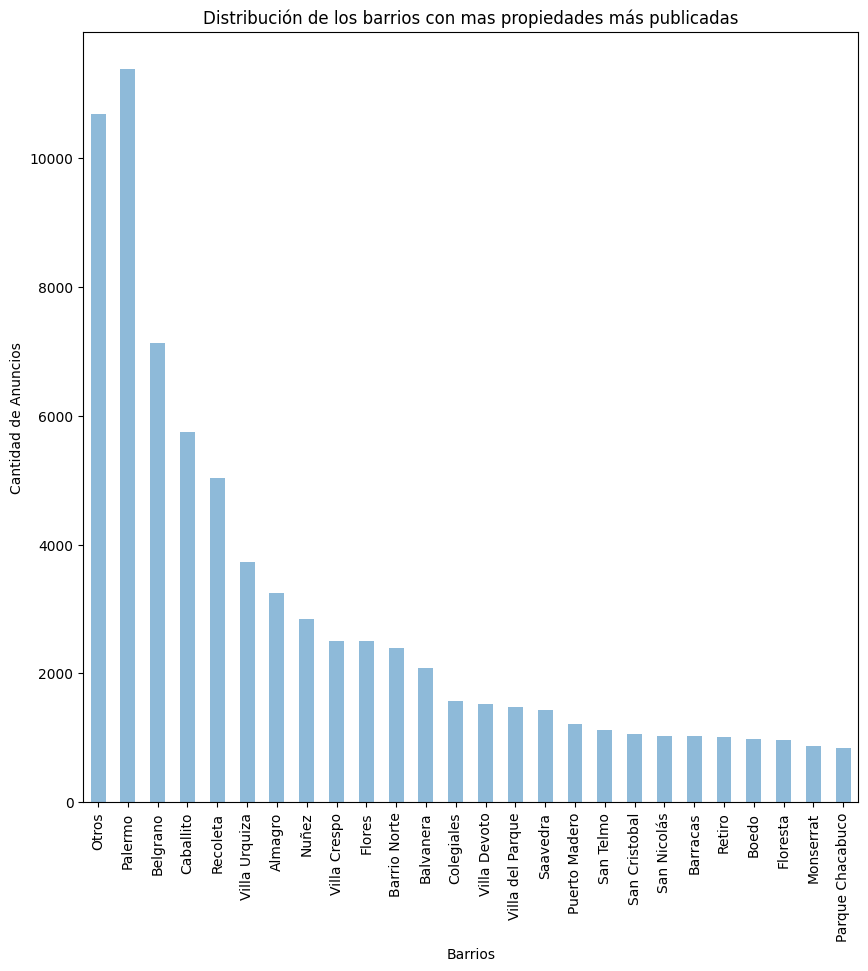

In [27]:
ds_otros_barrios = ds_train[~ds_train['place_l3'].isin(
    top25.index)]  # tomamos solo con las observaciones que no pertenecen al top 10 de barrios
frecuencia_otras = ds_otros_barrios.shape[0]
otras = pd.Series(data=[frecuencia_otras], index=["Otros"])
distribucion_por_barrios = pd.concat([otras, top25])

ax = distribucion_por_barrios.plot.bar(alpha=0.5,
                                       title="Distribución de los barrios con mas propiedades más publicadas",
                                       xlabel="Barrios", ylabel="Cantidad de Anuncios", figsize=(10, 10))

El barrio de Palermo es la que tiene mas propiedades publicadas

### Distribución de tipos de propiedad

Para analizar la distribucion de la variable property_type vamos a agrupar las apariciones en un grafico de barras por tipo de propiedad

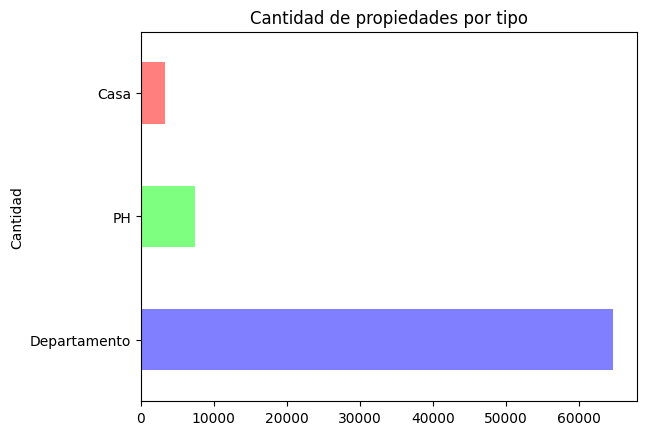

In [28]:
colores = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
grf = ds_train['property_type'].value_counts().plot.barh(alpha=0.5, color=colores,
                                                            title="Cantidad de propiedades por tipo", ylabel="Cantidad")

A simple vista se puede ver que la mayoria de publicaciones son de departamentos por una amplia diferencia

### Distribución de latitud y longitud
Para analizar la longitud y latitud vamos a utilizar un grafico de a pares ya que nos aporta más información sobre su distribución, pudiendo visualizar la localización de la propiedad. Adicionalmente se distinguirá por el tipo de propiedad.

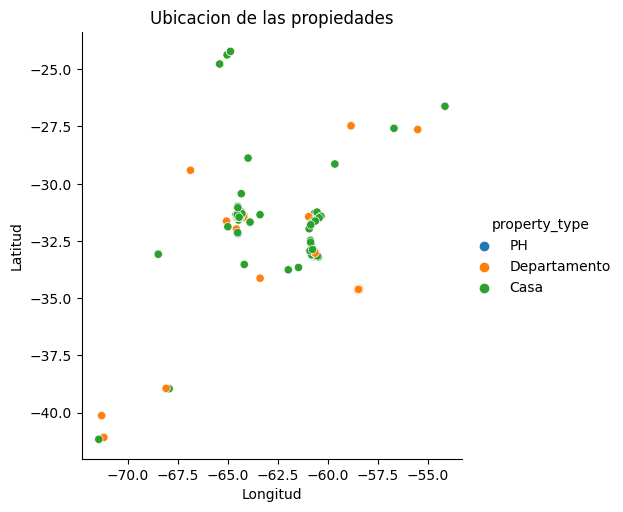

In [29]:
sns.relplot(data=ds_train, x="longitud", y="latitud", hue="property_type").set(title="Ubicacion de las propiedades",
                                                                                  xlabel='Longitud', ylabel='Latitud')

Podemos ver que la mayoria de propiedades publicadas se encuentran concentradas en un área en particular, donde mayormente son de tipo Casa. Y al alejarse se ven departamentos distanciados entre sí.

### Distribución de habitaciones y baños

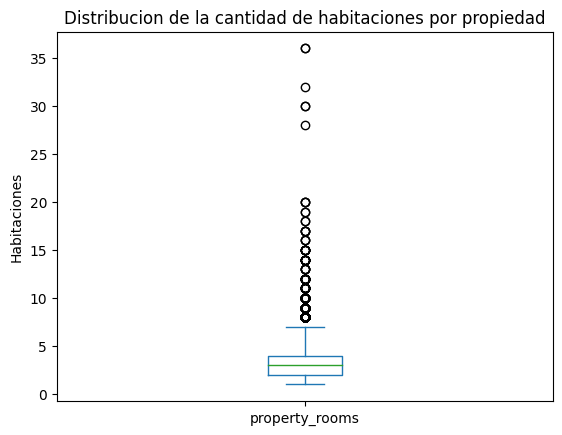

In [30]:
grf = ds_train.property_rooms.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad",
                                          ylabel="Habitaciones")

Podemos ver que hay una gran cantidad de outliers, siendo 40 el que mas se aleja, para visualizar mejor la distribucion del boxplot veremos un nuevo grafico sin considerar los outliers.

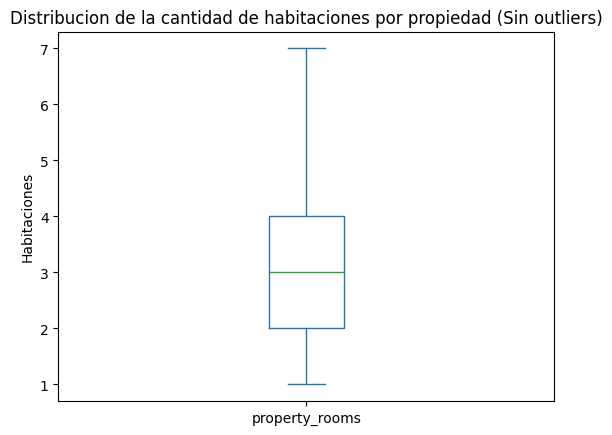

In [31]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_rooms_filtrado = ds_train[ds_train.property_rooms <= max].property_rooms
grf = property_rooms_filtrado.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad (Sin outliers)",
                                       ylabel="Habitaciones")

Ahora si podemos visualizar mejor los valores de la mediana, q3, q1 y los bigotes. Que toman la siguiente cantidad de habitaciones:

*   Bigotes: 1 y 7.
*   Cuartil 1: 2
*   Mediana: 3.
*   Cuartil 3: 4.





Hacemos el mismo procedimiento ver la distribución de la cantidad de baños por propiedad

<AxesSubplot: title={'center': 'Distribucion de la cantidad de baños por propiedad'}, ylabel='Baños'>

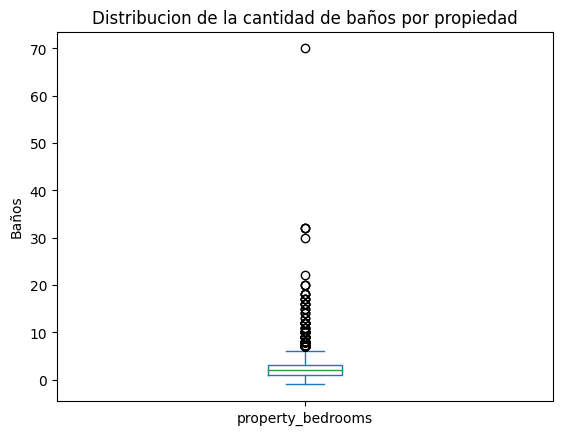

In [32]:
ds_train.property_bedrooms.plot.box(title="Distribucion de la cantidad de baños por propiedad", ylabel="Baños")

Vemos que esta vez hay mas distancia entre el outlier mas alejado y el resto de outliers.

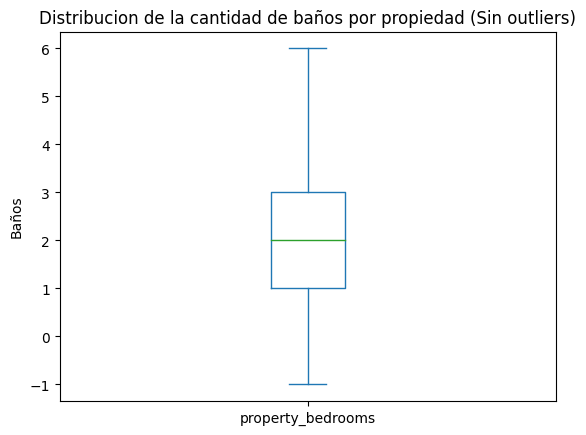

In [33]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_bedrooms_filtrado = ds_train[ds_train.property_bedrooms < max].property_bedrooms
grf = property_bedrooms_filtrado.plot.box(title="Distribucion de la cantidad de baños por propiedad (Sin outliers)",
                                          xlabel=" ", ylabel="Baños")

En este caso toman los siguientes valores:

*   Bigotes: -1 y 6.
*   Cuartil 1: 1.
*   Mediana: 2.
*   Cuartil 3: 3.


### Distribución de precio

Para analizar la distribución del precio, como es un tipo de variable continua y cada observación puede tomar un valor en un rango muy grande, optamos por hacer una agrupación por rangos de precios, obteniendo una categoria por cada rango.
Vamos a considerar la mediana para establecer los limites entre cada grupo, consideramos que es un buen valor para dividir al conjunto en partes ya que no se ve afectado drasticamente por outliers (como si sucede con la media).

In [34]:
print(f"La mediana del precio es: {ds_train.property_price.median()}")

La mediana del precio es: 143000.0


<AxesSubplot: title={'center': 'Distribucion de los precios de las propiedades'}, ylabel='Rango de precios'>

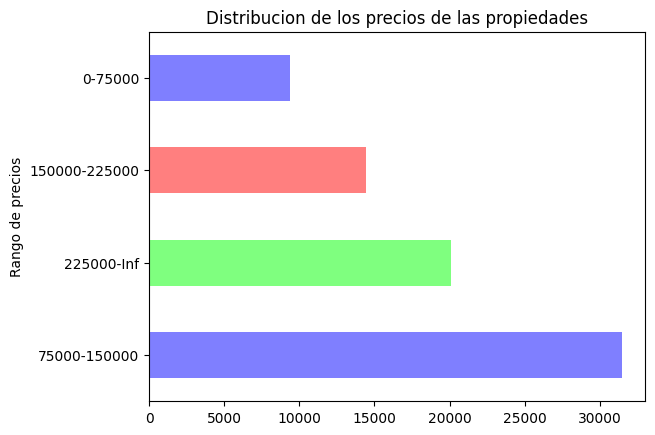

In [35]:
# Tomamos valores alrededor de la mediana
property_price_grouped = pd.cut(ds_train.property_price, bins=[0, 75000, 150000, 225000, float("inf")],
                                labels=["0-75000", "75000-150000", "150000-225000", "225000-Inf"], include_lowest=True)
property_price_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                title="Distribucion de los precios de las propiedades",
                                                xlabel="Rango de precios", ylabel="Frecuencia")

Podemos ver que la mayoria de propiedades estan dentro del rango de 75000 y 150000 USD.

### Distribución de superficie total y cubierta

Utilizaremos un violin plot para cada variable. 

<AxesSubplot: >

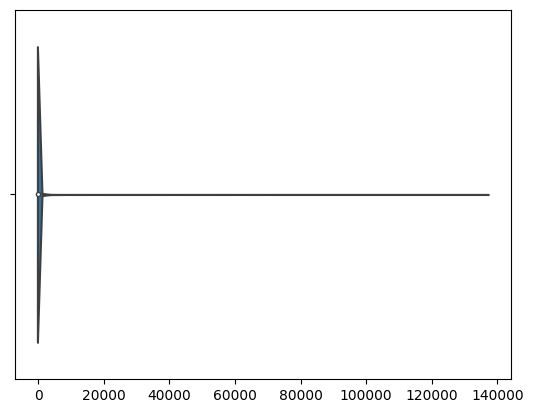

In [36]:
sns.violinplot(ds_train.property_surface_total.values)

A simple vista no esta muy claro el gráfico por la cantidad de outliers que hay, por lo que dejaremos de lado la mayoria de outliers para interpretarlo mas en detalle.

<AxesSubplot: >

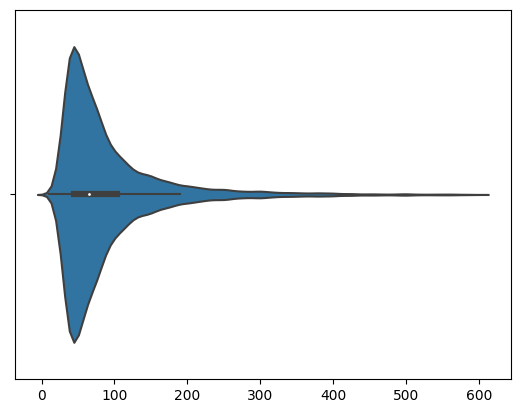

In [37]:
ds_surface_sin_outliers = ds_train[ds_train.property_surface_total < 600]
sns.violinplot(ds_surface_sin_outliers.property_surface_total.values)

Podemos ver que entre 0 y 100 se encuentra la mayor densidad

Hacemos el mismo procedimiento para visualizar la distribución de la superficie cubierta de la propiedad

<AxesSubplot: >

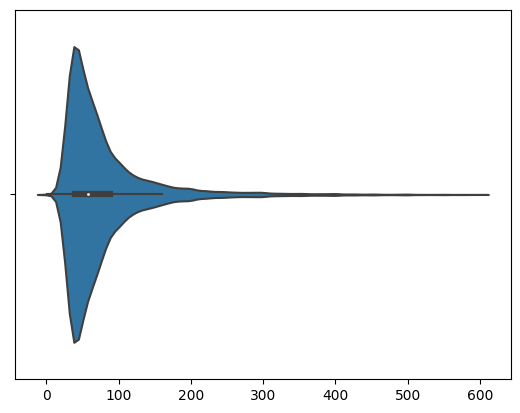

In [38]:
ds_surface_covered_sin_outliers = ds_train[ds_train.property_surface_covered < 600]
sns.violinplot(ds_surface_covered_sin_outliers.property_surface_covered.values)

Se nota que el grafico de property_surface_total es similar al de property_surface_covered, teniendo el segundo una densidad levemente menor. 

## Correlación entre variables

A continuación analizaremos la correlación entre las variables cuantitativas, primero visualizando la distribución a pares entre estas.

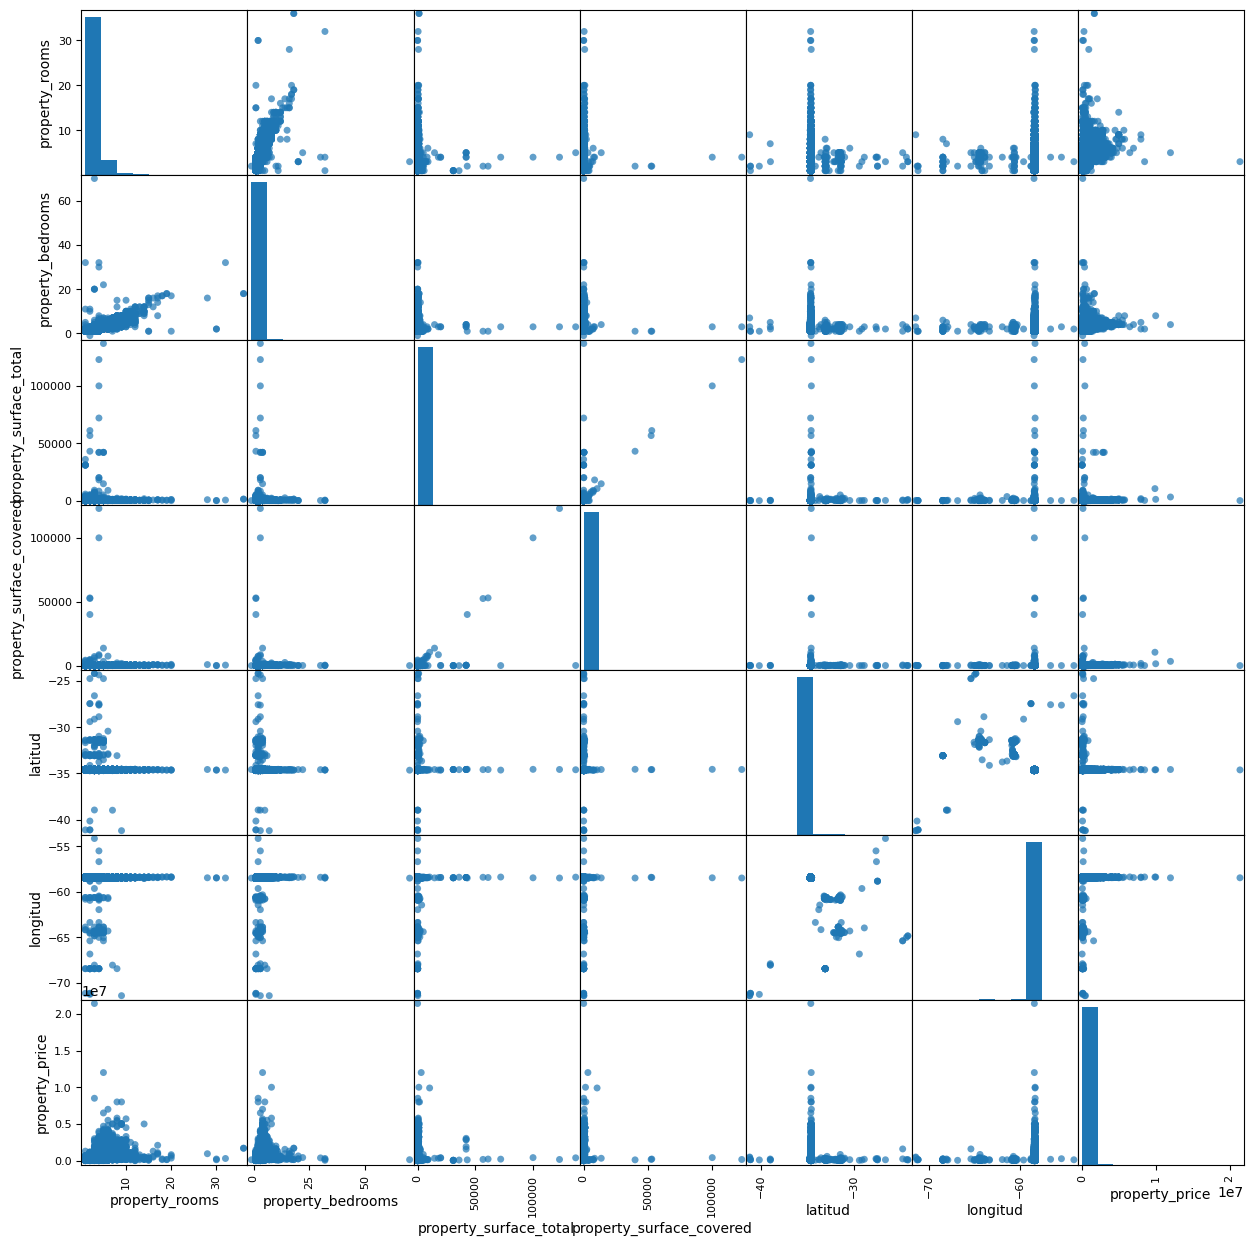

In [39]:
quantitative_dataset = ds_train[cuantitativas_filtradas]
ax = scatter_matrix(quantitative_dataset, alpha=0.7, figsize=(15, 15), s=100)

Si bien a simple vista no esta muy claro que variables están correlacionadas entre sí, podemos suponer que puede llegar a haber relación entre property_rooms y property_bedrooms, property_surface_total y property_surface_covered, property_price y property_rooms, property_price y property_bedrooms. Las cuales tiene sentido que pudiesen tener algún tipo de relación.

Además podemos considerar en menor medida que haya una relación entre longitud y latitud (cosa que no necesariamente tendría que ser así)




Analizaremos la correlación lineal entre variables por medio de la medición del coeficiente de Pearson

In [40]:
correlations = quantitative_dataset.corr()
correlations

,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,latitud,longitud,property_price
property_rooms,1.000000,0.865863,0.064220,0.077241,0.005042,-0.012600,0.484654
property_bedrooms,0.865863,1.000000,0.064864,0.068312,0.003854,-0.012135,0.419035
property_surface_total,0.064220,0.064864,1.000000,0.682712,0.013279,-0.010992,0.080055
property_surface_covered,0.077241,0.068312,0.682712,1.000000,0.004748,-0.002484,0.083665
latitud,0.005042,0.003854,0.013279,0.004748,1.000000,-0.350110,0.018604
longitud,-0.012600,-0.012135,-0.010992,-0.002484,-0.350110,1.000000,0.023885
property_price,0.484654,0.419035,0.080055,0.083665,0.018604,0.023885,1.000000


Haremos un heatmap que nos permite visualizar mejor la correlación

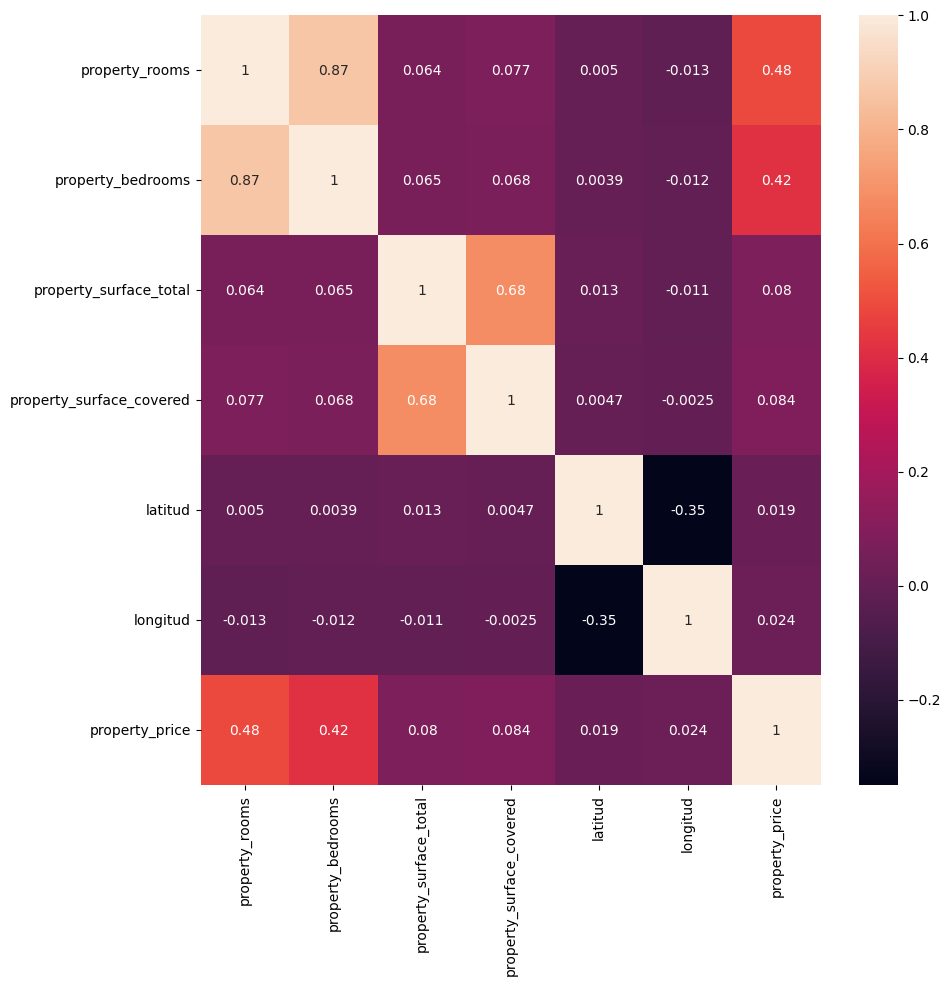

In [41]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(quantitative_dataset.corr(), annot=True)

Luego de calcular el coeficiente de Pearson donde los que resultan cercanos a 1 indican una gran correlación entre sí, los que tienden a 0 tienen poca correlación y los cercanos a -1 presentan una notable correlación negativa.

Veremos si las variables que parecían relacionarse anteriormente realmente lo hacen:


In [42]:
posible_correlations = [('property_rooms', 'property_bedrooms'), ('property_price', 'property_bedrooms'),
                        ('property_price', 'property_rooms'), ('property_surface_total', 'property_surface_covered'),
                        ('longitud', 'latitud')]
for corr in posible_correlations:
    print(f"Entre {corr[0]} y {corr[1]}:{round(correlations.loc[corr[0], corr[1]], 2)}")

Entre property_rooms y property_bedrooms:0.87
Entre property_price y property_bedrooms:0.42
Entre property_price y property_rooms:0.48
Entre property_surface_total y property_surface_covered:0.68
Entre longitud y latitud:-0.35


Podemos sacar las siguientes conclusiones sobre las variables que parecian relacionarse:


*   Hay mucha relación entre la cantidad de habitaciones y ambientes.
*   Hay tambien bastante relación entre la superficie total y superficie cubierta de la propiedad.
*   Casi no hay relación entre el precio y la cantidad de habitaciones.
*   Casi no hay relación entre el precio y la cantidad de ambientes.
*   No hay relación entre la latitud y la longitud.





## Análisis de valores faltantes

Ahora analizaremos los datos faltantes del dataset.

### Porcentaje de valores faltantes por columna



id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.994748
longitud                      3.994748
place_l2                      0.000000
place_l3                      0.442977
place_l4                     96.159100
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.148556
property_bedrooms            11.705726
property_surface_total        5.103516
property_surface_covered      3.529225
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


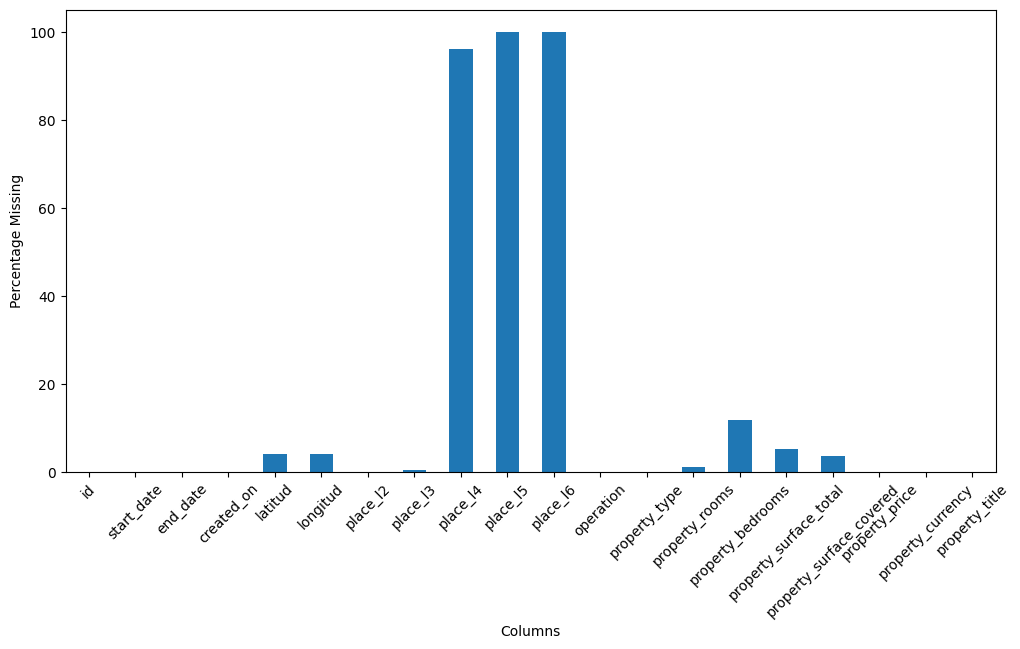

In [43]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

A simple vista podemos ver que las columnas place_l4,place_l5 y place_l6 practicamente no tienen datos, procederemos a eliminarlas.

### Porcentaje de datos faltantes por fila

<AxesSubplot: >

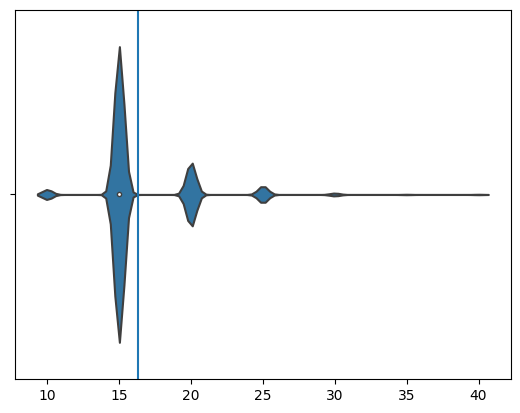

In [44]:
column_count = ds_train.shape[1]
ds_plot = ds_train.T.isna().sum() * 100 / column_count

plt.axvline(ds_plot.mean())
sns.violinplot(ds_plot.values)

Analizaremos nuevamente el porcentaje por fila luego de trabajar con las columnas

### Procesado de columnas

Descartaremos la columna id debido a que no es relevante para nuestro análisis. No podemos usar un dato uníco porque no representa ninguna característica relevante.

In [45]:
ds_train['id'].head()

311331    Sv2qIQZT/mlpfy3kNbk4cA==
314451    Sj46VwUXax1qHse1ttGH4w==
342028    /BHmgO9aFOmp1F292yW7yg==
434490    9Cc5+wqsySgKhRGXR8M26w==
236537    TV5FvNlPXcwhO0c5Mq3cNg==
Name: id, dtype: object

Como mencionamos anteriormente, evaluaremos descartar place_l4 por la cantidad de valores faltantes que hay.

In [46]:
ds_train['place_l4'].value_counts()

Palermo Hollywood    1274
Palermo Chico         858
Palermo Soho          632
Palermo Viejo         132
Name: place_l4, dtype: int64

In [47]:
ds_train['place_l2'].value_counts()

Capital Federal    75399
Name: place_l2, dtype: int64

In [48]:
ds_train['property_currency'].value_counts()

USD    75399
Name: property_currency, dtype: int64

In [49]:
ds_train['operation'].value_counts()

Venta    75399
Name: operation, dtype: int64

Como place_l4 tiene pocas observaciones y todas corresponden al barrio de Palermo, descartaremos esta columna.
Además, como mencionamos más arriba, la columna created_on siempre es igual a la columna start_date, por lo que también la descartaremos.
Por otro lado, como filtramos solo las propiedades de CABA eliminaremos la columna place_l2 ya que tiene un único valor. Por el mismo motivo eliminaremos la columna property_currency y la columna property_operation.

In [50]:
row_missing_data = ds_train.T.isna().sum() * 100 / column_count
row_missing_data.value_counts()

15.0    56934
20.0    12476
25.0     3322
10.0     1930
30.0      563
40.0       88
35.0       86
dtype: int64

In [51]:
dataset_perc = row_missing_data.value_counts() * 100 / ds_train.shape[0]
print(f"La cantidad de faltantes segun porcentaje representan\n{dataset_perc}")

La cantidad de faltantes segun porcentaje representan
15.0    75.510285
20.0    16.546639
25.0     4.405894
10.0     2.559716
30.0     0.746694
40.0     0.116712
35.0     0.114060
dtype: float64


Ahora que elegimos las columnas deseadas, veremos nuevamente los porcentajes por columna para preparar algunas imputaciones

In [52]:
def plot_missing_by_column(dataset):
    percent_missing = dataset.isna().sum() * 100 / len(dataset)
    plt.figure(figsize=(12, 6))
    percent_missing.plot.bar(x='index', rot=45)
    plt.xlabel("Columns")
    plt.ylabel("Percentage Missing")
    rows = dataset.shape[0]
    print(dataset.isna().sum() / rows * 100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.994748
longitud                      3.994748
place_l2                      0.000000
place_l3                      0.442977
place_l4                     96.159100
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.148556
property_bedrooms            11.705726
property_surface_total        5.103516
property_surface_covered      3.529225
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


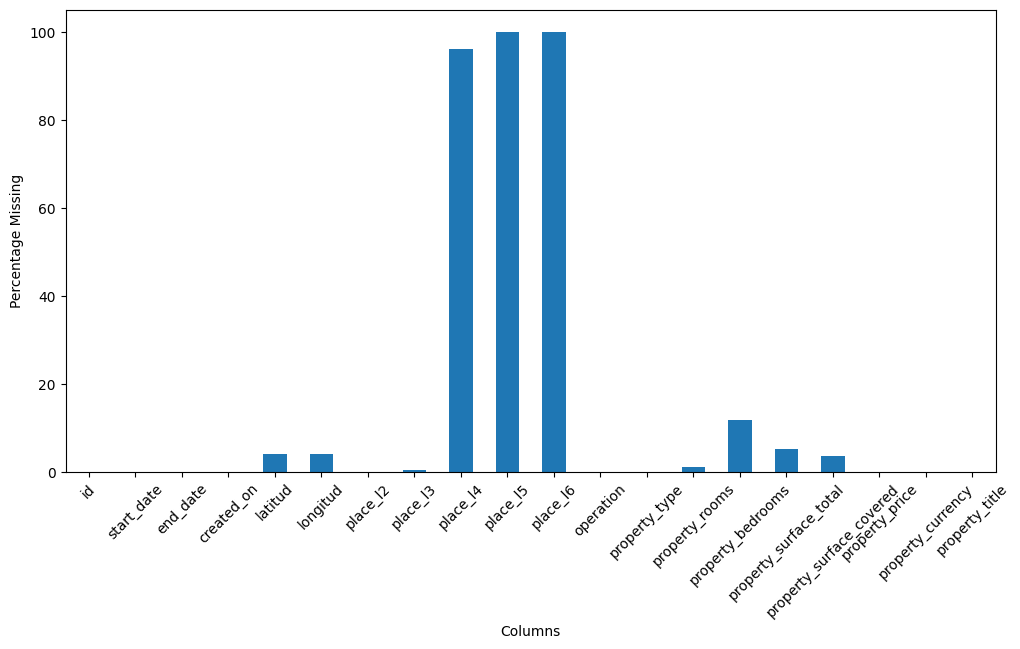

In [53]:
plot_missing_by_column(ds_train)

Eliminaremos las columnas mencionadas anteriormente. Luego, haremos algunas imputaciones sobre los datos faltantes para reparar algunos.


In [54]:
## Train

ds_train.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'],
                 inplace=True, axis=1)

## Test
ds_test.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'],
                 inplace=True, axis=1)

## Reparacion de datos faltantes

Ahora analizaremos columna a columna como podemos reparar esos datos.

### Pre Imputacion de latitud y longitud

latitud    3.994748
dtype: float64


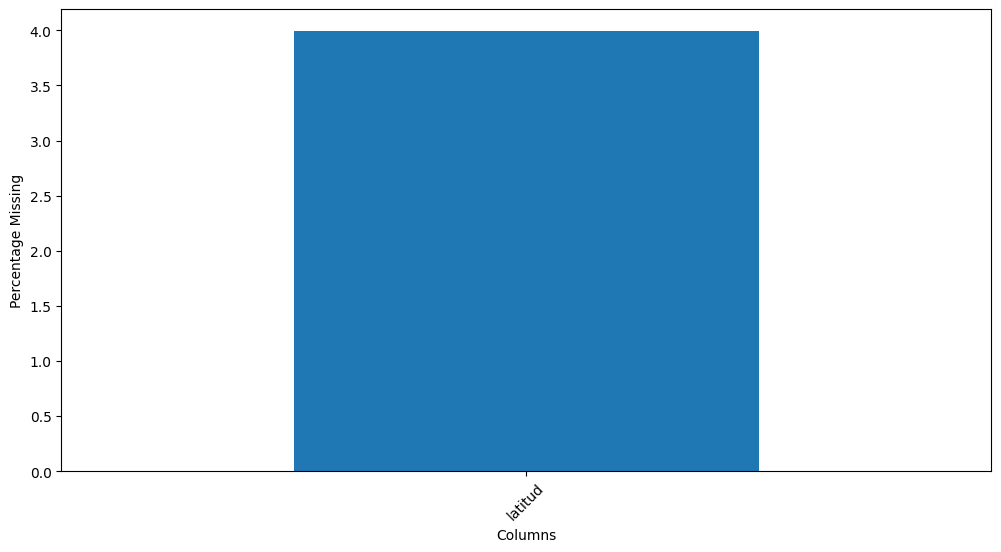

In [55]:
plot_missing_by_column(ds_train[['latitud']])

longitud    3.994748
dtype: float64


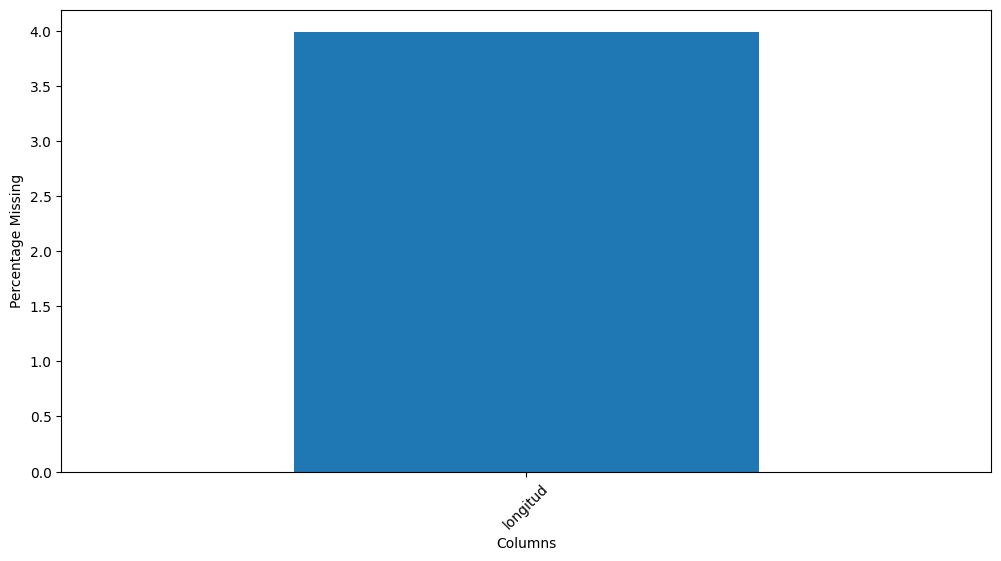

In [56]:
plot_missing_by_column(ds_train[['longitud']])

Vemos que de las coordenadas faltantes, siempre que falta una falta la otra también. No hay casos donde solo falte 1 de las 2 coordenadas.

In [57]:
ds_train[(ds_train.latitud.isna()) & (~ds_train.longitud.isna())]

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title


In [58]:
ds_train[(~ds_train.latitud.isna()) & (ds_train.longitud.isna())]

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title


In [59]:
# Train
percentage_train = ds_train[ds_train.latitud.isna()]['place_l3'].isna().sum() / len(ds_train[ds_train.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para train representan el {round(percentage_train, 3)}%")

# Test
percentage_test = ds_test[ds_test.latitud.isna()]['place_l3'].isna().sum() / len(ds_test[ds_test.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para test representan el {round(percentage_test, 3)}%")

Los datos faltantes en la columna place_l3 para train representan el 4.615%
Los datos faltantes en la columna place_l3 para test representan el 4.318%


Para reconstruir los datos faltantes nos vamos a basar en el barrio marcado por 'place_l3' calculando la latitud y longitud media de cada uno y asignarle esos datos.

In [60]:
# Train
for barrio in ds_train.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.latitud.isna()), ['latitud']] = latitud_media
    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.longitud.isna()), ['longitud']] = longitud_media
    
# Test
for barrio in ds_train.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.latitud.isna()), ['latitud']] = latitud_media
    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.longitud.isna()), ['longitud']] = longitud_media

Vemos que los datos restantes ahora mismo son aquellos que tampoco tienen asignado un barrio. Dichos datos son irreparables, ya que no tenemos ninguna información respecto a la ubicación.

In [61]:
ds_train[ds_train.latitud.isna()]

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
142639,Rz0b5avJ+Y05s1qSNFVmsw==,2021-06-08,2021-11-04,NaN,NaN,NaN,Casa,5.0,NaN,236.0,250.0,330000.0,Casa en Venta Caba / Buenos Aires (D038 1543)
335758,WHW43q4WY6/9r8onU+XHlA==,2021-07-21,2021-11-28,NaN,NaN,NaN,Departamento,2.0,1.0,50.0,50.0,62000.0,Departamento de 2 ambientes en venta en Microc...
393092,9EiXFu6SwZ3s0e837avtGQ==,2021-02-13,2021-03-01,NaN,NaN,NaN,PH,2.0,1.0,44.0,39.0,118000.0,Venta 2 Ambientes 44m Balcón al frente Boedo ...
384799,RbFNzVNNCitS39u7eBRZJg==,2021-02-10,2021-06-08,NaN,NaN,NaN,PH,3.0,NaN,64.0,93.0,155000.0,PH en Venta CABA / Buenos Aires (D038 1525)
7204,U65AD6YXmo1PjgUmHGMtag==,2021-02-09,2022-07-17,NaN,NaN,NaN,Departamento,1.0,NaN,20.0,NaN,50000.0,Departamento - Centro (Capital Federal)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,v+sxjFL/W8jKIb6kZ/utHQ==,2021-02-09,2021-06-05,NaN,NaN,NaN,Casa,NaN,3.0,NaN,390.0,795000.0,Magnífica casa a la venta de 7 ambientes en Ab...
358077,wmC/iDXdmQtR4vYq4kzdvQ==,2021-06-29,2021-08-24,NaN,NaN,NaN,Departamento,2.0,1.0,35.0,28.0,68000.0,Departamento - Centro (Capital Federal)
318766,2R+1KBzugiC44t5m4HH8Zg==,2021-03-17,2021-05-19,NaN,NaN,NaN,Departamento,1.0,NaN,NaN,44.0,80000.0,Departamento en Venta CABA / Buenos Aires (D03...
148947,TV/WQawW0ls6INCB6bqfnQ==,2021-05-12,2021-06-05,NaN,NaN,NaN,Departamento,2.0,1.0,44.0,44.0,69000.0,25 DE MAYO AL 700 - APTO PROF LUMIN OPCION COC...


In [62]:
ds_test[ds_test.latitud.isna()]

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
308980,yHH+c/hrvj+80CmVIyH+iw==,NaT,NaT,NaN,NaN,NaN,Casa,NaN,6.0,1100.0,300.0,800000.0,IMPECABLE CASA EN ABRIL CON EXCELENTE VISTA AL...
385332,ih9LGBbNdcMTUZDASVl5iw==,NaT,NaT,NaN,NaN,NaN,Departamento,2.0,NaN,NaN,34.0,85000.0,Departamento en Venta CABA / Buenos Aires (D03...
402217,Hq7uSgPfrfVz1UnBOUUwOA==,NaT,NaT,NaN,NaN,NaN,Casa,4.0,3.0,150.0,150.0,179000.0,En venta! Barrio Deportiva I 503. Costa Esmeralda
163803,nc0ntMQxgHruhBOAOk3AIg==,NaT,NaT,NaN,NaN,NaN,Departamento,1.0,NaN,29.0,29.0,63500.0,Departamento - Microcentro
146411,MbCY2JnbC/KUc446DZLA6w==,NaT,NaT,NaN,NaN,NaN,Casa,4.0,3.0,160.0,140.0,175000.0,Casa en venta Barrio Ecuestre 457 Costa Esmeralda
435764,6xJbFM++5tur6sP49ajkvQ==,NaT,NaT,NaN,NaN,NaN,Departamento,3.0,NaN,NaN,58.0,139000.0,Departamento en Venta Caba / Buenos Aires (D03...
458616,aUqza6tHXiZJXBqZ4bpS9Q==,NaT,NaT,NaN,NaN,NaN,PH,3.0,1.0,60.0,60.0,85000.0,PH FRENTE T/CASA 2/3 AMB. C/ TERRAZA
84681,FDP0I8rP+WzTtwUj4Gc2iQ==,NaT,NaT,NaN,NaN,NaN,Departamento,3.0,2.0,87.0,87.0,120000.0,"3 Ambientes amplios, 88 m2, con 2 baños, prox ..."
363946,94LRrqbGrKk65Raih27KQA==,NaT,NaT,NaN,NaN,NaN,Departamento,3.0,3.0,123.0,114.0,123000.0,departamento en venta LAS CAÑITAS pilar
163810,hhXFb7aU9UN5WLlJvrwnDA==,NaT,NaT,NaN,NaN,NaN,Departamento,2.0,1.0,124.0,124.0,140000.0,Lavalle 800


In [63]:
## Train
print(f"El porcentaje de valores a eliminar train corresponden a un {round((len(ds_train[ds_train.latitud.isna()]) / len(ds_train)), 4)}%")

## Test
print(f"El porcentaje de valores a eliminar en test corresponden a un {round((len(ds_test[ds_test.latitud.isna()]) / len(ds_test)), 4)}%")

El porcentaje de valores a eliminar train corresponden a un 0.0018%
El porcentaje de valores a eliminar en test corresponden a un 0.0016%


In [64]:
## Train

ds_train.drop(ds_train[ds_train.latitud.isna()].index, inplace=True)

## Test
ds_test.drop(ds_test[ds_test.latitud.isna()].index, inplace=True)

### Post Imputacion de latitud y longitud

latitud    0.0
dtype: float64


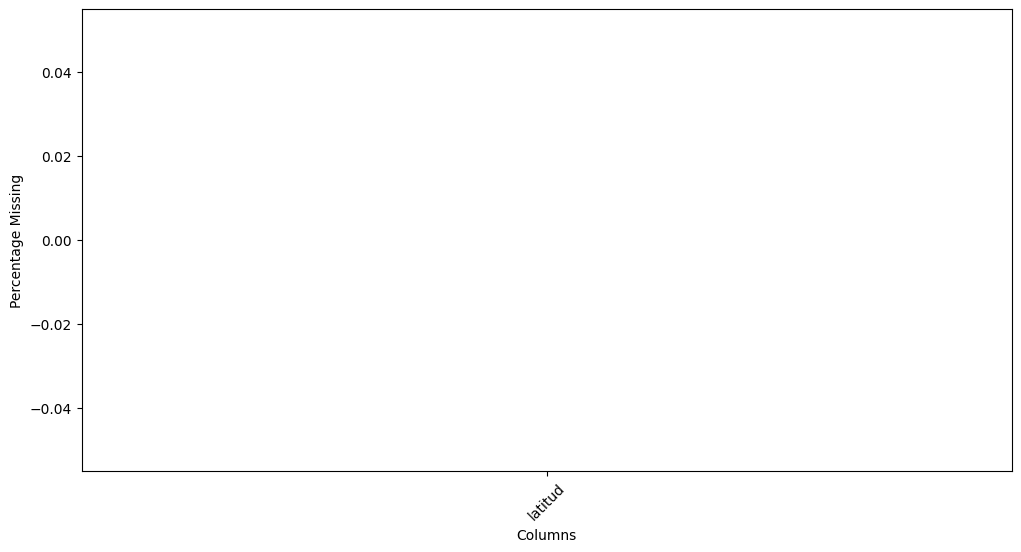

In [65]:
plot_missing_by_column(ds_train[['latitud']])

longitud    0.0
dtype: float64


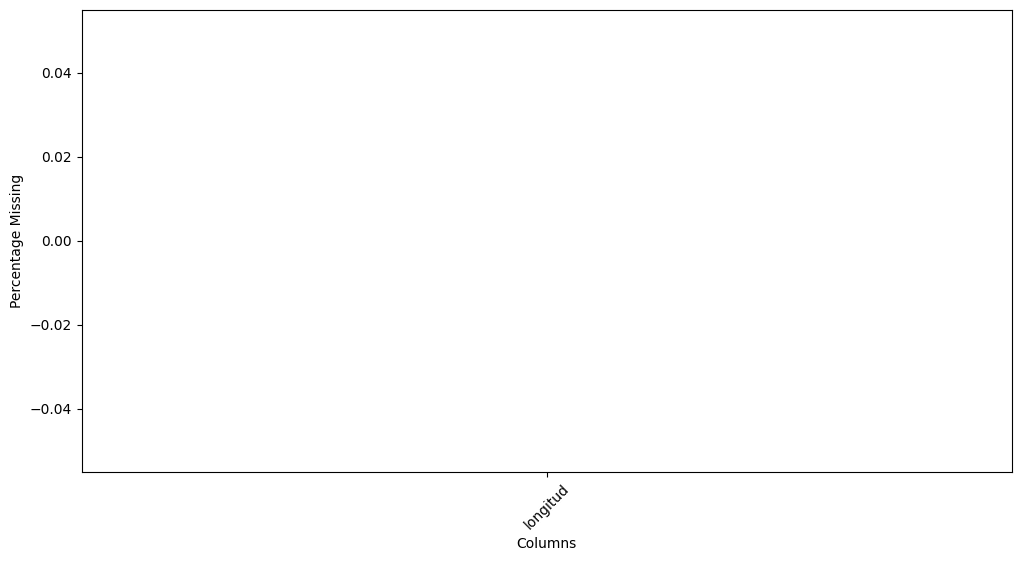

In [66]:
plot_missing_by_column(ds_train[['longitud']])

### Pre imputación de ambientes

property_rooms    1.120117
dtype: float64


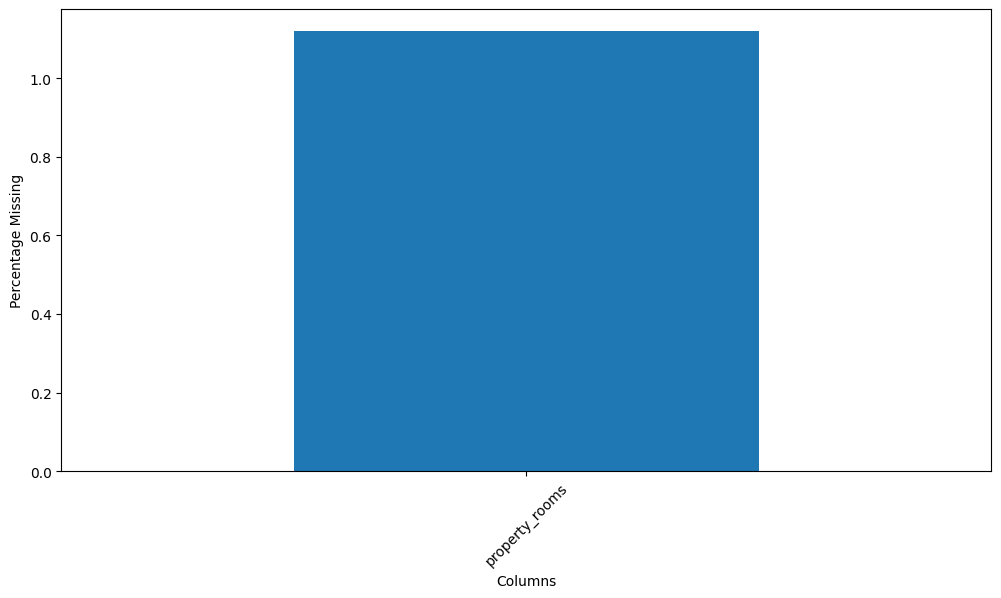

In [67]:
plot_missing_by_column(ds_train[['property_rooms']])

#### Reparacion de ambientes faltantes en base al titulo de la propiedad

In [68]:
def reparacion_amb_por_titulo_prop(ambientes_faltantes, ds):
    print(f"cantidad inicial de ambientes a reparar: {len(ds[ds['property_rooms'].isna()])}")
    regex = re.compile(r"(\d+ \bambientes?\b)")
    regex2 = re.compile(r"(\d+\ \b\bamb\b *)")

    a = {}
    for titulo in ambientes_faltantes.property_title:
        if (len(re.findall(regex, titulo.lower())) > 0):
            a[titulo] = re.findall(regex, titulo.lower())
        if (len(re.findall(regex2, titulo.lower())) > 0):
            a[titulo] = re.findall(regex2, titulo.lower())

    for i in ds.index:
        if ds.loc[i, 'property_title'] in a:
            if len(a[ds.loc[i, 'property_title']]) > 0:
                ds.loc[i, 'property_rooms'] = float("".join(a[ds.loc[i, 'property_title']]).split(" ")[0])
            if ("monoambiente" or "un ambiente" or "mono" or "mono ambiente") in str(
                    ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(1)
            if "dos ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(2)
            if "tres ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(3)
            if "cuatro ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(4)
            if "cinco ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(5)
            if "seis ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(6)

    print(f"cantidad de ambientes faltantes post reparacion: {len(ds[ds['property_rooms'].isna()])}")


In [69]:
datos_a_reparar = ds_train[['property_title', 'property_rooms']].reset_index()

# Train

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_train)

# Test

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_test)

cantidad inicial de ambientes a reparar: 843
cantidad de ambientes faltantes post reparacion: 663
cantidad inicial de ambientes a reparar: 171
cantidad de ambientes faltantes post reparacion: 164


### Post Imputacion de ambientes

property_rooms    0.880946
dtype: float64


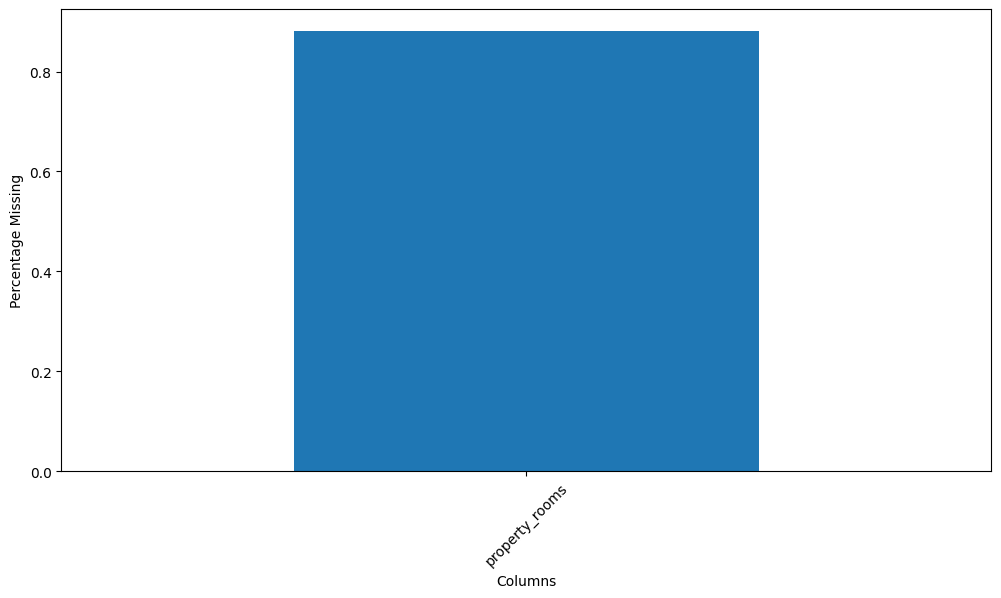

In [70]:
plot_missing_by_column(ds_train[['property_rooms']])

Como las que quedan sin datos son pocas observaciones, las eliminaremos

In [71]:
# Train
ds_train.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_train[ds_train.property_rooms.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_test[ds_test.property_rooms.isna()]

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title


property_rooms    0.0
dtype: float64


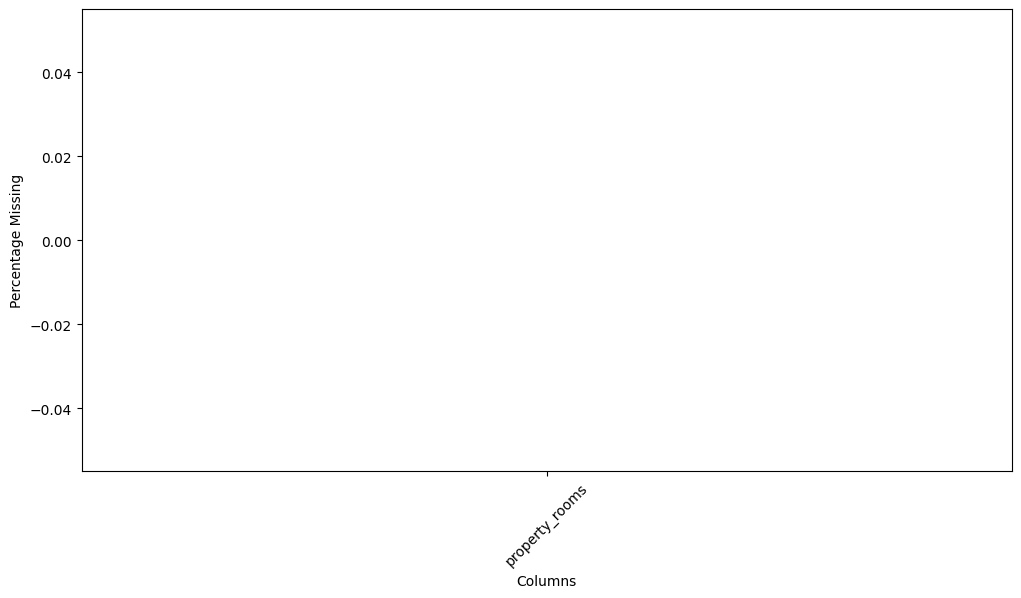

In [72]:
plot_missing_by_column(ds_train[['property_rooms']])

### Pre Imputacion de Habitaciones

property_bedrooms    11.326193
dtype: float64


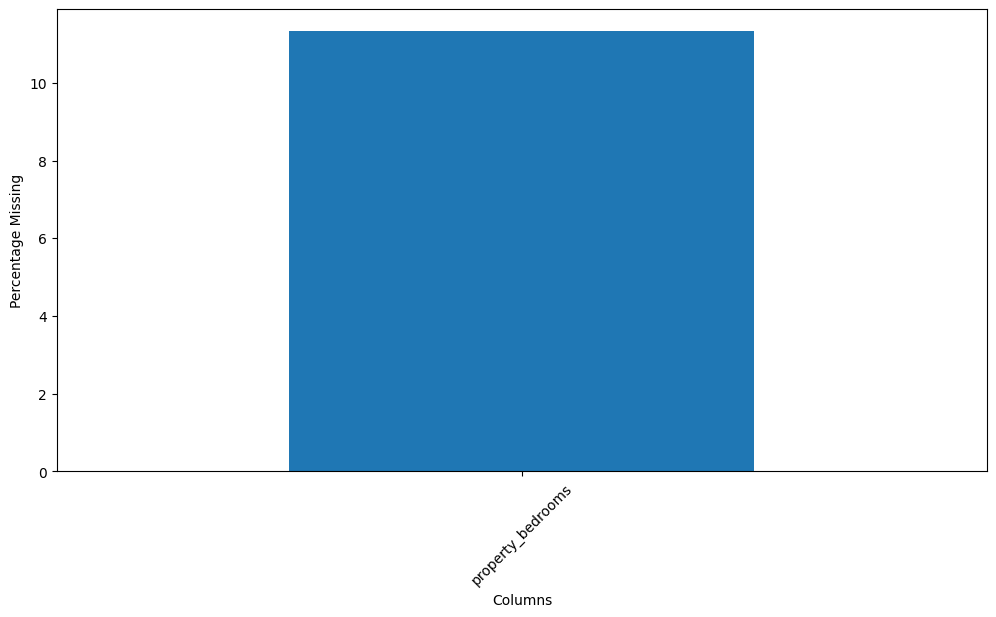

In [73]:
plot_missing_by_column(ds_train[['property_bedrooms']])

#### Reparacion de habitaciones faltantes en base a los ambientes

In [74]:
# Train
print(f"El total de habitaciones en train es: {len(ds_train.property_bedrooms)}")
habitaciones_invalidas = ds_train.loc[(ds_train['property_bedrooms'] > ds_train['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_train.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

# Test
print(f"El total de habitaciones en test es: {len(ds_test.property_bedrooms)}")
habitaciones_invalidas = ds_test.loc[(ds_test['property_bedrooms'] > ds_test['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_test.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas



El total de habitaciones en train es: 74597
El total de habitaciones invalidas es: 132. Constituye al 0% de los datos del ds
El total de habitaciones en test es: 18655
El total de habitaciones invalidas es: 31. Constituye al 0% de los datos del ds


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
55829,ZRHW+fJ8Az3MqKb1lukayQ==,NaT,NaT,-34.638777,-58.432574,Parque Chacabuco,PH,1.0,2.0,65.0,65.0,128000.0,PARQUE CHACABUCO DEPTO 3 AMBIENTES. AV. CENTE...
150144,OwNpobSoNV+5PZJqdx/A0Q==,NaT,NaT,-34.605254,-58.468938,Paternal,Casa,3.0,5.0,418.0,210.0,250000.0,Casa en Block con dos unidades (4 y 3 ambiente...
6355,PZJRORTIAvMTvI3A+FLDUQ==,NaT,NaT,-34.577180,-58.451264,Colegiales,Departamento,6.0,8.0,424.0,324.0,660000.0,DEPARTAMENTOS CON 2 UNIDADES COMPLEMENTARIAS E...
343791,vRgmnHhLJ5ElT+T/aUmO8A==,NaT,NaT,-34.610459,-58.393132,Balvanera,Departamento,6.0,8.0,143.0,143.0,135000.0,"antiguo departamento frente al Congreso, 6 amb..."
423303,xGZlwqyhft5wzqmETnpu9Q==,NaT,NaT,-34.561236,-58.460302,Belgrano,Departamento,3.0,4.0,71.0,66.0,264600.0,3Amb c/balcon - Belgrano
115165,pRtBTKvUN2nyAeGERMHGFA==,NaT,NaT,-34.620586,-58.439740,Caballito,PH,2.0,3.0,140.0,140.0,215000.0,PH 5 AMBIENTES - CABALLITO
361800,U1B7lvnYtd4L18Ccb8mvhw==,NaT,NaT,-34.580210,-58.412815,Palermo,Departamento,1.0,2.0,NaN,78.0,290000.0,Departamento en Palermo
238661,f0A1+TKS8OCYI9kfzIZ3MQ==,NaT,NaT,-34.621530,-58.361752,Puerto Madero,Departamento,3.0,4.0,122.0,116.0,590000.0,Venta departamento de 3 ambientes con cochera ...
274570,VBHHqooTIdGIODHk3X70og==,NaT,NaT,-34.573022,-58.419735,Palermo,Departamento,5.0,6.0,368.0,333.0,1900000.0,Excelente piso con vista abierta! 3 suites y 2...
115494,KolgNlvVaeHHOfEDHGy8IA==,NaT,NaT,-34.612686,-58.362579,Puerto Madero,Departamento,4.0,6.0,253.0,200.0,1890000.0,DEPARTAMENTO 4 AMBIENTES - PUERTO MADERO C/COC...


Si tomamos en cuenta que 128 (train) y 35 (test) de los valores (0% aproximado) tienen mas habitaciones que ambientes, podriamos pensar en imputar los datos faltantes elimanando estas filas y haciendo que los valores que sean NAN, ahora sean habitaciones = ambientes - 1

In [75]:
# Train 
habitaciones_con_amb_menos_1_train = ds_train[ds_train.property_rooms == (ds_train.property_bedrooms + 1)]
print(f"Las habitaciones que son Ambientes - 1 en train son: {len(habitaciones_con_amb_menos_1_train)}. Constituyen al {(len(habitaciones_con_amb_menos_1_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test
habitaciones_con_amb_menos_1_test = ds_test[ds_test.property_rooms == (ds_test.property_bedrooms + 1)]
print(f"Las habitaciones que son Ambientes - 1 en test son: {len(habitaciones_con_amb_menos_1_test)}. Constituyen al {(len(habitaciones_con_amb_menos_1_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Las habitaciones que son Ambientes - 1 en train son: 55735. Constituyen al 74% de los datos
Las habitaciones que son Ambientes - 1 en test son: 13961. Constituyen al 74% de los datos


Las habitaciones que son Ambientes - 1 son: 55797. Constituyen al 74% de los datos. Como notamos que es un valor muy representativo del dataset, optamos por imputar los datos faltantes como mencionamos antes, es decir, los ambientes que no esten vacios y que tengan habitaciones vacias, ahora tendran habitaciones = ambientes -1.

In [76]:
print(f"Valor inicial de habitaciones faltantes en el ds de train: {ds_train.property_bedrooms.isna().sum()}")
print(f"Valor inicial de habitaciones faltantes en el ds de test: {ds_test.property_bedrooms.isna().sum()}")

Valor inicial de habitaciones faltantes en el ds de train: 8449
Valor inicial de habitaciones faltantes en el ds de test: 2082


In [77]:
habitaciones_faltantes = ds_train[ds_train.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_train.loc[i, 'property_rooms'] == 1:
        ds_train.loc[i, 'property_bedrooms'] = 1
    else:
        ds_train.loc[i, 'property_bedrooms'] = ds_train.loc[i, 'property_rooms'] - 1
ds_train[ds_train.property_bedrooms.isna()]

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title


In [78]:
habitaciones_faltantes = ds_test[ds_test.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_test.loc[i, 'property_rooms'] == 1:
        ds_test.loc[i, 'property_bedrooms'] = 1
    else:
        ds_test.loc[i, 'property_bedrooms'] = ds_test.loc[i, 'property_rooms'] - 1
ds_test[ds_test.property_bedrooms.isna()]

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title


### Post Imputacion de habitaciones

property_bedrooms    0.0
dtype: float64


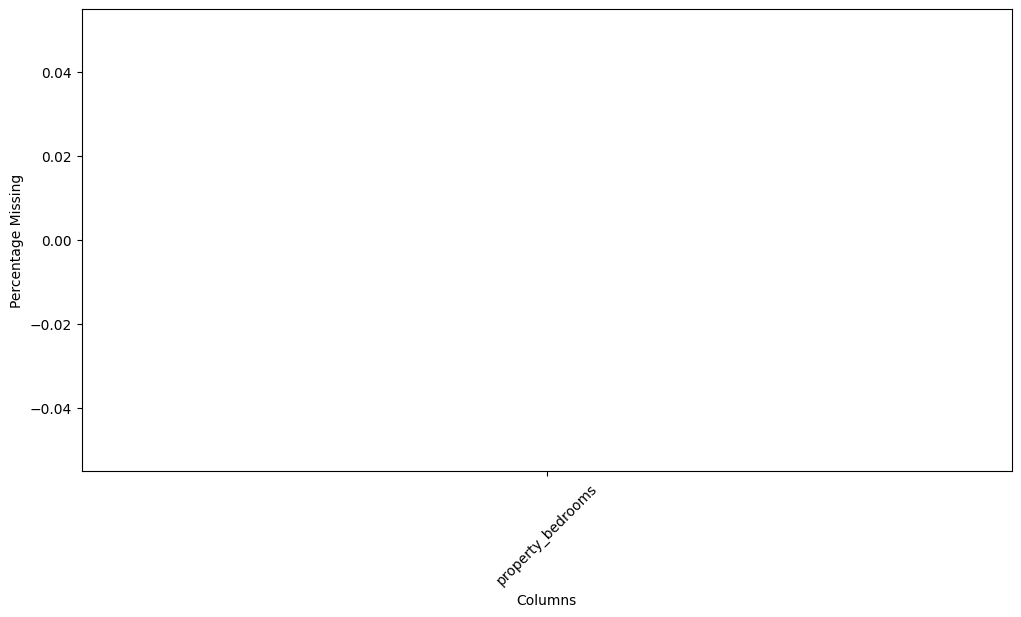

In [79]:
plot_missing_by_column(ds_train[['property_bedrooms']])

### Pre Imputación de Superficie total

property_surface_total    4.87285
dtype: float64


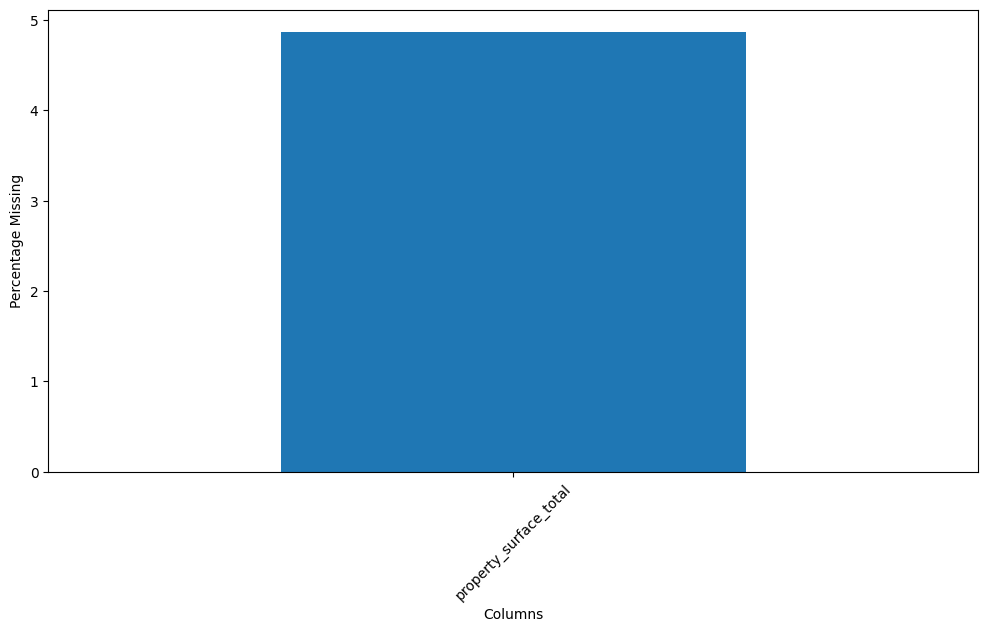

In [80]:
plot_missing_by_column(ds_train[['property_surface_total']])

Como a simple vista muchos registros tienen superficie cubierta, veremos en cuantos faltan ambos datos

In [81]:
ds_train[ds_train.property_surface_total.isna()][ds_train.property_surface_covered.isna()]

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title


#### Reparación de datos faltantes en superficie cubierta

Como todos los datos tienen la superficie cubierta, repararemos estos datos tomando ese valor como superficie total

In [82]:
# Train
ds_train.loc[ds_train.property_surface_total.isna(), 'property_surface_total'] = ds_train.loc[
    ds_train.property_surface_total.isna(), 'property_surface_covered']
len(ds_train.loc[ds_train.property_surface_total.isna()])

# Test
ds_test.loc[ds_test.property_surface_total.isna(), 'property_surface_total'] = ds_test.loc[
    ds_test.property_surface_total.isna(), 'property_surface_covered']
len(ds_test.loc[ds_test.property_surface_total.isna()])

0

### Post Imputación de Superficie total

property_surface_total    0.0
dtype: float64


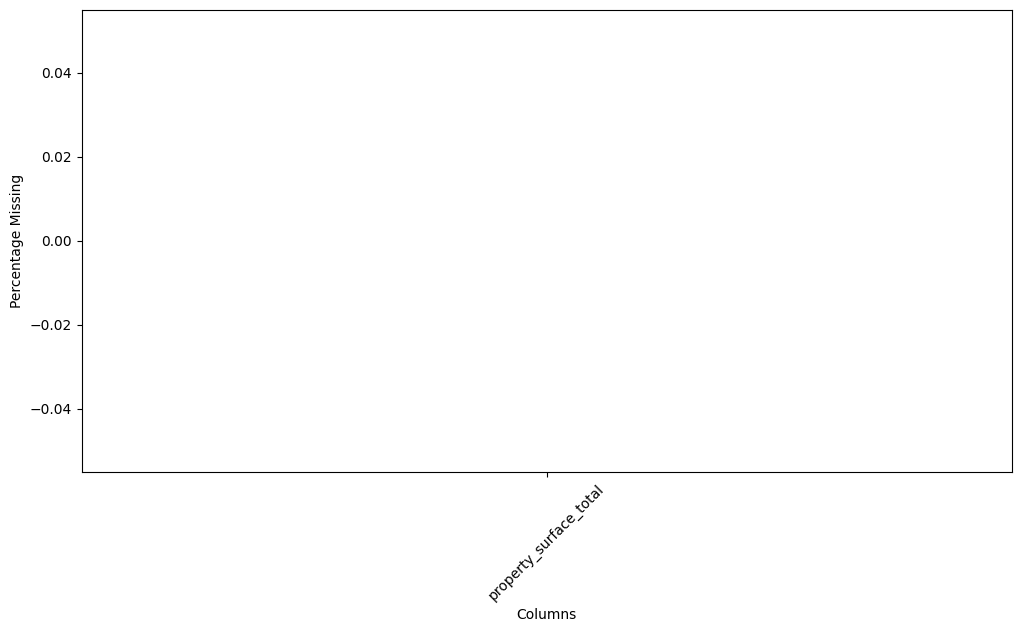

In [83]:
plot_missing_by_column(ds_train[['property_surface_total']])

### Pre Imputación de superficie cubierta

In [84]:
ds_train[ds_train.property_surface_covered.isna()]

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
25781,mDTaRHSeZqWkND9FoTffAQ==,2021-06-24,2021-07-30 00:00:00.000000000,-34.566843,-58.473467,Coghlan,Departamento,2.0,1.0,40.0,NaN,140000.0,Departamento - Belgrano
244480,Ii4GOTaO2lotJJY2n2emhw==,2021-10-22,2022-01-04 10:28:57.791854696,-34.624510,-58.466089,Flores,Departamento,3.0,2.0,67.0,NaN,164000.0,Departamento - Flores
27608,mZe22rRAntDOpdLvjJ4K5w==,2021-12-03,2022-01-27 00:00:00.000000000,-34.588803,-58.420242,Palermo,Departamento,3.0,2.0,50.0,NaN,120000.0,Departamento - Palermo
441187,0dS1cyKDhkj+l7zI3d9tkA==,2021-07-20,2021-09-06 00:00:00.000000000,-34.619727,-58.382940,San Cristobal,Departamento,2.0,1.0,75.0,NaN,110000.0,Inmejorable zona de Universidades - 2amb. 75mt...
209143,EYO8dPFzuRuVAs/466pLKw==,2021-11-29,2022-01-27 00:00:00.000000000,-34.551684,-58.461267,Nuñez,Departamento,3.0,2.0,118.0,NaN,315000.0,3 ambientes al frente a estrenar con terraza p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137881,PwWEOVOlQfocfeyV52WwMA==,2021-01-22,2021-06-05 00:00:00.000000000,-34.603593,-58.376756,San Nicolás,Departamento,1.0,1.0,20.0,NaN,42000.0,Departamento 1 AMB. OFICINA O VIVIENDA - Cent...
370055,zqHmuuNUpGM2iURt+BHIRA==,2021-11-08,2022-02-16 00:00:00.000000000,-34.578574,-58.437570,Palermo,Departamento,1.0,1.0,44.0,NaN,140000.0,Hermoso monoambiente con cochera en pleno Pale...
223910,jGzw8Bko+FaHrR11k3XXVA==,2021-09-14,2022-03-09 00:00:00.000000000,-34.582558,-58.423107,Palermo,Departamento,2.0,1.0,47.0,NaN,195000.0,DEPARTAMENTO 2 AMB 47M2- C/BALCON - MUY LUMINO...
69446,V9jgpofGuqu4IJ3ZOv3CDA==,2021-09-23,2022-03-09 00:00:00.000000000,-34.602936,-58.408476,Almagro,Departamento,3.0,2.0,62.0,NaN,95000.0,Departamento - Almagro


property_surface_covered    3.470649
dtype: float64


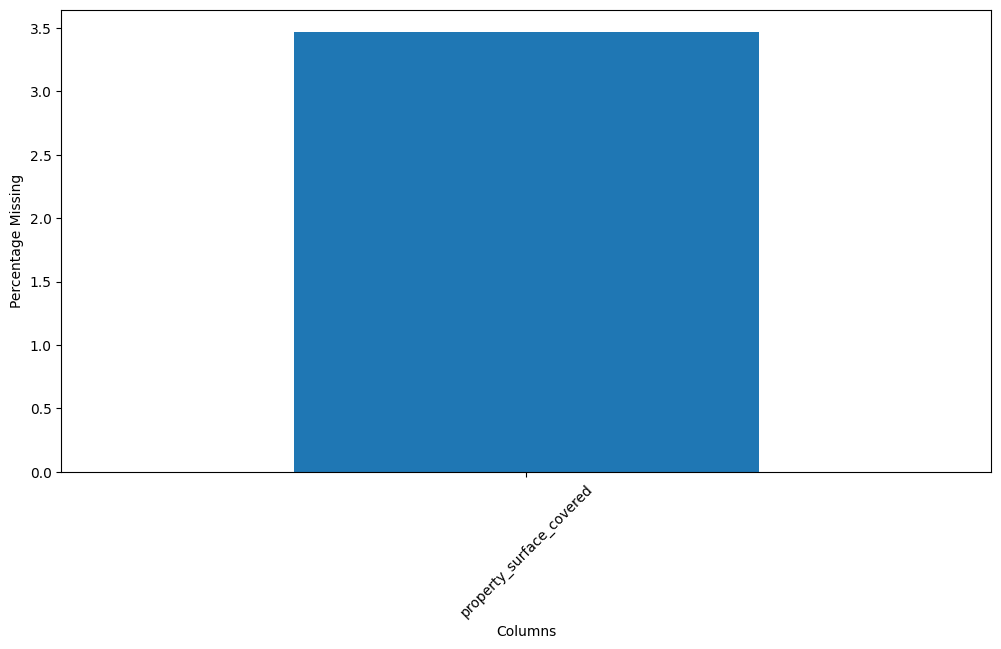

In [85]:
plot_missing_by_column(ds_train[['property_surface_covered']])

##### Reparación de datos faltantes en Superficie cubierta

Como tenemos 2672 registros nulos para la superficie cubierta, imputaremos de la misma forma los registros que son Departamentos porque su superficie total suele ser muy cercana a la cubierta

In [86]:
ds_train[ds_train.property_surface_covered.isna()].property_type.value_counts()

Departamento    2339
PH               173
Casa              77
Name: property_type, dtype: int64

In [87]:
# Test
ds_test.loc[(ds_test.property_surface_covered.isna()) & (
        ds_test.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_test.loc[(ds_test.property_surface_covered.isna()) & (ds_test.property_type == 'Departamento')])

# Train
ds_train.loc[(ds_train.property_surface_covered.isna()) & (
        ds_train.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_train.loc[(ds_train.property_surface_covered.isna()) & (ds_train.property_type == 'Departamento')])

0

In [88]:
print(f"Registros Train: {ds_train.property_surface_covered.isna().sum()}")

Registros Train: 250


In [89]:
print(f"Registros Test: {ds_test.property_surface_covered.isna().sum()}")

Registros Test: 675


Los 262 registros restantes de train los eliminaremos porque representan un porcentaje muy bajo y repararlos de esta forma puede ser impreciso.

Los 651 registros restantes de test tambien los eliminaremos porque representan un porcentaje muy bajo y repararlos de esta forma puede ser impreciso.

In [90]:
# Train
ds_train.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_train[ds_train.property_surface_covered.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_test[ds_test.property_surface_covered.isna()]

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title


Volvemos a evaluar el porcentaje de datos faltantes

id                          0.000000
start_date                  0.000000
end_date                    0.000000
latitud                     0.000000
longitud                    0.000000
place_l3                    0.205792
property_type               0.000000
property_rooms              0.000000
property_bedrooms           0.000000
property_surface_total      0.000000
property_surface_covered    0.000000
property_price              0.000000
property_title              0.000000
dtype: float64


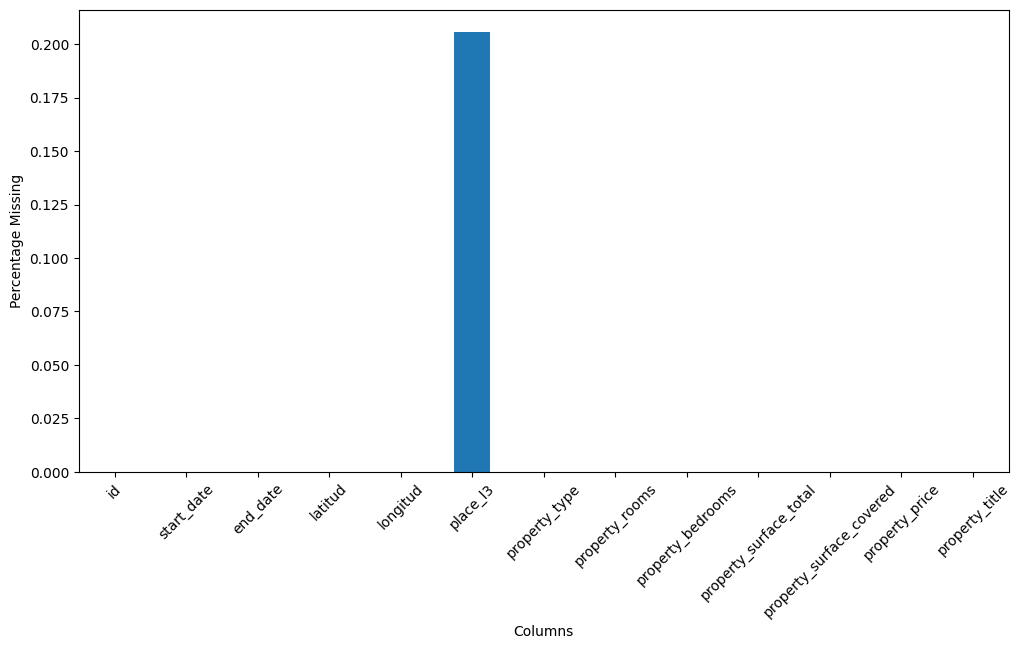

In [91]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

## Grafico de los barrios de CABA

In [92]:
# Proceso el archivo de los barrios de CABA
barrios = gpd.read_file('./barrios.geojson')
barrios.head()

NameError: name 'gpd' is not defined

In [ ]:
# Realizo el grafico de los barrios de CABA
fig, ax = plt.subplots(figsize=(8, 10))
barrios.plot(column='BARRIO', categorical=True, legend=True, ax=ax, cmap='tab20b')

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.4, 1.2))

ax.set(title='Barrios CABA')
plt.show()

## Analisis de Valores Atipicos

### Univariados

#### Metodo IQR

In [185]:
def calculate_univariate_iqr(column, dataset):
    print(f"cantidad de datos del ds: {len(dataset)}")

    # 1er cuartil para property_rooms
    q1 = column.quantile(0.25)

    # 3er cuartil para property_rooms
    q3 = column.quantile(0.75)
    med = column.median()

    # region IQR
    iqr = q3 - q1

    # Bigotes altos y bajos
    limite_superior = q3 + (1.5 * iqr)
    limite_inferior = q1 - (1.5 * iqr)

    outliers = dataset[(column <= limite_inferior) | (column >= limite_superior)]
    print(f"outliers encontrados para los {column.name}: {len(outliers)}")
    print(f"hay {len(outliers) * 100 // len(dataset)}% de outliers de {column.name} sobre el ds")
    print(f"limit sup: {limite_superior}, limite inf: {limite_inferior}")

    outliers_grafico = dataset[(column >= limite_inferior) & (column <= limite_superior)][column.name]

    plt.figure(figsize=(5, 5))
    plt.boxplot(outliers_grafico)
    plt.title(f"Boxplot de IQR para {column.name}")
    plt.show()


In [188]:
def boxplot_outliers_edges(series, moderated_outliers=True):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    if moderated_outliers:
        value = 1.5
    else:
        value = 3

    max = q3 + (value * iqr)
    min = q1 - (value * iqr)

    return min, max

In [189]:
def boxplot_with_outliers(dataset, column_name):
    column = dataset[column_name]
    moderated_min, moderated_max = boxplot_outliers_edges(column)
    severe_min, severe_max = boxplot_outliers_edges(column, moderated_outliers=False)

    print(f"Moderated outliers limits [min: {moderated_min},max: {moderated_max}]")
    print(f"Severe outliers limits [min: {severe_min},max: {severe_max}]")

    plt.figure(figsize=(5, 10))
    column.plot.box()

    plt.axhline(moderated_min, label="Moderated")
    plt.axhline(moderated_max)
    plt.axhline(severe_min, color="r", label="Severe")
    plt.axhline(severe_max, color="r")
    #plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.legend(title="Limites")

##### Ambientes

In [ ]:
calculate_univariate_iqr(ds_train.property_rooms, ds_train)

Tomaremos 7 como límite superior y 0 como límite inferior ya que no tiene sentido que haya cantidad de habitaciones negativas.

In [ ]:
# Train
outlier_inf_rooms_iqr_train = ds_train[ds_train['property_rooms'] < 0]
outlier_sup_rooms_iqr_train = ds_train[ds_train['property_rooms'] > 7]

print(f"Los outliers inf de rooms en train son: {len(outlier_inf_rooms_iqr_train)}. Constituyen al {(len(outlier_inf_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")
print(f"Los outliers sup de rooms en train son: {len(outlier_sup_rooms_iqr_train)}. Constituyen al {(len(outlier_sup_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")


# Test
outlier_inf_rooms_iqr_test = ds_test[ds_test['property_rooms'] < 0]
outlier_sup_rooms_iqr_test = ds_test[ds_test['property_rooms'] > 7]

print(f"Los outliers inf de rooms en test son: {len(outlier_inf_rooms_iqr_test)}. Constituyen al {(len(outlier_inf_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")
print(f"Los outliers sup de rooms en test son: {len(outlier_sup_rooms_iqr_test)}. Constituyen al {(len(outlier_sup_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")



In [ ]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

##### Eliminamos los ambientes que son > 7 ya que rompen la media y representan solamente a un porcentaje minúsculo del dataset (1% sobre el 100% del ds).

In [ ]:
# Train
ds_train.drop(outlier_sup_rooms_iqr_train.index, inplace=True)
print(f"Los outliers sup de rooms en train post eliminacion son: {len(ds_train[ds_train['property_rooms'] > 7])}")

# Test
ds_test.drop(outlier_sup_rooms_iqr_test.index, inplace=True)
print(f"Los outliers sup de rooms en test post eliminacion son: {len(ds_test[ds_test['property_rooms'] > 7])}")

In [ ]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

##### Habitaciones

In [ ]:
boxplot_with_outliers(ds_train, 'property_bedrooms')

In [ ]:
calculate_univariate_iqr(ds_train.property_bedrooms, ds_train)

In [ ]:
# Train
outlier_inf_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] > 6]
print(f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_train)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")
print(f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_train)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test

outlier_inf_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] > 6]
print(f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_test)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")
print(f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_test)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")


###### Eliminaremos una observacion en particular que fue detectada como outlier ya que dice tener -1 habitaciones. Este valor no tiene ningun sentido logico en nuestro domino de problema.


In [ ]:
# Train

print(f"fila a eliminar: {ds_train[ds_train['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_train.index
ds_train.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en train")

# Test

print(f"filas a eliminar: {ds_test[ds_test['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_test.index
ds_test.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en test")

In [ ]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

###### Cuando analizamos los valores atipicos detectados notamos que algunas observaciones eran mayores a los ambientes, esto no es posible en nuestro dominio de problema. Por ende, procederemos a eliminarlos. Podemos hacer esto ya que estos valores representan un valor minusculo del dataset.

In [ ]:
print("Ejemplos: ")
len(f"AMB < HAB = {len(outlier_sup_bedrooms_iqr_train[outlier_sup_bedrooms_iqr_train.property_rooms < outlier_sup_bedrooms_iqr_train.property_bedrooms])}")

In [ ]:
# Train

indice_outlier_train = outlier_sup_bedrooms_iqr_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_bedrooms_iqr_test.index
ds_train.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

In [ ]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

##### Superficie Total

In [ ]:
calculate_univariate_iqr(ds_train.property_surface_total, ds_train)

Elegimos tomar como outlier a viviendas que tengan una superifice menor a 18 ya que, en base a los documentos que leimos, este es el minimo necesario para que una persona viva en una vivienda. 18 m2 minimo. Observar los links adjuntos:

https://observatoriociudad.org/microdepartamentos-y-codigo-de-edificacion/

http://ssplan.buenosaires.gob.ar/webfiles/100_preguntas/ce_art_3_8_1_1_1_areas_y_lados_minimos_de_locales_de_vivienda_individual_y_colectiva.pdf

###### Eliminaremos las viviendas que tienen menos de 18 m2 de superficie

In [ ]:
# Train

indice_outlier_train = ds_train[ds_train.property_surface_total < 18].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = ds_test[ds_test.property_surface_total < 18].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

In [ ]:
inf, sup = boxplot_outliers_edges(ds_train.property_surface_total, False)
print(f"Nuestro rango intercuartil está comprendido entre: {inf}, {sup}")

In [ ]:
# Train

outlier_inf_total_iqr_train = ds_train[ds_train['property_surface_total'] < -44]
outlier_sup_total_iqr_train = ds_train[ds_train['property_surface_total'] > 191]
print(f"Los outliers inf de sup total en train son: {len(outlier_inf_total_iqr_train)}. Constituyen al {(len(outlier_inf_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")
print(f"Los outliers sup de sup total en train son: {len(outlier_sup_total_iqr_train)}. Constituyen al {(len(outlier_sup_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")


# Test

outlier_inf_total_iqr_test = ds_test[ds_test['property_surface_total'] < -44]
outlier_sup_total_iqr_test = ds_test[ds_test['property_surface_total'] > 191]
print(f"Los outliers inf de sup total en test son: {len(outlier_inf_total_iqr_test)}. Constituyen al {(len(outlier_inf_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")
print(f"Los outliers sup de sup total en test son: {len(outlier_sup_total_iqr_test)}. Constituyen al {(len(outlier_sup_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")


Visualizamos nuevamente el box-plot para entender que valores tienen las nuevas observaciones atipicas y ver si debemos seguir eliminando

In [ ]:
boxplot_with_outliers(ds_train, ds_train.property_surface_total.name)

Como tenemos outliers muy altos, el boxplot no se aprecia. Tomaremos solo los outliers severos para un primer análisis

In [ ]:
property_surface_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_total,
                                  bins=[0, 272, 500, 750, 1000, float("inf")],
                                  labels=["0-272", "272-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(property_surface_grouped.value_counts())
ax = property_surface_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                       title="Distribucion de los outliers superiores de la superficie total",
                                                       xlabel="Rango de superficie", ylabel="Frecuencia")

In [ ]:
surface_median = ds_train[ds_train.property_type == 'Casa'].property_surface_total.median()
print(f"Si bien la mediana de la superficite total es {surface_median} y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500")

In [ ]:
# Train

outlier_sup_total_500_train = ds_train[ds_train['property_surface_total'] > 500]
print(f"Los outliers superiores de sup total en train son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_train[ds_train['property_surface_total'] > 500]) * 100) // len(ds_train.property_surface_total)}% de los datos")


# Test

outlier_sup_total_500_test = ds_test[ds_test['property_surface_total'] > 500]
print(f"Los outliers superiores de sup total en test son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_test[ds_test['property_surface_total'] > 500]) * 100) // len(ds_test.property_surface_total)}% de los datos")

In [ ]:
boxplot_with_outliers(ds_train, 'property_surface_total')

###### Procederemos a eliminar las superifices mayores a 500m^2

In [ ]:
# Train

indice_outlier_train = outlier_sup_total_500.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_total_500.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

In [ ]:
sns.boxplot(y=ds_train.property_surface_total)
plt.show()

##### Superficie cubierta

In [ ]:
calculate_univariate_iqr(ds_train.property_surface_covered, ds_train)

In [ ]:
# Train

outlier_inf_covered_iqr_train = ds_train[ds_train['property_surface_covered'] < 0]
outlier_sup_covered_iqr_train = ds_train[ds_train['property_surface_covered'] > 155]
print(f"Los outliers inf de sup cubierta en train son: {len(outlier_inf_covered_iqr_train)}. Constituyen al {(len(outlier_inf_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")
print(f"Los outliers sup de sup cubierta en train son: {len(outlier_sup_covered_iqr_train)}. Constituyen al {(len(outlier_sup_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")

# Test

outlier_inf_covered_iqr_test = ds_test[ds_test['property_surface_covered'] < 0]
outlier_sup_covered_iqr_test = ds_test[ds_test['property_surface_covered'] > 155]
print(f"Los outliers inf de sup cubierta en test son: {len(outlier_inf_covered_iqr_test)}. Constituyen al {(len(outlier_inf_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")
print(f"Los outliers sup de sup cubierta en test son: {len(outlier_sup_covered_iqr_test)}. Constituyen al {(len(outlier_sup_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")

In [ ]:
boxplot_with_outliers(ds_train, 'property_surface_covered')

Como hay algunas observacion demasiado anómalas, las excluímos para ver mejor

In [ ]:
boxplot_with_outliers(ds_train[ds_train.property_surface_covered < 750], 'property_surface_covered')

In [ ]:
surface_total_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_covered,
                               bins=[0, 224, 500, 750, 1000, float("inf")],
                               labels=["0-224", "224-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(surface_total_grouped.value_counts())
ax = surface_total_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                    title="Distribucion de los outliers superiores de la superficie cubierta",
                                                    xlabel="Rango de superficie", ylabel="Frecuencia")

Inspeccionaremos los datos que se encuentran entre 224 y 500 $m^2$ de superficie cubierta

###### Como decidimos tomar como maximo valor de superificie total 500m^2, ese tambien va a ser nuestro maximo limite para la superificie cubierta para mantener la coherencia y el sentido en nuestro dominio. Procederemos a eliminar los valores que se encuentren por arriba. 

In [ ]:
# Train

outlier_sup_cubierta_500 = ds_train[ds_train['property_surface_covered'] > 500]
indice_outlier_train = outlier_sup_cubierta_500.index
ds_train.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

outlier_sup_cubierta_500 = ds_test[ds_test['property_surface_covered'] > 500]
indice_outlier_test = outlier_sup_cubierta_500.index
ds_test.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

In [ ]:
sns.boxplot(y=ds_train.property_surface_covered)
plt.show()

##### Latitud y longitud

In [ ]:
calculate_univariate_iqr(ds_train.latitud, ds_train)

In [ ]:
calculate_univariate_iqr(ds_train.longitud, ds_train)

Los datos de latitud y longitud son dificiles de analizar por medio del rango intercuartil dado que los datos representan variaciones muy pequeñas y no son faciles de imaginar sin una ubicación en el mapa. Haremos este análisis más adelante.

In [ ]:
# Train

outlier_inf_latitud_iqr_train = ds_train[ds_train['latitud'] < -34]
outlier_sup_latitud_iqr_train = ds_train[ds_train['latitud'] > -34]
print(f"Los outliers inf de latitud en train son: {len(outlier_inf_latitud_iqr_train)}. Constituyen al {(len(outlier_inf_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")
print(f"Los outliers sup de latitud en train son: {len(outlier_sup_latitud_iqr_train)}. Constituyen al {(len(outlier_sup_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")

# Test

outlier_inf_latitud_iqr_test = ds_test[ds_test['latitud'] < -34]
outlier_sup_latitud_iqr_test = ds_test[ds_test['latitud'] > -34]
print(f"Los outliers inf de latitud en test son: {len(outlier_inf_latitud_iqr_test)}. Constituyen al {(len(outlier_inf_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")
print(f"Los outliers sup de latitud en test son: {len(outlier_sup_latitud_iqr_test)}. Constituyen al {(len(outlier_sup_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")

#### Metodo Z score

In [93]:
def calculate_zscore_st(dataset, column):
    dataset_copy = dataset.copy()
    media = np.mean(column)
    std = np.std(column)
    dataset_copy[f'z_{column.name}'] = (column - media) / std
    return dataset_copy

Analisis de outliers con el metodo zscore para los ambientes

##### Ambientes

In [94]:
z_rooms_ds = calculate_zscore_st(ds_train, ds_train.property_rooms)

Verificamos si se cumple la regla de oro para el caso de la variable Rooms

In [95]:
# Train

print(f"Los outliers sup de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_train.property_rooms)}% de los datos")
print(f"Los outliers inf de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test

print(f"Los outliers sup de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")
print(f"Los outliers inf de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers sup de rooms en train son: 572. Constituyen al 0% de los datos
Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 572. Constituyen al 3% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos


Aunque Zscore haya encontrado outliers, no consideramos que haya algun motivo valido para borrar estos datos. Por otro lado, corrimos Zscore modificado y despues de haber borrado los outliers por el metodo de IQR, no detecto ningun outlier. Proseguiremos sin borrar mas nada para rooms

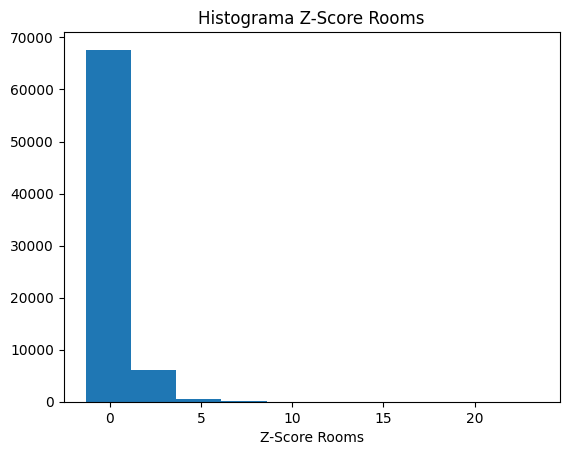

In [96]:
plt.hist(z_rooms_ds.z_property_rooms)
plt.title('Histograma Z-Score Rooms')
plt.xlabel('Z-Score Rooms')
plt.show()

##### Habitaciones

In [97]:
z_bedrooms_ds = calculate_zscore_st(ds_train, ds_train.property_bedrooms)

In [99]:
# Train

print(f"Los outliers sup de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]


print(f"Los outliers sup de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

Los outliers sup de bedrooms en train son: 409.Constituyen al 0% de los datos
Los outliers sup de bedrooms en test son: 409.Constituyen al 2% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,z_property_bedrooms
88543,ML1e0C2Vpnsk9gzokCTWNw==,2021-05-14,2021-07-08 00:00:00.000000000,-34.554993,-58.445175,Belgrano,Casa,8.0,6.0,560.0,236.0,790000.0,IMPONENTE PROPIEDAD EN EL BAJO DE BELGRANO TOT...,3.662048
298469,1rBEz7Gdg+whee55Wp3Q/A==,2021-06-28,2021-09-10 10:28:57.791854696,-34.552764,-58.447947,Belgrano,Casa,8.0,7.0,950.0,950.0,2000000.0,Casa - Belgrano Chico,4.556028
178282,XoCJbQcmh782Elz7cvD7aQ==,2021-03-23,2021-05-03 00:00:00.000000000,-34.617095,-58.374317,San Telmo,Departamento,12.0,6.0,677.0,391.0,570000.0,Depto. de 12 ambientes con terraza.,3.662048
369645,Fo8wpD36R/8umFa0qGVmgA==,2021-11-08,2022-01-27 00:00:00.000000000,-34.556356,-58.465867,Nuñez,Casa,8.0,6.0,392.0,216.0,1300000.0,EXCEPCIONAL CASA - 4 DOR. - PLAYROOM - PISCINA...,3.662048
204253,fSMToafHbqIsdZX8lHKyPg==,2021-05-10,2021-06-05 00:00:00.000000000,-34.597831,-58.388162,Barrio Norte,Departamento,11.0,10.0,636.0,636.0,900000.0,Paraná 900. Retasado. Oportunidad.,7.237966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338316,8XpqoTC49CegZfDMZzNUSA==,2021-04-13,2021-06-05 00:00:00.000000000,-34.579700,-58.508013,Villa Pueyrredón,PH,10.0,8.0,400.0,400.0,380000.0,PH - Villa Pueyrredon- Venta,5.450007
147918,T1nuMdPav4MQLYMK+CaCaw==,2021-08-19,2021-11-01 10:28:57.791854696,-34.603225,-58.387224,Tribunales,Departamento,36.0,18.0,1348.0,1348.0,1700000.0,Departamento - Tribunales,14.389801
1349,fwH71WfOi+vE4kdGMHfWNQ==,2021-09-09,2022-03-09 00:00:00.000000000,-34.620750,-58.502759,Velez Sarsfield,Casa,8.0,6.0,201.0,201.0,345000.0,Casa Ideal Dos Familias - Monte Castro,3.662048
378857,KHoP20DEngLCSx16dgF4Vw==,2021-05-19,2021-05-26 00:00:00.000000000,-34.620836,-58.376823,San Telmo,Casa,9.0,6.0,414.0,414.0,450000.0,Casa San Telmo 9 amb 6 dormitorios 8 baños p...,3.662048


In [100]:
# Train

print(f"Los outliers inf de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

# Test

print(f"Los outliers inf de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

Los outliers inf de bedrooms en train son: 0.Constituyen al 0% de los datos
Los outliers inf de bedrooms en test son: 0.Constituyen al 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,z_property_bedrooms


Mismo caso que para los rooms, al haber borrado los outliers de bedrooms por el metodo IQR notamos que al correr Zscore modificado ya no hay outliers aunque Zscore si detecta algunos. No los eliminaremos porque tras analizar el dataset resultante no vemos ningun valor extraño en nuestro dominio.

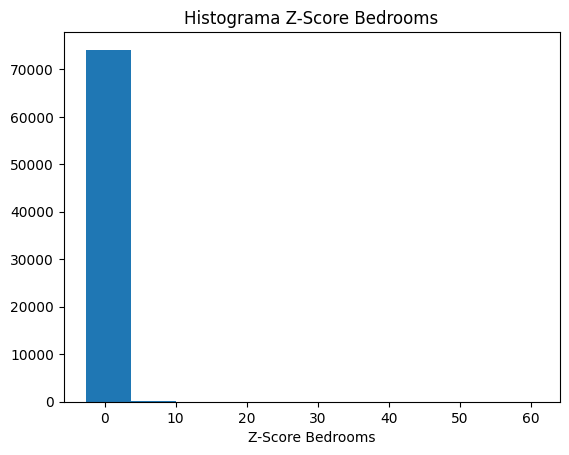

In [101]:
plt.hist(z_bedrooms_ds.z_property_bedrooms)
plt.title('Histograma Z-Score Bedrooms')
plt.xlabel('Z-Score Bedrooms')
plt.show()

##### Superficie Total

In [102]:
z_total_ds = calculate_zscore_st(ds_train, ds_train.property_surface_total)

In [103]:
# Train

print(f"Los outliers superiores de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

# Test

print(f"Los outliers superiores de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

Los outliers superiores de sup total en train son: 47. Constituyen al 0% de los datos
Los outliers superiores de sup total en test son: 47. Constituyen al 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,z_property_surface_total
313745,fx1g9YinBKRFrlnCnN6p4Q==,2021-01-06,2021-01-09,-34.649174,-58.413106,Pompeya,PH,6.0,2.0,8988.0,7454.0,125000.0,PH en venta en Nueva Pompeya,8.819083
34123,Kr2fYXhFuQz9vuxKD2btYw==,2021-02-08,2021-05-01,-34.557903,-58.452293,Belgrano,Departamento,4.0,3.0,5000.0,109.0,418000.0,VENTA DEPARTAMENTO 3-4 AMBIENTES COCHERA BELG...,4.858938
94789,jXPtdq0ibrnXyePLhTi27g==,2021-09-24,2021-09-26,-34.614279,-58.361092,Caballito,Departamento,2.0,1.0,5312.0,4809.0,145000.0,VENTA - EMPRENDIMIENTO DEPARTAMENTO 2 AMBIENTES,5.168758
324541,s0do8ciUehI3xXZNULgg+Q==,2021-03-03,2021-03-23,-34.628721,-58.421383,Boedo,PH,4.0,3.0,20041.0,139.0,390000.0,PH 4 AMB.C/QUINCHO Y TERRAZA AL FRENTE S/EXPENSAS,19.794884
459849,+9w0GBZbuObF0Nw6AAtu2Q==,2021-01-05,2021-01-09,-34.628282,-58.437803,Caballito,Departamento,3.0,2.0,7720.0,5970.0,167894.0,3 Ambientes Venta de Pozo Caballito Full Ameni...,7.559940


In [104]:
# Train

print(f"Los outliers inf de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

# Test

print(f"Los outliers inf de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,z_property_surface_total


Los valores que nos devolvio el metodo Zscore como outliers son aquellas viviendas que tienen mas de 200 m^2 pero que nosotros en el analisis de IQR decidimos mantener. No lo vamos a borrar por lo explicado anteriormente

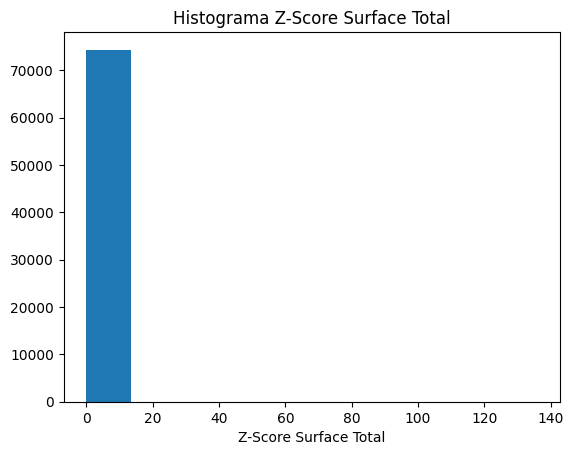

In [105]:
plt.hist(z_total_ds.z_property_surface_total)
plt.title('Histograma Z-Score Surface Total')
plt.xlabel('Z-Score Surface Total')
plt.show()

##### Superficie Cubierta

In [106]:
z_covered_ds = calculate_zscore_st(ds_train, ds_train.property_surface_covered)

In [ ]:
# Train

print(f"Los outliers superiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

# Test

print(f"Los outliers superiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(de_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

In [107]:
# Train

print(f"Los outliers inferiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

# Test

print(f"Los outliers inferiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,z_property_surface_covered


Los outliers encontrados por Zscore son los valores que decidimos mantener. Se encuentran en el rango de > 200m^2 y < 500m^2. No eliminaremos nada. 

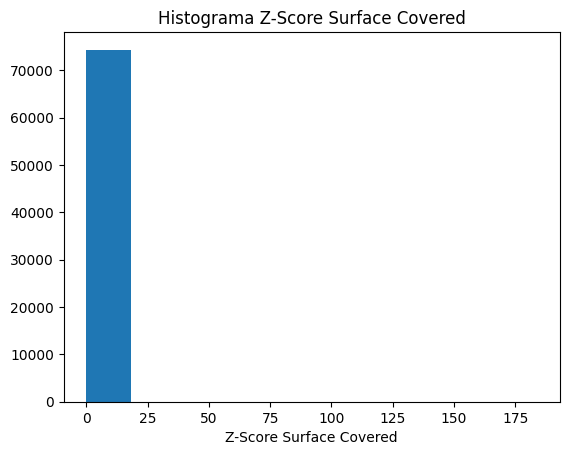

In [108]:
plt.hist(z_covered_ds.z_property_surface_covered)
plt.title('Histograma Z-Score Surface Covered')
plt.xlabel('Z-Score Surface Covered')
plt.show()

##### Latitud y Longitud

In [109]:
z_latitud_ds = calculate_zscore_st(ds_train, ds_train.latitud)

In [110]:
# Train

print(f"Los outliers superiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

# Test

print(f"Los outliers superiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

Los outliers superiores de latitud en train son: 98. Constituyen al 0% de los datos
Los outliers superiores de latitud en test son: 98. Constituyen al 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,z_latitud
45535,gVJs2zI09LS7QNzwZAdc9w==,2021-05-02,2021-06-05 00:00:00.000000000,-31.361412,-64.582919,NaN,Casa,2.0,1.0,1000.0,100.0,135000.0,Cabañas en Tanti,20.780846
163309,OpFvq4wSmXrd9iNew79Law==,2021-06-07,2021-08-20 10:28:57.791854696,-33.198250,-60.459339,NaN,Casa,4.0,3.0,835.0,835.0,289000.0,"Casa en barrio cerrado, 3 dormitorios",8.966570
411053,y41y+zCHtknU3E19ftou1A==,2021-03-02,2021-06-05 00:00:00.000000000,-32.993973,-60.626941,NaN,Departamento,4.0,2.0,55.0,55.0,20000.0,"Departamento 2 dormitorios , amplio. zona sur.",10.280450
169096,18B8+luP2TMKKPSxl//9fA==,2021-07-28,2021-09-28 00:00:00.000000000,-32.840363,-60.807869,NaN,Casa,4.0,3.0,1000.0,180.0,300000.0,Ibarlucea Casa · 180m² · 3 dorm,11.268450
318763,21X2XW7KwPHKb73K0LDWUg==,2021-03-17,2021-06-05 00:00:00.000000000,-27.469213,-58.830635,NaN,Departamento,2.0,1.0,55.0,55.0,125000.0,2 Ambientes de 70 mts2 reciclado a Nuevo. Con ...,45.814911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437007,9DGfU3Z1mcIjJLGP6e7egw==,2021-10-27,2022-01-27 00:00:00.000000000,-32.138586,-64.501116,NaN,Casa,5.0,2.0,700.0,75.0,60000.0,Cabaña en venta en El Corcovado,15.782176
45537,Log7JdvREDlcJw01Puh6Hw==,2021-05-02,2021-06-05 00:00:00.000000000,-31.464181,-64.426088,NaN,Casa,5.0,3.0,540.0,195.0,190000.0,Casa de categoría en venta 3 dormitorios. 2 ba...,20.119851
173667,NPA86ettFBDIW2fcHGhq9Q==,2021-05-11,2021-05-12 00:00:00.000000000,-27.631190,-55.496357,NaN,Departamento,4.0,3.0,98.0,88.0,269000.0,Venta departamento 4 amb Vicente Lopez con cochea,44.773099
288009,1TJ0s3IktNaEYX2+hRurSw==,2021-02-25,2021-03-01 00:00:00.000000000,-33.081030,-68.468140,NaN,Casa,4.0,3.0,108.0,108.0,220000.0,VENTA CASA 4 AMB CON PATIO / PLAYROOM,9.720511


In [111]:
# Train

print(f"Los outliers inferiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

# Test

print(f"Los outliers inferiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

Los outliers inferiores de latitud en train son: 8. Constituyen al 0% de los datos
Los outliers inferiores de latitud en test son: 8. Constituyen al 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,z_latitud
106288,Hrs1e9U6zkvjRh6gD/BBoQ==,2021-03-11,2021-06-05 00:00:00.000000000,-40.131723,-71.299436,NaN,Departamento,2.0,1.0,44.0,44.0,105000.0,"Hermoso departamento en venta, totalmente equi...",-35.628533
410404,KeQ40Z6VTXMHoq4j8oOp+A==,2021-03-02,2021-06-05 00:00:00.000000000,-38.964493,-68.075830,NaN,Casa,7.0,5.0,218.0,218.0,230000.0,CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...,-28.121079
208085,2Xn6RKpg2Fps+wLCsSJavw==,2021-02-01,2021-04-16 10:28:57.791854696,-41.085373,-71.185766,NaN,Departamento,2.0,1.0,60.0,50.0,142000.0,Excelente departamento en venta en Dina Huapi ...,-41.762276
131188,Qmi68tFcN9DiyOJjVmGvYg==,2021-05-27,2021-06-05 00:00:00.000000000,-41.083002,-71.182747,NaN,Departamento,2.0,1.0,66.0,56.0,135000.0,VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO,-41.747023
10486,urWyn9L7ma60VBO8Ru6Xew==,2021-01-13,2021-03-28 10:28:57.791854696,-41.163826,-71.438923,NaN,Casa,4.0,3.0,100.0,100.0,410000.0,BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...,-42.266869
105792,LHDYXTfhEERw7S90k5WA+Q==,2021-03-11,2021-06-05 00:00:00.000000000,-41.084900,-71.187159,NaN,Departamento,1.0,1.0,53.0,53.0,145000.0,Villa Huapi - Dina Huapi - Río Negro - APTO CR...,-41.759228
324200,SSbx+/6MNgxE6rIDYPA0+A==,2021-03-03,2021-06-05 00:00:00.000000000,-38.940227,-68.073865,NaN,Departamento,3.0,2.0,55.0,55.0,120000.0,DEPTO 2 DORM EN COMPLEJO CALLE LOS LIRIOS BARR...,-27.965002
84653,KU1w9AJsKMjk4HeA2Cy+eQ==,2021-03-26,2021-06-05 00:00:00.000000000,-41.168947,-71.439510,NaN,Casa,9.0,7.0,250.0,250.0,500000.0,Calida y Exclusiva Propiedad en Villa Catedral,-42.299810


Comprarandolo con los valores de lat/long del gráfico de CABA, podemos ver que los datos corresponden a valores que no están dentro del rango. Procederemos a eliminarlos en base al zscore.

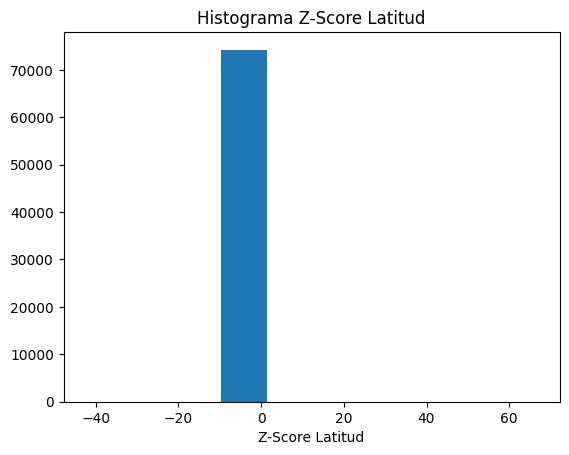

In [112]:
plt.hist(z_latitud_ds.z_latitud)
plt.title('Histograma Z-Score Latitud')
plt.xlabel('Z-Score Latitud')
plt.show()

In [113]:
z_longitud_ds = calculate_zscore_st(ds_train, ds_train.longitud)
z_latitud_ds.head()

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,z_latitud
311331,Sv2qIQZT/mlpfy3kNbk4cA==,2021-04-25,2021-06-05,-34.591985,-58.400183,Recoleta,PH,5.0,4.0,205.0,140.0,565000.0,Ph triplex con patio y terraza con parrilla. T...,0.002267
314451,Sj46VwUXax1qHse1ttGH4w==,2021-01-06,2021-02-13,-34.568139,-58.434005,Palermo,Departamento,3.0,2.0,77.0,65.0,159000.0,VENTA DPTO 3 AMB CON BALCÓN EN LAS CAÑITAS !,0.155640
342028,/BHmgO9aFOmp1F292yW7yg==,2021-09-28,2022-03-09,-34.591358,-58.506574,Villa Devoto,Departamento,3.0,2.0,88.0,77.0,240456.0,Devoto Home Design. Proyecto de categoría. 3 a...,0.006298
434490,9Cc5+wqsySgKhRGXR8M26w==,2021-05-04,2021-07-23,-34.596200,-58.447842,Villa Crespo,Departamento,3.0,2.0,64.0,60.0,129500.0,Departamento 3 Ambientes - Villa Crespo - CABA,-0.024843
236537,TV5FvNlPXcwhO0c5Mq3cNg==,2021-01-20,2021-06-05,-34.586039,-58.399083,Recoleta,Departamento,3.0,2.0,76.0,74.0,220000.0,Excelente 3/4 AMB c/COCHERA - Super Luminoso,0.040509


In [114]:
# Train

print(f"Los outliers superiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

# Test

print(f"Los outliers superiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

Los outliers superiores de longitud en train son: 3. Constituyen al 0% de los datos
Los outliers superiores de longitud en test son: 3. Constituyen al 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,z_longitud
405382,C7g/npsqWoeBtBCNr0injg==,2021-01-07,2021-01-09,-26.61667,-54.133330,NaN,Casa,3.0,2.0,205.0,102.0,125000.0,"Depto Venta, Fincas de San Vicente II, 3 amb",16.535037
220851,/4CiKZFK0D3wJRClv4OO8Q==,2021-06-30,2021-07-02,-27.58162,-56.682310,NaN,Casa,4.0,2.0,105.0,105.0,190000.0,Casa jardín 2 dorm escrit. a 1 cdra Estación,6.763851
173667,NPA86ettFBDIW2fcHGhq9Q==,2021-05-11,2021-05-12,-27.63119,-55.496357,NaN,Departamento,4.0,3.0,98.0,88.0,269000.0,Venta departamento 4 amb Vicente Lopez con cochea,11.310049


In [115]:
# Train

print(f"Los outliers inferiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

# Test

print(f"Los outliers inferiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

Los outliers inferiores de longitud en train son: 101. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 101. Constituyen al 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,z_longitud
45535,gVJs2zI09LS7QNzwZAdc9w==,2021-05-02,2021-06-05 00:00:00.000000000,-31.361412,-64.582919,NaN,Casa,2.0,1.0,1000.0,100.0,135000.0,Cabañas en Tanti,-23.522113
163309,OpFvq4wSmXrd9iNew79Law==,2021-06-07,2021-08-20 10:28:57.791854696,-33.198250,-60.459339,NaN,Casa,4.0,3.0,835.0,835.0,289000.0,"Casa en barrio cerrado, 3 dormitorios",-7.714903
411053,y41y+zCHtknU3E19ftou1A==,2021-03-02,2021-06-05 00:00:00.000000000,-32.993973,-60.626941,NaN,Departamento,4.0,2.0,55.0,55.0,20000.0,"Departamento 2 dormitorios , amplio. zona sur.",-8.357382
169096,18B8+luP2TMKKPSxl//9fA==,2021-07-28,2021-09-28 00:00:00.000000000,-32.840363,-60.807869,NaN,Casa,4.0,3.0,1000.0,180.0,300000.0,Ibarlucea Casa · 180m² · 3 dorm,-9.050947
57097,0dafkOSbRnRyb1kvIdFlCw==,2021-04-20,2021-04-25 00:00:00.000000000,-34.128668,-63.376624,NaN,Departamento,2.0,1.0,43.0,40.0,77500.0,Venta Depto 2amb c/balcon oport/ a estr Saenz ...,-18.897939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45537,Log7JdvREDlcJw01Puh6Hw==,2021-05-02,2021-06-05 00:00:00.000000000,-31.464181,-64.426088,NaN,Casa,5.0,3.0,540.0,195.0,190000.0,Casa de categoría en venta 3 dormitorios. 2 ba...,-22.920924
324200,SSbx+/6MNgxE6rIDYPA0+A==,2021-03-03,2021-06-05 00:00:00.000000000,-38.940227,-68.073865,NaN,Departamento,3.0,2.0,55.0,55.0,120000.0,DEPTO 2 DORM EN COMPLEJO CALLE LOS LIRIOS BARR...,-36.904208
288009,1TJ0s3IktNaEYX2+hRurSw==,2021-02-25,2021-03-01 00:00:00.000000000,-33.081030,-68.468140,NaN,Casa,4.0,3.0,108.0,108.0,220000.0,VENTA CASA 4 AMB CON PATIO / PLAYROOM,-38.415609
84653,KU1w9AJsKMjk4HeA2Cy+eQ==,2021-03-26,2021-06-05 00:00:00.000000000,-41.168947,-71.439510,NaN,Casa,9.0,7.0,250.0,250.0,500000.0,Calida y Exclusiva Propiedad en Villa Catedral,-49.805974


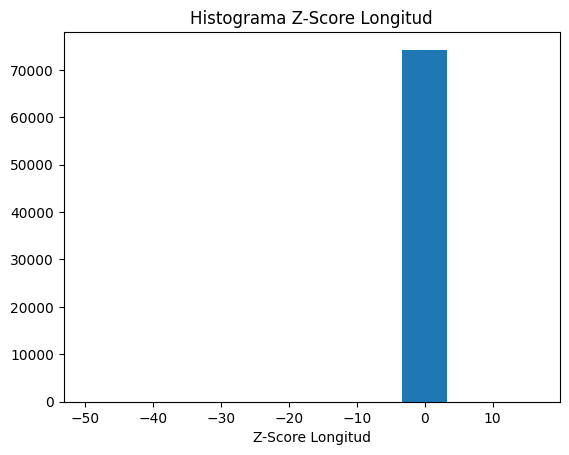

In [116]:
plt.hist(z_longitud_ds.z_longitud)
plt.title('Histograma Z-Score Longitud')
plt.xlabel('Z-Score Longitud')
plt.show()

#### Metodo Z Score modificado

In [117]:
def calculate_modified_zscore_st(dataset, column):
    new_df = dataset.copy()
    mediana = column.median()
    MAD = np.absolute(column - mediana).median()

    new_df[f'zm_{column.name}'] = (column - mediana) * 0.6745 / MAD
    return new_df

##### Ambientes

In [118]:
zm_rooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_rooms)

Verificamos si se cumple la regla de oro para la variable Rooms en el zscore modificado

In [119]:
# Train

print(f"Los outliers superiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

# Test

print(f"Los outliers superiores de rooms en test son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

Los outliers superiores de rooms en train son: 297. Constituyen al 0% de los datos
Los outliers superiores de rooms en test son: 297. Constituyen al 1% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,zm_property_rooms
178282,XoCJbQcmh782Elz7cvD7aQ==,2021-03-23,2021-05-03 00:00:00.000000000,-34.617095,-58.374317,San Telmo,Departamento,12.0,6.0,677.0,391.0,570000.0,Depto. de 12 ambientes con terraza.,6.0705
204253,fSMToafHbqIsdZX8lHKyPg==,2021-05-10,2021-06-05 00:00:00.000000000,-34.597831,-58.388162,Barrio Norte,Departamento,11.0,10.0,636.0,636.0,900000.0,Paraná 900. Retasado. Oportunidad.,5.3960
247562,Od9n6BKK6ykOn0RfsM4B+A==,2021-09-13,2022-01-27 00:00:00.000000000,-34.586259,-58.467474,Villa Ortuzar,PH,9.0,5.0,237.0,237.0,250000.0,PH - Villa Ortuzar,4.0470
358714,nYi5e8OGk9yhdRzvQQHSbQ==,2021-06-29,2021-08-10 00:00:00.000000000,-34.590923,-58.384214,Recoleta,Departamento,9.0,4.0,668.0,668.0,5000000.0,"VENTA impresionante PISO muy ALTO 668,62 m2 co...",4.0470
46297,r+Q6dWmDXQYod+aHTwVAew==,2021-04-21,2021-05-26 00:00:00.000000000,-34.594375,-58.380131,Retiro,Departamento,11.0,8.0,676.0,493.0,1100000.0,Excelente duplex en edificio francés de gran c...,5.3960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84653,KU1w9AJsKMjk4HeA2Cy+eQ==,2021-03-26,2021-06-05 00:00:00.000000000,-41.168947,-71.439510,NaN,Casa,9.0,7.0,250.0,250.0,500000.0,Calida y Exclusiva Propiedad en Villa Catedral,4.0470
338316,8XpqoTC49CegZfDMZzNUSA==,2021-04-13,2021-06-05 00:00:00.000000000,-34.579700,-58.508013,Villa Pueyrredón,PH,10.0,8.0,400.0,400.0,380000.0,PH - Villa Pueyrredon- Venta,4.7215
147918,T1nuMdPav4MQLYMK+CaCaw==,2021-08-19,2021-11-01 10:28:57.791854696,-34.603225,-58.387224,Tribunales,Departamento,36.0,18.0,1348.0,1348.0,1700000.0,Departamento - Tribunales,22.2585
378857,KHoP20DEngLCSx16dgF4Vw==,2021-05-19,2021-05-26 00:00:00.000000000,-34.620836,-58.376823,San Telmo,Casa,9.0,6.0,414.0,414.0,450000.0,Casa San Telmo 9 amb 6 dormitorios 8 baños p...,4.0470


In [120]:
# Train

print(f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]


# Test


print(f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,zm_property_rooms


Notamos que despues de haber borrado los outliers por el metodo de IQR para rooms, no se detectan outliers por este metodo. Lo mas seguro es que hayan sido outliers compartidos, al borrarlos por un metodo la interseccion nos da vacio.

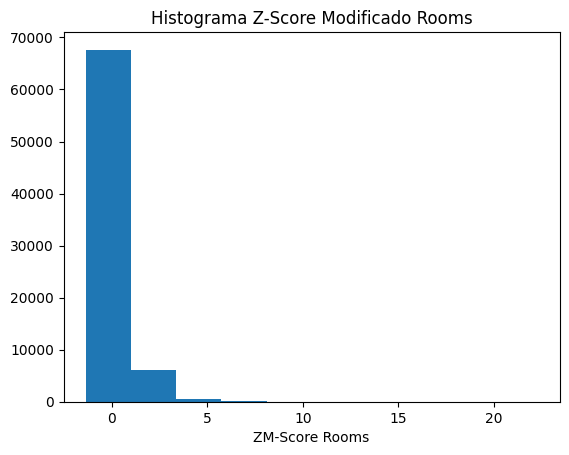

In [121]:
plt.hist(zm_rooms_ds.zm_property_rooms)
plt.title('Histograma Z-Score Modificado Rooms')
plt.xlabel('ZM-Score Rooms')
plt.show()

##### Habitaciones

In [122]:
zm_bedrooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_bedrooms)

In [124]:
# Train

print(f"Los outliers superiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

# Test

print(f"Los outliers superiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

Los outliers superiores de bedrooms en train son: 134. Constituyen al 0% de los datos
Los outliers superiores de bedrooms en test son: 134. Constituyen al 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,zm_property_bedrooms
204253,fSMToafHbqIsdZX8lHKyPg==,2021-05-10,2021-06-05 00:00:00.000000000,-34.597831,-58.388162,Barrio Norte,Departamento,11.0,10.0,636.0,636.0,900000.0,Paraná 900. Retasado. Oportunidad.,5.3960
46297,r+Q6dWmDXQYod+aHTwVAew==,2021-04-21,2021-05-26 00:00:00.000000000,-34.594375,-58.380131,Retiro,Departamento,11.0,8.0,676.0,493.0,1100000.0,Excelente duplex en edificio francés de gran c...,4.0470
344509,eCEA6sAxanFyVw/QtQVnSQ==,2021-12-02,2022-01-27 00:00:00.000000000,-34.624083,-58.389644,Constitución,Casa,13.0,12.0,633.0,633.0,510000.0,Espectacular Casona s/lote de 8.88x65-633m2 ed...,6.7450
241315,dAodpL3gJGTczAJOC9DVjQ==,2021-04-11,2021-04-27 00:00:00.000000000,-34.629306,-58.465354,Flores,Departamento,8.0,8.0,275.0,275.0,219000.0,Piso 275 m2 Rivadavia y Varela,4.0470
395077,bhpL7+Cf2KPrecHIOT9xAw==,2021-02-13,2021-02-27 00:00:00.000000000,-34.614207,-58.526271,Villa Devoto,Casa,14.0,9.0,190.0,288.0,350000.0,PH CASA MULTI FAMILIAR VILLA DEVOTO,4.7215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94998,4TbEkLoqy/0c3zakd66/FQ==,2021-09-24,2022-01-27 00:00:00.000000000,-34.646632,-58.497902,Villa Luro,Departamento,3.0,70.0,70.0,70.0,135000.0,Departamento - Villa Luro,45.8660
48279,r3sXlEIiCgBG5TtUkN93mw==,2021-03-14,2021-06-05 00:00:00.000000000,-34.608645,-58.485619,Villa del Parque,Departamento,4.0,32.0,83.0,75.0,189000.0,Departamento 4 ambientes a estrenar en duplex ...,20.2350
117827,wv0/BYVHFO3KMwIt18OsNg==,2021-08-18,2021-10-31 10:28:57.791854696,-34.587265,-58.389767,Recoleta,Departamento,12.0,11.0,385.0,385.0,5000.0,Departamento venta,6.0705
338316,8XpqoTC49CegZfDMZzNUSA==,2021-04-13,2021-06-05 00:00:00.000000000,-34.579700,-58.508013,Villa Pueyrredón,PH,10.0,8.0,400.0,400.0,380000.0,PH - Villa Pueyrredon- Venta,4.0470


In [125]:
# Train

print(f"Los outliers inferiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

# Test

print(f"Los outliers inferiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

Los outliers inferiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de bedrooms en test son: 0. Constituyen al 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,zm_property_bedrooms


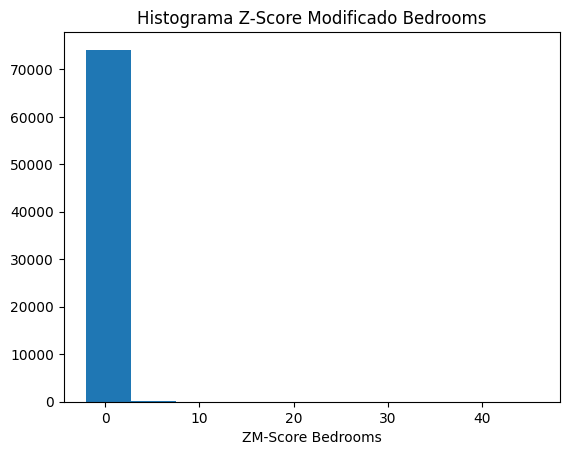

In [126]:
plt.hist(zm_bedrooms_ds.zm_property_bedrooms)
plt.title('Histograma Z-Score Modificado Bedrooms')
plt.xlabel('ZM-Score Bedrooms')
plt.show()

##### Superficie Total

In [127]:
zm_total_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_total)
zm_total_ds.head()

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,zm_property_surface_total
311331,Sv2qIQZT/mlpfy3kNbk4cA==,2021-04-25,2021-06-05,-34.591985,-58.400183,Recoleta,PH,5.0,4.0,205.0,140.0,565000.0,Ph triplex con patio y terraza con parrilla. T...,3.77720
314451,Sj46VwUXax1qHse1ttGH4w==,2021-01-06,2021-02-13,-34.568139,-58.434005,Palermo,Departamento,3.0,2.0,77.0,65.0,159000.0,VENTA DPTO 3 AMB CON BALCÓN EN LAS CAÑITAS !,0.32376
342028,/BHmgO9aFOmp1F292yW7yg==,2021-09-28,2022-03-09,-34.591358,-58.506574,Villa Devoto,Departamento,3.0,2.0,88.0,77.0,240456.0,Devoto Home Design. Proyecto de categoría. 3 a...,0.62054
434490,9Cc5+wqsySgKhRGXR8M26w==,2021-05-04,2021-07-23,-34.596200,-58.447842,Villa Crespo,Departamento,3.0,2.0,64.0,60.0,129500.0,Departamento 3 Ambientes - Villa Crespo - CABA,-0.02698
236537,TV5FvNlPXcwhO0c5Mq3cNg==,2021-01-20,2021-06-05,-34.586039,-58.399083,Recoleta,Departamento,3.0,2.0,76.0,74.0,220000.0,Excelente 3/4 AMB c/COCHERA - Super Luminoso,0.29678


Verificamos si se cumple la regla de oro para la variable sup total en el zscore modificado

In [128]:
# Train

print(f"Los outliers superiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

# Test

print(f"Los outliers superiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

Los outliers superiores de sup total en train son: 5960. Constituyen al 8% de los datos
Los outliers superiores de sup total en test son: 5960. Constituyen al 33% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,zm_property_surface_total
311331,Sv2qIQZT/mlpfy3kNbk4cA==,2021-04-25,2021-06-05,-34.591985,-58.400183,Recoleta,PH,5.0,4.0,205.0,140.0,565000.0,Ph triplex con patio y terraza con parrilla. T...,3.77720
64413,0eoYjtDEE0po4F9Zfi96uA==,2021-10-03,2021-11-03,-34.566052,-58.441924,Belgrano,Departamento,6.0,4.0,247.0,213.0,574900.0,HERMOSO DEPARTADMENTO 6 AMBIENTES INMEJORABLE ...,4.91036
193910,+cN5K397sl2O30323paWCQ==,2021-11-02,2022-05-05,-34.561145,-58.502361,Villa Urquiza,Casa,8.0,5.0,750.0,425.0,750000.0,Hermosa casa en venta - Barrio Parque Saavedra,18.48130
179137,CUa3qxrSKY3m3Sm5/4ejXQ==,2021-09-27,2021-11-10,-34.562435,-58.453945,Belgrano,Departamento,6.0,5.0,270.0,240.0,690000.0,Venta-Departamento -6 ambientes -Belgrano-Segu...,5.53090
147648,08mTGAtuyjR5NAXNqXoFtQ==,2021-08-19,2021-10-01,-34.562435,-58.453945,Belgrano,Departamento,4.0,4.0,334.0,128.0,344500.0,Departamento Venta Palermo Las Cañitas Cuatro...,7.25762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313337,7xG8i/OvZRbVGYA0dmvLdw==,2021-06-14,2021-07-26,-34.567686,-58.446284,Belgrano,Departamento,4.0,3.0,380.0,380.0,1600000.0,VENTA TORRE AISENSON Piso ALTO con excelente...,8.49870
212899,1QsD3ppj6h7gzX0ecN208Q==,2021-03-22,2021-05-02,-34.604185,-58.432451,Villa Crespo,Departamento,5.0,4.0,200.0,178.0,450000.0,Departamento de 5 ambientes en Venta en Villa ...,3.64230
423395,pnCm2wyk4gpmyx3n6vaa6w==,2021-12-15,2022-01-27,-34.591153,-58.395454,Recoleta,Departamento,7.0,5.0,400.0,400.0,1250000.0,Departamento - Recoleta,9.03830
293731,7xLoYdtGbv9dur5S1eCgrg==,2021-02-23,2021-04-13,-34.588389,-58.384745,Barrio Norte,Departamento,5.0,4.0,202.0,202.0,575000.0,Cercano al Patio Bullrich - Excepcional Piso d...,3.69626


In [129]:
# Train

print(f"Los outliers inferiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

# Test

print(f"Los outliers inferiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

Los outliers inferiores de sup total son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup total son: 0. Constituyen al 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,zm_property_surface_total


Los valores que nos devolvio el metodo Zscore Modificado, asi como tambien el Zscore, son aquellas viviendas que tienen mas de 200 m^2 y menos de 500m^2pero que nosotros en el analisis de IQR decidimos mantener. No lo vamos a borrar por lo explicado anteriormente

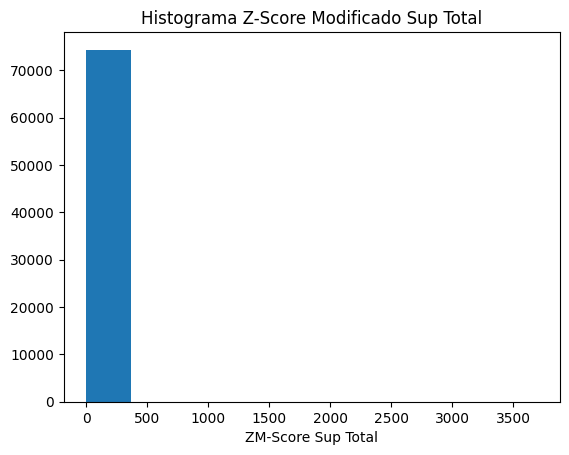

In [130]:
plt.hist(zm_total_ds.zm_property_surface_total)
plt.title('Histograma Z-Score Modificado Sup Total')
plt.xlabel('ZM-Score Sup Total')
plt.show()

##### Superficie Cubierta

In [131]:
zm_covered_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_covered)

Verificamos si se cumple la regla de oro para la variable sup cubierta en el zscore modificado

In [132]:
# Train

print(f"Los outliers superiores de sup cubierta en train son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

# Test

print(f"Los outliers superiores de sup cubierta en test son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

Los outliers superiores de sup cubierta son: 8% de los datos
Los outliers superiores de sup cubierta son: 33% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,zm_property_surface_covered
64413,0eoYjtDEE0po4F9Zfi96uA==,2021-10-03,2021-11-03,-34.566052,-58.441924,Belgrano,Departamento,6.0,4.0,247.0,213.0,574900.0,HERMOSO DEPARTADMENTO 6 AMBIENTES INMEJORABLE ...,5.261100
193910,+cN5K397sl2O30323paWCQ==,2021-11-02,2022-05-05,-34.561145,-58.502361,Villa Urquiza,Casa,8.0,5.0,750.0,425.0,750000.0,Hermosa casa en venta - Barrio Parque Saavedra,12.410800
179137,CUa3qxrSKY3m3Sm5/4ejXQ==,2021-09-27,2021-11-10,-34.562435,-58.453945,Belgrano,Departamento,6.0,5.0,270.0,240.0,690000.0,Venta-Departamento -6 ambientes -Belgrano-Segu...,6.171675
257904,SQtJ5FeBWRqz9wWxuw4+Yg==,2021-11-03,2022-01-27,-34.592026,-58.408449,Barrio Norte,Departamento,6.0,5.0,298.0,277.0,550000.0,1 - Guemes 2900,7.419500
395302,+IDENcPXXo3F/2sMmVw0HQ==,2021-02-13,2021-03-01,-34.639708,-58.432836,Parque Chacabuco,Casa,4.0,3.0,191.0,327.0,260000.0,CASA 4 AMBIENTES SOBRE LOTE PROPIO DESARROLLAD...,9.105750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313337,7xG8i/OvZRbVGYA0dmvLdw==,2021-06-14,2021-07-26,-34.567686,-58.446284,Belgrano,Departamento,4.0,3.0,380.0,380.0,1600000.0,VENTA TORRE AISENSON Piso ALTO con excelente...,10.893175
212899,1QsD3ppj6h7gzX0ecN208Q==,2021-03-22,2021-05-02,-34.604185,-58.432451,Villa Crespo,Departamento,5.0,4.0,200.0,178.0,450000.0,Departamento de 5 ambientes en Venta en Villa ...,4.080725
423395,pnCm2wyk4gpmyx3n6vaa6w==,2021-12-15,2022-01-27,-34.591153,-58.395454,Recoleta,Departamento,7.0,5.0,400.0,400.0,1250000.0,Departamento - Recoleta,11.567675
293731,7xLoYdtGbv9dur5S1eCgrg==,2021-02-23,2021-04-13,-34.588389,-58.384745,Barrio Norte,Departamento,5.0,4.0,202.0,202.0,575000.0,Cercano al Patio Bullrich - Excepcional Piso d...,4.890125


In [133]:
# Train

print(f"Los outliers inferiores de sup cubierta en train son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

# Test

print(f"Los outliers inferiores de sup cubierta en test son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,zm_property_surface_covered


Mismo caso que el explicado para Zscore, Zscore modificado esta tomando como outliers a las superificies cubiertas que estan entre 200 y 500 m^2, nosotros optamos por mantener este valor ya nos parece valido, no eliminaremos nada.

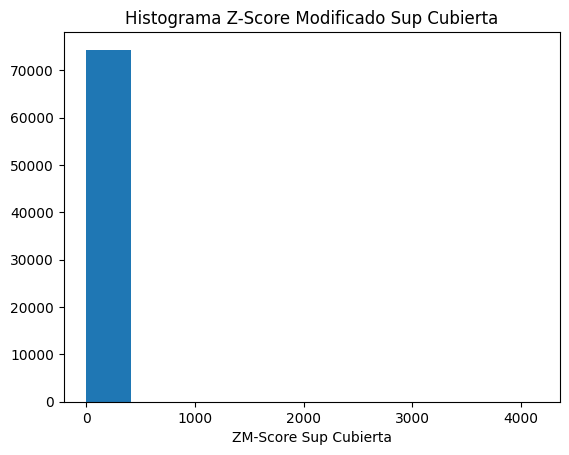

In [134]:
plt.hist(zm_covered_ds.zm_property_surface_covered)
plt.title('Histograma Z-Score Modificado Sup Cubierta')
plt.xlabel('ZM-Score Sup Cubierta')
plt.show()

##### Latitud y longitud

In [135]:
zm_latitud_ds = calculate_modified_zscore_st(ds_train, ds_train.latitud)

Verificamos si se cumple la regla de oro para la variable latitud en el zscore modificado

In [136]:
# Train

print(f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

# Test

print(f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

Los outliers superiores de latitud son: 0% de los datos
Los outliers superiores de latitud son: 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,zm_latitud
45535,gVJs2zI09LS7QNzwZAdc9w==,2021-05-02,2021-06-05 00:00:00.000000000,-31.361412,-64.582919,NaN,Casa,2.0,1.0,1000.0,100.0,135000.0,Cabañas en Tanti,113.831284
163309,OpFvq4wSmXrd9iNew79Law==,2021-06-07,2021-08-20 10:28:57.791854696,-33.198250,-60.459339,NaN,Casa,4.0,3.0,835.0,835.0,289000.0,"Casa en barrio cerrado, 3 dormitorios",49.176409
411053,y41y+zCHtknU3E19ftou1A==,2021-03-02,2021-06-05 00:00:00.000000000,-32.993973,-60.626941,NaN,Departamento,4.0,2.0,55.0,55.0,20000.0,"Departamento 2 dormitorios , amplio. zona sur.",56.366756
169096,18B8+luP2TMKKPSxl//9fA==,2021-07-28,2021-09-28 00:00:00.000000000,-32.840363,-60.807869,NaN,Casa,4.0,3.0,1000.0,180.0,300000.0,Ibarlucea Casa · 180m² · 3 dorm,61.773689
57097,0dafkOSbRnRyb1kvIdFlCw==,2021-04-20,2021-04-25 00:00:00.000000000,-34.128668,-63.376624,NaN,Departamento,2.0,1.0,43.0,40.0,77500.0,Venta Depto 2amb c/balcon oport/ a estr Saenz ...,16.426606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437007,9DGfU3Z1mcIjJLGP6e7egw==,2021-10-27,2022-01-27 00:00:00.000000000,-32.138586,-64.501116,NaN,Casa,5.0,2.0,700.0,75.0,60000.0,Cabaña en venta en El Corcovado,86.475535
45537,Log7JdvREDlcJw01Puh6Hw==,2021-05-02,2021-06-05 00:00:00.000000000,-31.464181,-64.426088,NaN,Casa,5.0,3.0,540.0,195.0,190000.0,Casa de categoría en venta 3 dormitorios. 2 ba...,110.213920
173667,NPA86ettFBDIW2fcHGhq9Q==,2021-05-11,2021-05-12 00:00:00.000000000,-27.631190,-55.496357,NaN,Departamento,4.0,3.0,98.0,88.0,269000.0,Venta departamento 4 amb Vicente Lopez con cochea,245.131432
288009,1TJ0s3IktNaEYX2+hRurSw==,2021-02-25,2021-03-01 00:00:00.000000000,-33.081030,-68.468140,NaN,Casa,4.0,3.0,108.0,108.0,220000.0,VENTA CASA 4 AMB CON PATIO / PLAYROOM,53.302432


In [137]:
# Train

print(f"Los outliers inferiores de sup cubierta en train son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

# Test

print(f"Los outliers inferiores de sup cubierta en test son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

Los outliers inferiores de sup cubierta son: 13. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta son: 13. Constituyen al 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,zm_latitud
106288,Hrs1e9U6zkvjRh6gD/BBoQ==,2021-03-11,2021-06-05 00:00:00.000000000,-40.131723,-71.299436,NaN,Departamento,2.0,1.0,44.0,44.0,105000.0,"Hermoso departamento en venta, totalmente equi...",-194.875019
410404,KeQ40Z6VTXMHoq4j8oOp+A==,2021-03-02,2021-06-05 00:00:00.000000000,-38.964493,-68.075830,NaN,Casa,7.0,5.0,218.0,218.0,230000.0,CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...,-153.789681
351916,BKk+pz+G7Tajvr6LE+9UZw==,2021-06-25,2021-07-17 00:00:00.000000000,-34.694900,-58.469161,Villa Lugano,Casa,2.0,1.0,72.0,72.0,149000.0,Casa LUG 2 Ambientes amplios- IDEAL CONSTRUCT...,-3.504203
208085,2Xn6RKpg2Fps+wLCsSJavw==,2021-02-01,2021-04-16 10:28:57.791854696,-41.085373,-71.185766,NaN,Departamento,2.0,1.0,60.0,50.0,142000.0,Excelente departamento en venta en Dina Huapi ...,-228.442574
82540,j0CggSFoqC9J+F1N9h91wg==,2021-03-12,2021-03-13 00:00:00.000000000,-34.698989,-58.469994,Villa Riachuelo,Departamento,4.0,3.0,91.0,79.0,65000.0,Venta 3/4 ambientes Vista Abierta Luminoso,-3.648132
250707,n/VGq/lp+AH1XRd4RSHphg==,2021-04-29,2021-05-15 00:00:00.000000000,-34.698989,-58.469994,Villa Riachuelo,Departamento,4.0,3.0,91.0,79.0,59900.0,Venta 3/4 ambientes Vista Abierta Luminoso,-3.648132
308365,j4l0DxeSfN6KnNMYSo6bSg==,2021-04-28,2021-05-01 00:00:00.000000000,-34.694900,-58.469161,Villa Lugano,Casa,2.0,1.0,80.0,80.0,159000.0,Casa LUGANO 2 Ambientes amplios- PATIO Y JARDIN,-3.504203
131188,Qmi68tFcN9DiyOJjVmGvYg==,2021-05-27,2021-06-05 00:00:00.000000000,-41.083002,-71.182747,NaN,Departamento,2.0,1.0,66.0,56.0,135000.0,VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO,-228.359101
10486,urWyn9L7ma60VBO8Ru6Xew==,2021-01-13,2021-03-28 10:28:57.791854696,-41.163826,-71.438923,NaN,Casa,4.0,3.0,100.0,100.0,410000.0,BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...,-231.204016
105792,LHDYXTfhEERw7S90k5WA+Q==,2021-03-11,2021-06-05 00:00:00.000000000,-41.084900,-71.187159,NaN,Departamento,1.0,1.0,53.0,53.0,145000.0,Villa Huapi - Dina Huapi - Río Negro - APTO CR...,-228.425896


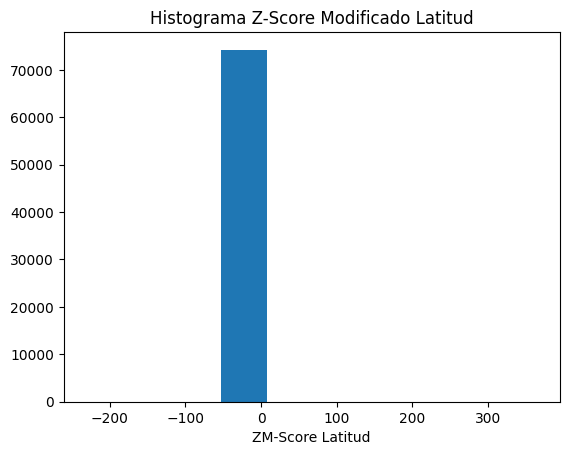

In [138]:
plt.hist(zm_latitud_ds.zm_latitud)
plt.title('Histograma Z-Score Modificado Latitud')
plt.xlabel('ZM-Score Latitud')
plt.show()

In [139]:
zm_longitud_ds = calculate_modified_zscore_st(ds_train, ds_train.longitud)

Verificamos si se cumple la regla de oro para la variable longitud en el zscore modificado

In [140]:
# Train

print(f"Los outliers superiores de longitud en train son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

# Test

print(f"Los outliers superiores de longitud en test son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

Los outliers superiores de longitud son: 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,zm_longitud
405382,C7g/npsqWoeBtBCNr0injg==,2021-01-07,2021-01-09,-26.61667,-54.133330,NaN,Casa,3.0,2.0,205.0,102.0,125000.0,"Depto Venta, Fincas de San Vicente II, 3 amb",102.953802
220851,/4CiKZFK0D3wJRClv4OO8Q==,2021-06-30,2021-07-02,-27.58162,-56.682310,NaN,Casa,4.0,2.0,105.0,105.0,190000.0,Casa jardín 2 dorm escrit. a 1 cdra Estación,42.001092
173667,NPA86ettFBDIW2fcHGhq9Q==,2021-05-11,2021-05-12,-27.63119,-55.496357,NaN,Departamento,4.0,3.0,98.0,88.0,269000.0,Venta departamento 4 amb Vicente Lopez con cochea,70.360298


In [141]:
# Train

print(f"Los outliers inferiores de longitud en train son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

# Test

print(f"Los outliers inferiores de longitud en test son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

Los outliers inferiores de longitud en train son: 104. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 104. Constituyen al 0% de los datos


,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,zm_longitud
45535,gVJs2zI09LS7QNzwZAdc9w==,2021-05-02,2021-06-05 00:00:00.000000000,-31.361412,-64.582919,NaN,Casa,2.0,1.0,1000.0,100.0,135000.0,Cabañas en Tanti,-146.922912
163309,OpFvq4wSmXrd9iNew79Law==,2021-06-07,2021-08-20 10:28:57.791854696,-33.198250,-60.459339,NaN,Casa,4.0,3.0,835.0,835.0,289000.0,"Casa en barrio cerrado, 3 dormitorios",-48.317453
411053,y41y+zCHtknU3E19ftou1A==,2021-03-02,2021-06-05 00:00:00.000000000,-32.993973,-60.626941,NaN,Departamento,4.0,2.0,55.0,55.0,20000.0,"Departamento 2 dormitorios , amplio. zona sur.",-52.325240
169096,18B8+luP2TMKKPSxl//9fA==,2021-07-28,2021-09-28 00:00:00.000000000,-32.840363,-60.807869,NaN,Casa,4.0,3.0,1000.0,180.0,300000.0,Ibarlucea Casa · 180m² · 3 dorm,-56.651703
57097,0dafkOSbRnRyb1kvIdFlCw==,2021-04-20,2021-04-25 00:00:00.000000000,-34.128668,-63.376624,NaN,Departamento,2.0,1.0,43.0,40.0,77500.0,Venta Depto 2amb c/balcon oport/ a estr Saenz ...,-118.077286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45537,Log7JdvREDlcJw01Puh6Hw==,2021-05-02,2021-06-05 00:00:00.000000000,-31.464181,-64.426088,NaN,Casa,5.0,3.0,540.0,195.0,190000.0,Casa de categoría en venta 3 dormitorios. 2 ba...,-143.172692
324200,SSbx+/6MNgxE6rIDYPA0+A==,2021-03-03,2021-06-05 00:00:00.000000000,-38.940227,-68.073865,NaN,Departamento,3.0,2.0,55.0,55.0,120000.0,DEPTO 2 DORM EN COMPLEJO CALLE LOS LIRIOS BARR...,-230.400490
288009,1TJ0s3IktNaEYX2+hRurSw==,2021-02-25,2021-03-01 00:00:00.000000000,-33.081030,-68.468140,NaN,Casa,4.0,3.0,108.0,108.0,220000.0,VENTA CASA 4 AMB CON PATIO / PLAYROOM,-239.828614
84653,KU1w9AJsKMjk4HeA2Cy+eQ==,2021-03-26,2021-06-05 00:00:00.000000000,-41.168947,-71.439510,NaN,Casa,9.0,7.0,250.0,250.0,500000.0,Calida y Exclusiva Propiedad en Villa Catedral,-310.881772


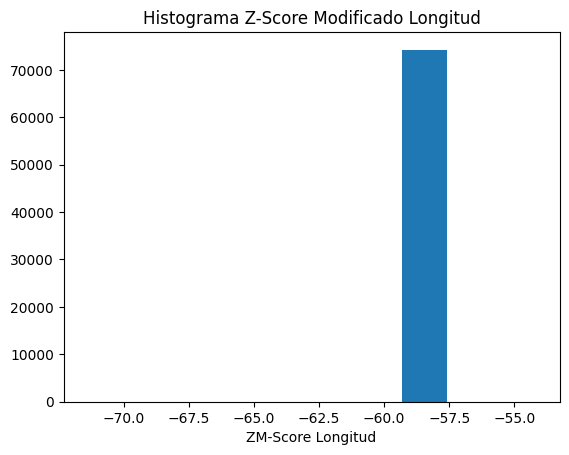

In [142]:
plt.hist(zm_longitud_ds.longitud)
plt.title('Histograma Z-Score Modificado Longitud')
plt.xlabel('ZM-Score Longitud')
plt.show()

### Multivariados

#### Clustering - Mahalanobis

In [143]:
def calculate_mahalanobis_distance(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X


In [144]:
def create_scatter_plot(dataset, col1, col2):
    #Scatter Plot
    plt.scatter(dataset[col1], dataset[col2])
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

In [145]:
def create_scattergram(dataset, col1, col2, outlier_limit):
    #Grafico scatter
    es_outlier = (dataset['mahalanobis'] > outlier_limit)

    sns.scatterplot(x=dataset[col1], y=dataset[col2], hue=es_outlier)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.show()

##### Analisis entre ambientes y habitaciones de valores atipicos

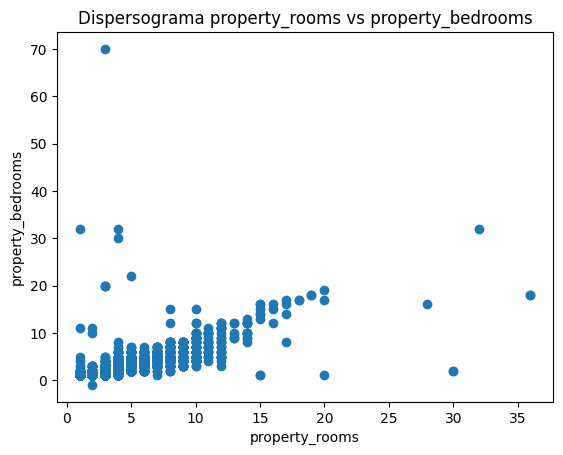

In [146]:
create_scatter_plot(ds_train, 'property_rooms', 'property_bedrooms')

Parecerían exisitir algunas observaciones anómalas. Vamos a calcular la distancia de mahalanobis para cada observación.

In [154]:
mahalanobis_rooms_bedrooms_train = calculate_mahalanobis_distance(ds_train, 'property_rooms', 'property_bedrooms')
mahalanobis_rooms_bedrooms_test = calculate_mahalanobis_distance(ds_test, 'property_rooms', 'property_bedrooms')

mahalanobis_rooms_bedrooms_train.head()

,property_rooms,property_bedrooms,mahalanobis
311331,5.0,4.0,5.500633
314451,3.0,2.0,0.033996
342028,3.0,2.0,0.033996
434490,3.0,2.0,0.033996
236537,3.0,2.0,0.033996


Tenemos que seleccionar un valor umbral para definir qué observaciones podrían ser anómalas según la distancia de mahalanobis.

<AxesSubplot: ylabel='mahalanobis'>

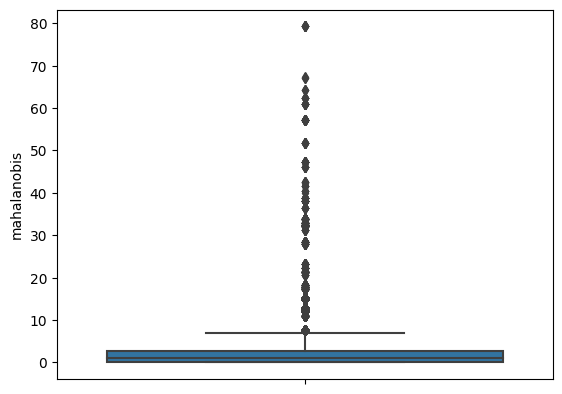

In [155]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train.mahalanobis)

Seleccionamos 35 como valor umbral

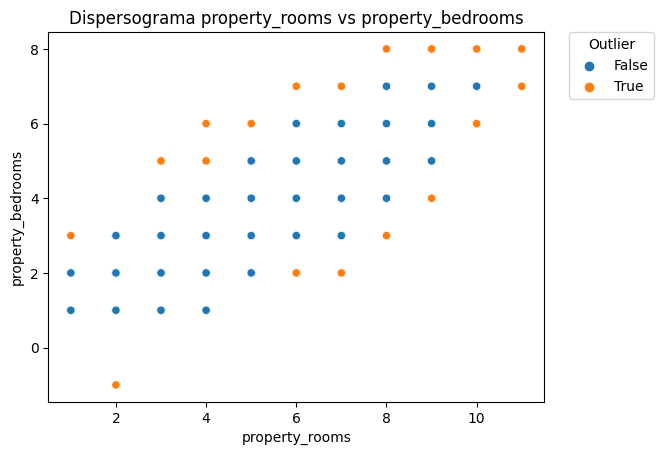

Los outliers para mahalanobis con un umbral de 35 son: 165. Constituyen el 0% de los datos


In [156]:
umbral = 35
create_scattergram(mahalanobis_rooms_bedrooms_train, 'property_rooms', 'property_bedrooms', umbral)

print(f"Los outliers para mahalanobis con un umbral de {umbral} son: {len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral])}. Constituyen el {(len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]) * 100) // len(ds_train)}% de los datos")

<AxesSubplot: ylabel='mahalanobis'>

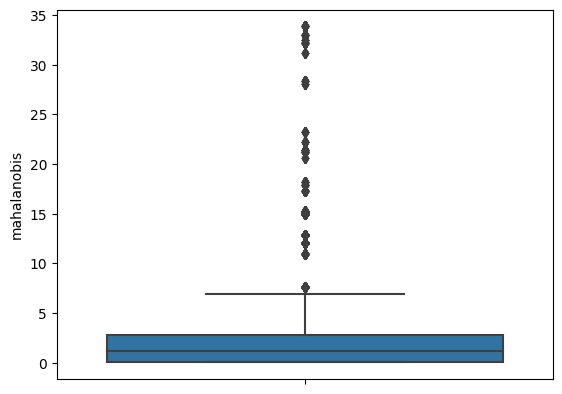

In [157]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] < umbral].mahalanobis)

In [158]:
mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]

,property_rooms,property_bedrooms,mahalanobis
358714,9.0,4.0,57.292189
46297,11.0,8.0,41.652925
323346,9.0,4.0,57.292189
241315,8.0,8.0,62.329243
174858,6.0,2.0,38.141951
...,...,...,...
263173,8.0,8.0,62.329243
110795,9.0,4.0,57.292189
204148,9.0,4.0,57.292189
154495,6.0,2.0,38.141951


Como podemos observar en el scatter plot, quedan bien marcados los outliers que en nuestro dominio de problema no tienen ningun sentido.
Por ejemplo, tener 7 ambientes y 1 habitacion...
Procederemos a eliminar estos outliers.

###### Eliminamos dichas observaciones

In [159]:
# Train 

indice_outlier_train = mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")


# Test

indice_outlier_test = mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 165 registros en train
Se han eliminado: 78 registros en test


Dispersograma sin los outliers mencionados


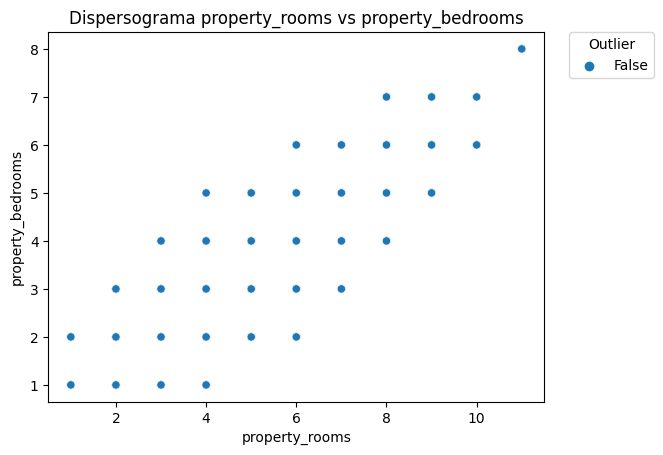

In [160]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test.mahalanobis < umbral], 'property_rooms',
                   'property_bedrooms', umbral)

##### Analisis entre superficie total y superificie cubierta de valores atipicos

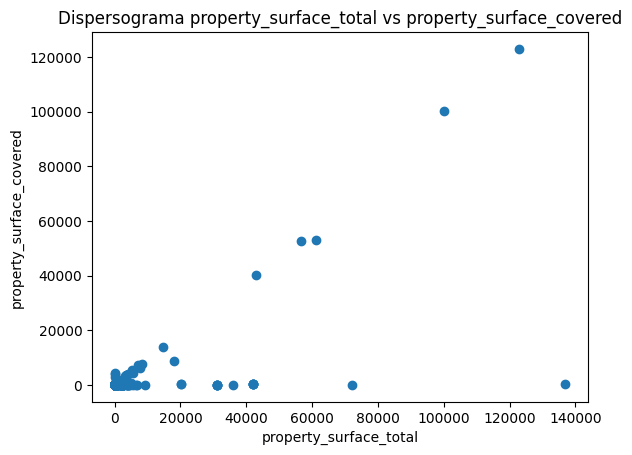

In [161]:
create_scatter_plot(ds_train, 'property_surface_total', 'property_surface_covered')

In [162]:
mahalanobis_surfaces_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total', 'property_surface_covered')
mahalanobis_surfaces_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total', 'property_surface_covered')

mahalanobis_surfaces_train.head()

,property_surface_total,property_surface_covered,mahalanobis
311331,205.0,140.0,0.248103
314451,77.0,65.0,0.012098
342028,88.0,77.0,0.000423
434490,64.0,60.0,0.023097
236537,76.0,74.0,0.002527


<AxesSubplot: ylabel='mahalanobis'>

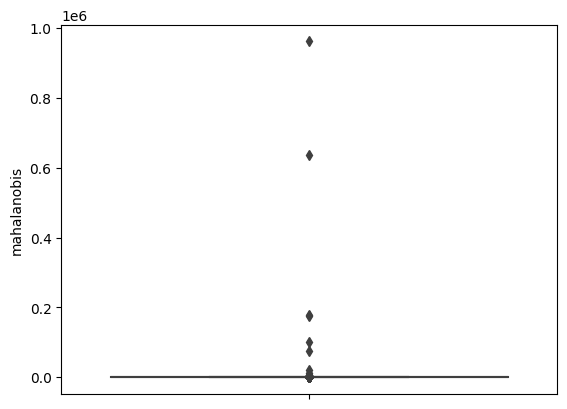

In [163]:
sns.boxplot(y=mahalanobis_surfaces_train.mahalanobis)

In [164]:
mahalanobis_surfaces_train.isna().sum()

property_surface_total      0
property_surface_covered    0
mahalanobis                 0
dtype: int64

In [165]:
#Defino umbral
umbral = 175  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral]

,property_surface_total,property_surface_covered,mahalanobis
94789,5312.0,4809.0,1425.738134
324541,20041.0,139.0,1584.967348
459849,7720.0,5970.0,2222.282857
370917,42110.0,222.0,7028.392796
314541,5741.0,4276.0,1130.342677
354376,41.0,3837.0,957.170847
275253,31000.0,26.0,3841.074643
237392,20041.0,139.0,1584.967348
84073,36000.0,30.0,5180.913717
370918,42110.0,307.0,7002.031689


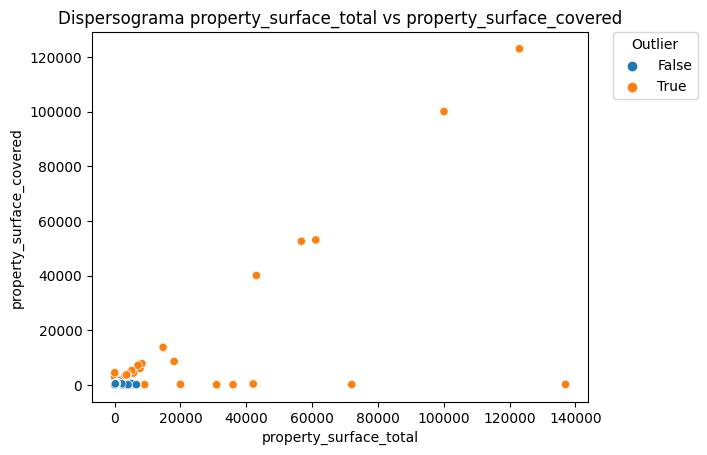

In [166]:
create_scattergram(mahalanobis_surfaces_train, 'property_surface_total', 'property_surface_covered', umbral)

###### Como podemos observar, con mahalanobis pudimos detectar dos escenarios de outliers. Son outliers aquellas viviendas que tengan una superificie cubierta > superificie total Y son outliers tambien aquellas viviendas que tengan una brecha importante entre la superificie total y la cubierta. Por ejemplo: $380 m^2$ de total VS $80 m^2$ de cubierta. Procederemos a eliminarlos.

In [168]:
# Train

indice_outlier_train = mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_surfaces_test[mahalanobis_surfaces_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

KeyError: '[94789, 324541, 459849, 370917, 314541, 354376, 275253, 237392, 84073, 370918, 438160, 370922, 263945, 370919, 72316, 148534, 370921, 129214, 293109, 459847, 187888, 442647, 372779, 85725, 300394, 126869, 311702, 104177, 405272, 405324, 362741, 30359, 264624, 353009, 106598, 459841, 219021, 117835] not found in axis'

Dispersograma sin los outliers mencionados


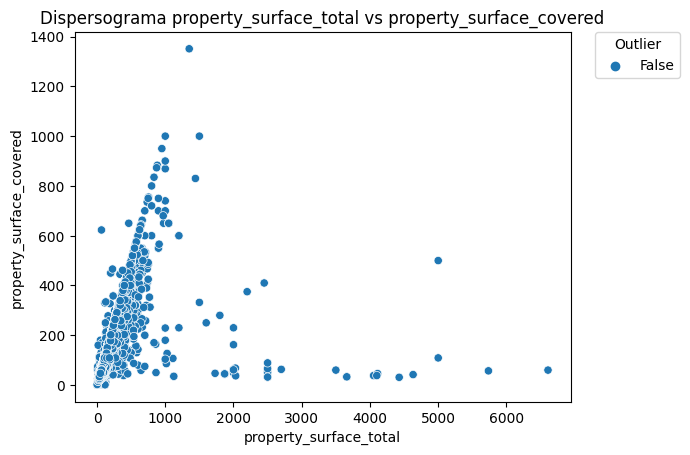

In [169]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_surfaces_train[mahalanobis_surfaces_train.mahalanobis < umbral], 'property_surface_total',
                   'property_surface_covered', umbral)

##### Analisis entre latitud y logitud de valores atipicos

In [170]:
mahalanobis_lat_long_train = calculate_mahalanobis_distance(ds_train, 'latitud', 'longitud')
mahalanobis_lat_long_test = calculate_mahalanobis_distance(ds_test, 'latitud', 'longitud')


In [171]:
#Defino umbral
umbral = 1  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
print(f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]

El mínimo según el umbral es de: 124.58024632840267


,latitud,longitud,mahalanobis
45535,-31.361412,-64.582919,818.114400
163309,-33.198250,-60.459339,124.580246
411053,-32.993973,-60.626941,158.442366
169096,-32.840363,-60.807869,189.092384
57097,-34.128668,-63.376624,242.699479
...,...,...,...
173667,-27.631190,-55.496357,2306.101260
324200,-38.940227,-68.073865,1798.849713
288009,-33.081030,-68.468140,1061.004035
84653,-41.168947,-71.439510,3686.821748


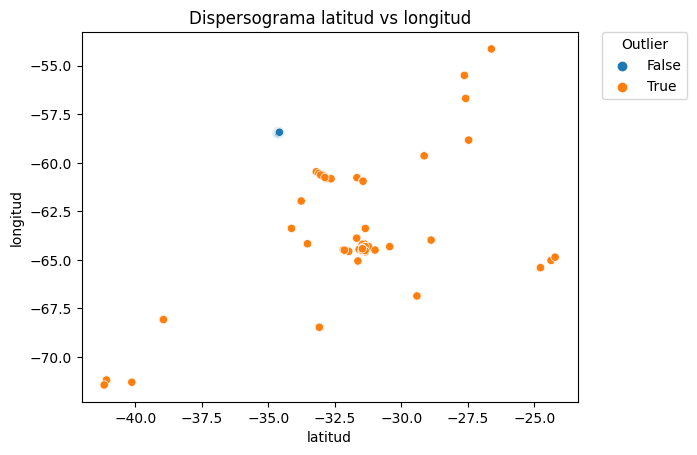

El grafico muestra 107 outliers
El mínimo según el umbral es de: 124.58024632840267


In [172]:
create_scattergram(mahalanobis_lat_long_train, 'latitud', 'longitud', umbral)
print(f"El grafico muestra {len(mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral])} outliers")
print(f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")

Dispersograma sin los outliers mencionados


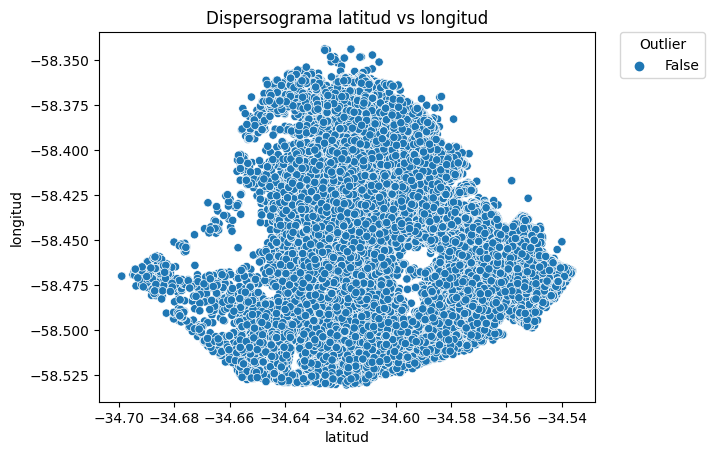

In [173]:
print("Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_lat_long_train[mahalanobis_lat_long_train.mahalanobis < umbral], 'latitud', 'longitud', umbral)

A simple vista se nota como el dispersograma cambió mucho y ahora se parece un poco a CABA. Notar además que tomamos como umbral 1 y sin embargo el valor mínimo de la distancia de estos outliers era de 106.

Como estos 1684 outliers tienen valores demasiado alejados del dataset, procederemos a borrarlos

In [174]:
# Train

indice_outlier_train = mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test


indice_outlier_test = mahalanobis_lat_long_test[mahalanobis_lat_long_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 107 registros en train
Se han eliminado: 233 registros en test


Ahora que eliminamos los outliers de latitud y longitud, eliminaremos los datos nulos de place_l3.

In [175]:
ds_train.place_l3.isna().sum()

46

In [176]:
ds_train.dropna(subset='place_l3', inplace=True)
ds_train.place_l3.isna().sum()

0

#### Analisis entre superficie total y precio

In [179]:
mahalanobis_price_surface_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total', 'property_price')
mahalanobis_price_surface_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total', 'property_price')

mahalanobis_price_surface_train['mahalanobis'].describe()

count    73808.000000
mean         2.256818
std         51.521608
min          0.000038
25%          0.121029
50%          0.252347
75%          0.408942
max       9010.896783
Name: mahalanobis, dtype: float64

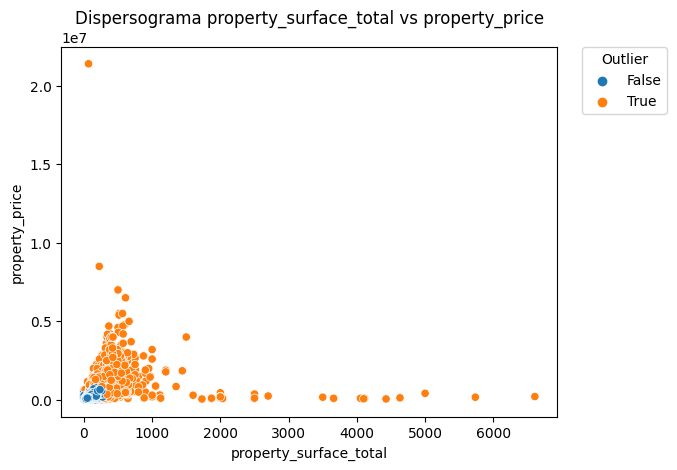

El grafico muestra 3229 outliers
El mínimo según el umbral es de: 5.001277831932336
Los outliers representan un 4.374864513331888%


In [180]:
umbral = 5
create_scattergram(mahalanobis_price_surface_train, 'property_surface_total', 'property_price', umbral)
print(f"El grafico muestra {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral])} outliers")
print(f"El mínimo según el umbral es de: {mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
print(f"Los outliers representan un {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]) * 100 / len(ds_train)}%")

<AxesSubplot: ylabel='mahalanobis'>

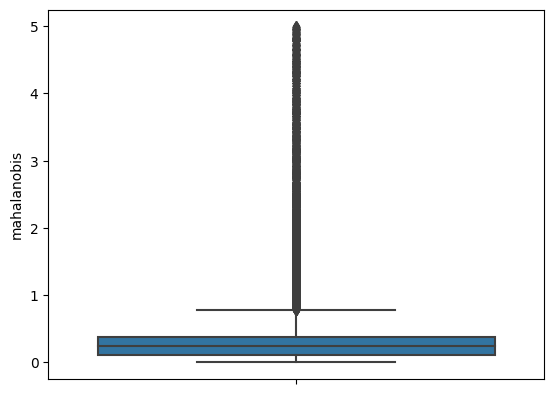

In [181]:
sns.boxplot(y=mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] < umbral].mahalanobis)

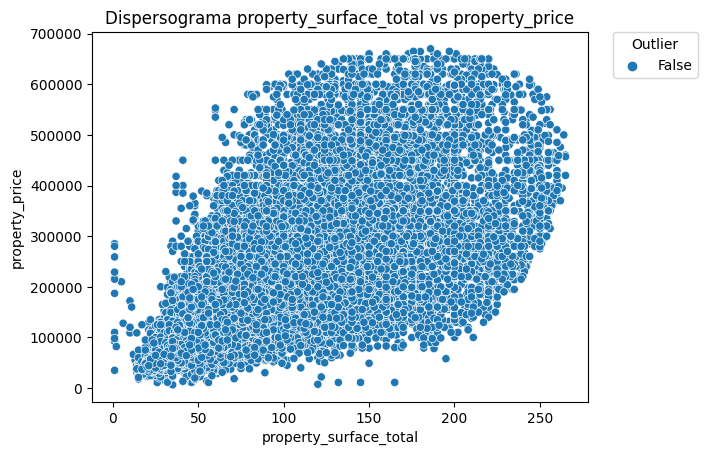

In [182]:
create_scattergram(mahalanobis_price_surface_train[mahalanobis_price_surface_train.mahalanobis < 3], 'property_surface_total',
                   'property_price', 3)

No llegamos a una buena conclusión para decidir el umbral por lo que tomaremos otro camino. Investigaremos acerca del precio por $m^2$ y realizaremos un análisis con el método de IQR sobre eso.

In [194]:
mahalanobis_price_surface_train['price_m2'] = mahalanobis_price_surface_train.property_price / mahalanobis_price_surface_train.property_surface_total

mahalanobis_price_surface_test['price_m2'] = mahalanobis_price_surface_test.property_price / mahalanobis_price_surface_test.property_surface_total

cantidad de datos del ds: 73808
outliers encontrados para los price_m2: 3561
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4292.207792207792, limite inf: 312.98701298701303


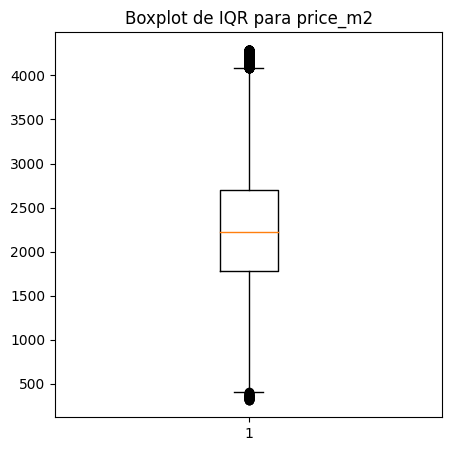

cantidad de datos del ds: 17669
outliers encontrados para los price_m2: 834
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4292.543859649123, limite inf: 331.140350877193


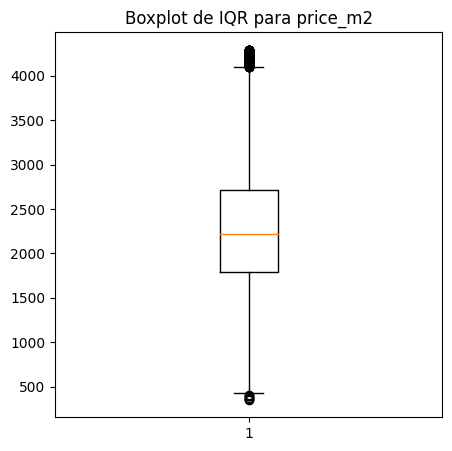

In [195]:
calculate_univariate_iqr(mahalanobis_price_surface_train['price_m2'], mahalanobis_price_surface_train)
calculate_univariate_iqr(mahalanobis_price_surface_test['price_m2'], mahalanobis_price_surface_test)

Hay 3494 registros en train por encima del límite superior en train (4.969138436157807)
Hay 67 registros en train por debajo del límite inferior en train  (0.09528685610262537)
Hay 810 registros en train por encima del límite superior en train (1.1519754245242768)
Hay 23 registros en train por debajo del límite inferior en train  (0.032710413288960946)


Text(0.5, 1.0, 'Distribución sin outliers')

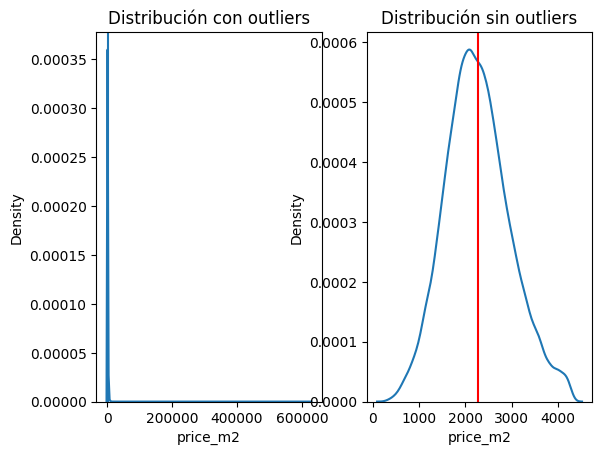

In [196]:
limites = boxplot_outliers_edges(mahalanobis_price_surface_train['price_m2'])
limite_inf = limites[0]
limite_sup = limites[1]
outliers_sup_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 > limite_sup)]
outliers_inf_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 < limite_inf)]

outliers_sup_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 > limite_sup)]
outliers_inf_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 < limite_inf)]

print(f"Hay {len(outliers_sup_price_m2)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2) * 100 / len(ds_train)})")
print(f"Hay {len(outliers_inf_price_m2)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2) * 100 / len(ds_train)})")

print(f"Hay {len(outliers_sup_price_m2_test)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_test) * 100 / len(ds_train)})")
print(f"Hay {len(outliers_inf_price_m2_test)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_test) * 100 / len(ds_train)})")

fig, axs = plt.subplots(ncols=2)

ds_plot = mahalanobis_price_surface_train[
    (mahalanobis_price_surface_train.price_m2 > limite_inf) & (mahalanobis_price_surface_train.price_m2 < limite_sup)]

sns.kdeplot(mahalanobis_price_surface_train.price_m2, ax=axs[0])
sns.kdeplot(ds_plot.price_m2, ax=axs[1])

axs[0].axvline(mahalanobis_price_surface_train.price_m2.mean())
axs[1].axvline(ds_plot.price_m2.mean(), color='red')

axs[0].set_title("Distribución con outliers")
axs[1].set_title("Distribución sin outliers")

Como podemos ver, quitar estos outliers nos acerca el grafico a algo parecido a una distribución normal. Procederemos a borrar tanto los outliers superiores como inferiores.

In [197]:
# Train

ds_train.drop(outliers_sup_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_sup_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_test)} registros en test")

KeyError: '[85778, 210927, 358280, 119398, 18663, 454397, 119003, 188481, 247106, 68078, 379515, 388417, 262193, 162087, 187155, 118047, 346105, 324966, 361811, 398124, 215315, 67639, 51855, 54591, 281341, 355389, 426178, 100950, 120685, 160126, 369267, 48227, 82466, 256245, 323906, 168365, 237575, 431115, 360253, 24585, 145681, 340124, 173775, 178428, 392501, 46798, 418603, 67545, 76928, 143358, 332554, 115501, 209282, 228976, 193831, 53450, 422284, 450343, 290460, 256278, 142360, 288978, 208149, 173905, 281404, 337357, 229100, 180170, 236968, 196264, 349020, 81899, 85391, 216868, 363393, 206132, 366171, 186113, 201916, 300637, 422278, 440708, 127490, 114924, 263966, 316616, 323981, 320487, 350901, 316354, 365509, 46472, 382621, 155582, 271148, 179923, 107983, 444270, 450418, 273663, 242140, 434226, 231153, 447387, 361726, 373827, 365535, 355595, 200761, 83710, 225129, 406454, 129053, 177790, 327461, 131345, 164409, 324285, 133275, 372605, 155046, 450295, 206666, 67641, 9708, 180164, 261206, 278795, 260348, 423309, 327368, 10896, 450350, 133841, 131361, 381412, 273514, 110804, 385457, 154534, 52252, 290667, 95214, 422611, 208463, 135968, 87803, 204059, 444025, 102755, 208459, 214942, 165071, 84164, 218647, 409484, 397227, 79153, 88128, 243296, 154488, 257979, 163100, 138391, 438512, 103648, 412710, 153293, 152102, 385452, 408636, 302890, 165399, 124552, 111180, 150487, 259703, 445602, 335932, 47520, 365334, 146132, 32073, 354151, 80756, 26433, 321611, 51470, 325957, 329665, 165262, 128821, 127492, 107241, 432650, 42001, 165413, 443759, 319304, 363415, 124397, 185300, 167224, 237288, 167909, 146130, 373837, 223846, 433791, 306056, 89093, 72340, 372646, 263979, 324615, 344813, 412164, 392656, 163103, 167063, 459464, 73443, 77407, 362109, 42013, 298189, 376996, 186126, 119539, 298865, 358219, 131400, 168530, 334734, 126453, 241348, 422045, 450131, 373784, 274575, 213741, 144247, 5192, 293832, 176283, 203753, 458459, 415284, 235520, 420894, 82461, 320920, 390994, 39416, 235364, 4804, 115502, 223194, 329610, 157477, 362479, 9874, 243514, 168527, 149344, 60295, 299099, 320524, 298185, 152075, 264175, 264603, 315529, 82230, 216475, 404508, 413700, 89200, 435974, 271024, 67640, 168560, 329943, 422072, 84077, 115495, 89970, 177741, 260343, 33564, 128764, 170903, 324294, 408146, 341798, 228953, 352417, 314458, 115503, 26434, 178434, 180159, 243288, 120909, 178429, 25799, 438077, 117461, 459445, 361906, 3980, 420899, 113589, 227134, 258392, 283657, 315558, 76665, 225532, 13577, 284478, 82038, 409468, 275012, 313226, 81799, 330167, 82474, 157212, 105472, 96222, 455194, 200599, 376500, 4816, 278804, 323746, 68785, 32065, 119004, 115491, 458424, 358327, 104062, 450404, 441177, 342069, 258282, 243503, 155763, 147601, 139073, 426181, 401317, 376983, 283186, 269200, 12693, 433713, 149108, 385834, 361845, 319308, 220942, 113828, 20611, 426205, 363413, 408108, 330207, 171579, 258323, 343369, 131341, 19566, 389812, 442610, 204300, 203823, 313194, 248199, 227274, 329656, 129764, 107980, 154498, 126131, 46953, 57548, 306832, 439345, 163965, 206669, 280375, 174313, 50998, 118042, 170996, 232902, 248208, 349408, 104065, 191502, 211081, 340121, 379470, 457887, 306834, 128979, 146131, 25904, 356571, 211096, 373985, 361820, 409276, 256281, 121926, 397756, 285761, 433784, 457769, 455188, 92710, 174567, 137260, 313601, 365530, 312385, 81898, 165171, 22776, 363388, 401944, 441185, 67338, 7373, 361915, 99233, 89707, 358303, 263956, 459441, 290921, 193509, 146073, 390368, 262020, 59681, 227159, 443776, 262003, 409495, 83799, 155586, 95564, 93252, 94302, 379777, 296054, 210196, 30481, 256284, 21176, 212391, 338168, 225007, 408502, 444286, 50924, 41980, 59966, 173881, 133840, 269198, 347069, 262318, 155571, 408289, 54064, 330114, 246580, 227235, 299675, 361789, 402907, 355431, 157126, 310781, 392659, 306339, 271145, 270364, 324650, 388663, 114792, 385461, 368568, 13583, 398073, 362190, 256280, 81794, 99431, 385838, 114811, 282335, 320526, 215683, 331760, 301217, 59959, 83809, 147629, 14133, 366219, 139325, 371605, 406216, 262266, 33563, 446694, 410024, 386513, 196645, 62863, 22770, 414940, 206672, 361784, 203147, 358331, 207158, 28997, 298024, 32062, 440815, 320910, 406289, 279818, 328231, 65410, 416034, 324616, 361808, 439021, 82076, 155040, 410186, 405037, 296055, 392475, 243290, 241401, 368578, 197129, 290522, 345988, 236173, 72680, 207379, 171001, 208177, 172814, 260194, 101102, 349409, 324739, 209809, 391505, 115487, 257056, 345155, 370062, 155587, 397543, 252976, 62900, 390996, 379401, 270599, 227841, 361917, 254812, 98094, 57466, 252714, 258385, 115484, 235107, 284514, 306143, 44276, 273867, 332805, 361783, 7299, 399432, 74644, 190068, 111035, 7329, 445308, 53513, 24501, 337349, 314381, 144196, 41742, 10189, 152408, 149195, 215589, 376643, 227273, 408117, 114932, 113560, 196562, 408410, 440711, 174296, 382454, 94327, 361926, 261104, 134987, 221487, 390362, 25914, 83841, 373805, 310345, 365404, 97799, 303002, 273577, 40880, 308010, 116194, 329936, 439032, 165091, 273593, 113552, 102783, 265098, 439031, 261209, 33527, 31298, 362120, 167715, 86677, 76517, 126395, 105299, 27566, 59140, 162022, 162096, 2549, 365490, 373838, 316329, 3990, 135566, 275643, 168529, 281867, 92964, 113622, 366678, 99420, 171574, 17232, 69414, 142357, 433772, 76929, 382451, 401398, 102775, 377874, 243294, 32453, 377444, 34416, 53499, 459729, 84074, 69664, 33571, 446698, 440677, 273508, 162049, 328233, 341718, 39575, 159717, 33494, 254518, 365501, 95222, 388497, 295624, 411148, 311210, 438617, 171568, 440900, 313182, 62908, 42003, 107692, 326358, 261210, 304080, 135944, 179989, 360025, 381250, 288881, 48192, 344841, 225131, 26017, 196629, 173862, 313156, 341825, 206114, 69641, 258360, 259715, 206664, 243297, 145852, 230667, 442600, 392511, 329606, 377491, 206121, 352717, 23129, 116161, 273587, 39347, 401446, 168528, 376992, 85797, 312325, 38480, 272852, 167639, 376997, 207250, 115108, 290571, 256274, 303247, 82469, 2850, 345162, 243285, 345159, 51576, 200655, 182382, 178046, 99300, 64065, 54068, 182014, 313252, 321097, 315310, 244828, 271146, 337724, 171298, 114820, 228229, 28111, 66867, 99912, 399788, 306188, 281007, 319144, 85809, 104075, 157377, 202798, 95227, 333979, 223920, 180162, 7869, 111065, 229174, 139082, 158163, 119497, 390940, 36435, 367726, 238657, 10905, 251391, 199160, 319049, 300018, 120655, 455190, 398766, 446078, 397564, 361824, 15689, 187179, 170987, 406273, 296788, 115482, 455200, 404447, 242566, 361880, 244826, 9694, 159718, 94550, 171559, 365526, 124550, 72495, 434314, 173894, 60073, 35452, 176177, 218430, 229377, 158371, 321607, 154851, 70658, 105379, 447495, 392921, 433778, 353128, 41540, 406256, 329676, 165404, 365459, 256069, 306529, 329669, 403242, 278731, 133246, 207160, 336496, 370403, 35468, 320502, 116252, 356769, 272331, 382388, 203299, 82464, 226234, 209292, 457904, 362146, 248430, 218495, 40792, 54574, 256027, 273738, 254417, 203772, 378188, 431116, 310177, 134377, 262323, 85380, 137472, 389984, 381260, 440894, 167255, 9450, 366687, 306838, 226305, 273748, 324610, 323001, 215510, 225498, 147595, 216537, 121258, 186129, 197958, 373923, 85358, 313248, 233184, 206413, 64062, 39582, 26432, 108675, 296049, 200745, 233741, 31422, 406857, 368764, 182781, 136459, 306524, 58397, 409293, 329619, 167219, 19514, 164183, 416033, 416032, 163941, 279819, 267996, 54581, 306154, 38245, 282317, 149478, 104070, 186412, 208466, 370190, 73721, 6350, 117562, 234214, 104055, 179925, 131949, 17959, 447636, 126670, 118767, 121016, 319673, 187690, 14957, 395062, 72686, 179735, 222070, 240870, 295352, 382461, 116183, 223158, 272797, 85318, 373989, 370086, 144155, 381405, 247117, 332291, 227992, 401333, 53560, 390366, 262291, 152082, 442367, 381313, 194213, 185433, 223854, 4797, 74438, 373762, 361838, 411156, 413637, 340120, 184200, 342075, 10999, 381243, 329921, 201919, 206682, 204306, 406861, 53982, 358591, 225135, 235516, 444292, 306851, 347782, 89158, 84349, 110832, 53464, 20645, 197962, 441176, 368777, 382623, 154544, 111999, 438873, 349669, 215340, 259131, 212623, 79478, 69600, 162221, 248197, 158255, 233181, 120688, 256347, 145697, 165064, 315403, 168558, 123765, 226811, 107368, 121162, 260201, 66499, 30218, 206675, 317211, 49876, 460002, 360040, 288845, 235076, 191631, 141894, 172396, 239977, 325907, 227275, 318922, 306116, 285758, 372634, 399649, 324295, 365523, 230808, 171570, 349705, 378277, 168523, 255896, 24339, 361898, 442609, 408133, 304211, 385468, 51574, 218641, 60788, 114810, 272121, 438651, 7557, 23445, 110841, 223175, 200758, 81922, 450340, 405733, 20625, 57744, 139739, 324920, 321616, 291015, 85398, 148025, 87819, 306521, 40985, 9398, 17960, 435972, 168521, 264185, 227276, 433701, 315299, 125902, 446888, 146137, 144962, 2849, 302731, 42084, 169930, 174287, 190549, 444276, 25727, 386518, 312695, 154520, 16794, 89476, 25790, 386528, 445605, 445154, 228232, 243075, 267973, 210960, 275240, 363391, 168531, 92016, 189192, 115211, 89199, 79028, 115475, 146123, 373851, 202076, 265220, 154427, 401938, 352561, 147385, 215681, 146084, 392679, 147638, 324136, 81861, 346104, 208150, 235521, 16909, 17235, 160129, 147634, 368780, 149060, 313595, 321602, 368586, 382447, 16776, 206677, 107370, 256331, 366256, 252572, 79191, 139742, 238252, 390950, 42792, 361738, 289087, 229360, 252711, 32068, 17234, 397632, 215678, 17021, 438626, 306158, 216737, 437762, 169914, 19984, 189819, 263864, 408094, 14557, 397225, 115471, 1212, 35470, 270200, 246571, 287148, 303262, 57545, 144095, 60304, 124825, 131948, 373839, 300710, 57558, 85810, 89096, 397770, 345156, 135977, 324609, 345972, 251351, 71274, 147404, 199156, 22814, 93258, 321620, 366671, 361814, 180165, 306186, 157219, 79493, 113461, 358292, 119390, 7319, 54987, 233687, 9423, 346203, 218416, 5184, 230646, 247108, 313594, 443773, 171018, 173901, 177829, 87767, 213733, 358350, 350693, 210922, 206261, 397529, 312321, 382286, 442360, 277775, 343939, 233747, 319307, 101152, 368567, 406591, 149074, 367733, 189611, 399912, 412409, 164162, 389852, 6096, 355393, 361785, 284868, 105603, 93260, 141010, 223857, 218643, 361754, 65609, 340125, 167975, 302736, 274850, 366192, 3828, 115076, 79485, 441175, 185199, 361758, 98959, 147351, 207539, 81816, 140746, 385681, 59781, 319612, 311274, 182385, 53702, 107661, 40665, 239981, 353135, 58395, 154950, 6088, 376989, 131374, 440668, 7563, 156423, 159727, 330838, 390989, 411159, 216867, 252592, 115490, 161981, 388454, 137477, 264528, 27601, 162017, 363250, 76736, 99422, 52258, 24367, 3986, 436725, 381421, 167905, 135558, 194222, 408083, 146124, 376501, 159322, 227152, 179698, 85754, 323976, 45384, 200639, 271993, 124514, 281829, 247124, 15156, 63747, 194220, 327661, 256982, 330164, 329689, 304210, 44109, 193550, 361471, 445604, 101088, 425352, 6240, 40668, 293091, 406267, 111515, 76552, 49454, 367720, 416040, 397502, 119436, 279024, 391247, 176185, 98095, 233679, 115489, 299017, 185160, 270207, 242221, 133842, 10187, 361848, 228191, 215317, 345906, 320433, 223154, 329623, 236138, 55176, 270596, 242572, 202847, 6134, 281814, 336318, 376745, 99240, 194370, 42000, 233759, 362188, 196279, 458451, 241506, 119270, 301408, 264609, 313228, 459392, 267068, 3988, 163956, 380078, 310779, 243834, 64063, 256813, 186777, 310778, 203759, 264604, 373803, 170460, 233751, 355464, 157094, 346108, 314452, 271164, 185193, 171575, 228937, 361805, 131359, 332316, 386511, 226524, 306048, 117825, 447711, 174538, 279750, 405034, 398163, 458455, 332354, 145645, 361699, 94323, 257899, 402836, 431124, 81904, 366208, 148021, 406779, 84063, 302792, 174566, 363416, 227920, 355570, 247128, 248082, 377901, 200617, 219775, 362128, 194306, 194343, 168526, 434558, 272850, 330204, 41895, 243473, 203141, 368609, 215295, 156102, 35451, 436058, 173871, 115478, 14989, 341488, 200996, 365401, 194349, 411230, 300990, 361913, 144085, 370413, 85806, 139329, 329596, 382460, 438002, 168562, 287441, 135004, 171560, 219777, 115474, 102713, 319298, 366698, 41192, 141919, 173763, 178044, 227907, 284336, 94726, 140848, 210367, 80520, 121271, 27530, 104068, 63673, 96302, 310329, 344942, 4836, 436626, 44426, 188247, 315317, 32220, 121109, 189692, 349392, 182388, 73526, 440614, 124540, 368487, 56215, 54052, 162033, 19975, 114247, 339520, 46439, 93239, 409088, 376480, 397208, 225140, 329926, 279203, 44221, 315298, 116447, 313598, 150484, 444287, 179738, 288960, 72285, 59796, 115500, 163973, 352759, 303005, 256259, 368771, 139320, 116275, 458655, 168516, 72330, 423178, 131634, 306543, 306866, 435966, 247123, 328239, 274581, 114922, 354487, 162062, 139730, 116325, 48207, 324138, 296624, 290552, 426215, 85796, 155543, 373840, 238663, 143370, 459404, 133464, 365374, 450431, 459997, 9448, 329933, 165074, 363414, 84070, 327206, 181732, 146136, 443772, 93246, 229178, 384585, 215308, 137938, 114782, 176575, 46465, 410026, 284908, 344013, 152054, 368964, 272034, 209472, 420807, 629, 349415, 391148, 240472, 39862, 97976, 425409, 184154, 263970, 147625, 99427, 218413, 47512, 43184, 229365, 36454, 362488, 77666, 113576, 207381, 361407, 422010, 196293, 404460, 327447, 185042, 243282, 89102, 450417, 240523, 405031, 145827, 327682, 379467, 272124, 137931, 86685, 259670, 330839, 56334, 131357, 36445, 24506, 177843, 382405, 444249, 157125, 99433, 334708, 352529, 291956, 19681, 296795, 125911, 434199, 168511, 215495, 390983, 390946, 238362, 362137, 358992, 211475, 94520, 190073, 216866, 399768, 218652, 376636, 96316, 103808, 162019, 295617, 206683, 86687, 85395, 365338, 146122, 59167, 34454, 252792, 381258, 377474, 336499, 329630, 287703, 229371, 392417, 431108, 143278, 293088, 37336, 44033, 377488, 300993, 46378, 279200, 299973, 254378, 35472, 31293, 177818, 10193, 42004, 372645, 261207, 388858, 377454, 130249, 131394, 114847, 254809, 141906, 390372, 312291, 361911, 352536, 126457, 4956, 54062, 43847, 115483, 327638, 406324, 53716, 223156, 124704, 262011, 220498, 68115, 321619, 362160, 26427, 264462, 319254, 170458, 176576, 174314, 293547, 342071, 457814, 200998, 270354, 60786, 106750, 190072, 121906, 10908, 353142, 438618, 10854, 263947, 191864, 440810, 336152, 193391, 437708, 302786, 374119, 129789, 206168, 260642, 365394, 12365, 223873, 377470, 409472, 457708, 444257, 365370, 409286, 79022, 304057, 6455, 150822, 168546, 56143, 227148, 143276, 275656, 287134, 147368, 279811, 100422, 329836, 406493, 365532, 168517, 443119, 68786, 327666, 361846, 133836, 345934, 73383, 226515, 300834, 39381, 406287, 140849, 392917, 367723, 23012, 119437, 53557, 324832, 444290, 397683, 14966, 181733, 115472, 356582, 105101, 248205, 214911, 273479, 235519, 73549, 112311, 104081, 360053, 230644, 388599, 256317, 401390, 181803, 459435, 397486, 408105, 114169, 177725, 327199, 273859, 254818, 278808, 168542, 327446, 167282, 176050, 98906, 97767, 362466, 385840, 160119, 218500, 238355, 273669, 381286, 196248, 243298, 69670, 209285, 107291, 402876, 69667, 186813, 248105, 377436, 405728, 73396, 200847, 148033, 94301, 4852, 344017, 200552, 31114, 260377, 406579, 319554, 33497, 45390, 229376, 361403, 192076, 131375, 341485, 186107, 54985, 262170, 177724, 390003, 353102, 92045, 363390, 254428, 119406, 201679, 347783, 427106, 434553, 306126, 94547, 361940, 317771, 349428, 9697, 140363, 390915, 447714, 285104, 196401, 340119, 139187, 135557, 167328, 31410, 85749, 211088, 152098, 262103, 228934, 82467, 53507, 261200, 257129, 303255, 235193, 46797, 228582, 385841, 373998, 115485, 315304, 215294, 365497, 293254, 180134, 271044, 171576, 103793, 105167, 178910, 162066, 313220, 302889, 459771, 420448, 376991, 9422, 85369, 59166, 288987, 273529, 438650, 147391, 391147, 207188, 23027, 380068, 240004, 420905, 212768, 133844, 268001, 153193, 54609, 174139, 361411, 388484, 373804, 114930, 72301, 196625, 373817, 455202, 41408, 318147, 363384, 85410, 63761, 361874, 301479, 299727, 14859, 135016, 121257, 288934, 273865, 81800, 41866, 273500, 59742, 367727, 423173, 411516, 361843, 392657, 275647, 398589, 185082, 326709, 49707, 377427, 115486, 274594, 252968, 361742, 84094, 119221, 65761, 168524, 196630, 167067, 167301, 35824, 140674, 401381, 365465, 100783, 114791, 119540, 77684, 329904, 272015, 176569, 143810, 31151, 368781, 377487, 277782, 31991, 304032, 233073, 289125, 263942, 450342, 227277, 243113, 278742, 242962, 56449, 177107, 85406, 387183, 218650, 173878, 142361, 363389, 361936, 313599, 379483, 341713, 323887, 2844, 65330, 228899, 273682, 343741, 386237, 76667, 85366, 401361, 147371, 285125, 116440, 306135, 125912, 379473, 96284, 229369, 9683, 365410, 139172, 9306, 391517, 84342, 306836, 89204, 434557, 173931, 222131, 271226, 455203, 117689, 123772, 194234, 304212, 240524, 443779, 246724, 258395, 450411, 349704, 228181, 324326, 342081, 157478, 420458, 46437, 265293, 371230, 149141, 92791, 146127, 366227, 320490, 358914, 125901, 372663, 131390, 51856, 363411, 270201, 203792, 189818, 440665, 153201, 133447, 227138, 320881, 270777, 46461, 139737, 434066, 167237, 51857, 328236, 92414, 96204, 181823, 102764, 203783, 171297, 160010, 363397, 433771, 59804, 308789, 210383, 326711, 385846, 441178, 379668, 336328, 181829, 89481, 69614, 360078, 149198, 295211, 188248, 157146, 377437, 239955, 46277, 81889, 159724, 172461, 304038, 257982, 267063, 111944, 312570, 95218, 370056, 252713, 326165, 442111, 284995, 319018, 39859, 243145, 406868, 268362, 130247, 76522, 131940, 208347, 148020, 350908, 302707, 329664, 243284, 447341, 339540, 321610, 420897, 243515, 254386, 446115, 376484, 99426, 382895, 81919, 297973, 117580, 330812, 427177, 387181, 81853, 392514, 157345, 260639, 334445, 115481, 5190, 452247, 180169, 77686, 446265, 31460, 9460, 170465, 191529, 360429, 158632, 423725, 157469, 41389, 129281, 341438, 358991, 244694, 193549, 356611, 436247, 375921, 7902, 277785, 354486, 150595, 327442, 6128, 98090, 25792, 442025, 106391, 157223, 409215, 178442, 174569, 306127, 287160, 341543, 85986, 81871, 413786, 57743, 20930, 331020, 106906, 345157, 328238, 235062, 3981, 230630, 313600, 10983, 303257, 133845, 37191, 35457, 98989, 96271, 167089, 321609, 53470, 320916, 66479, 165397, 114835, 51301, 72275, 41018, 280855, 62428, 80496, 149725, 131377, 443111, 113567, 13882, 89185, 33245, 326351, 120309, 317363, 355749, 163960, 136969, 435985, 54063, 338931, 30051, 68373, 229099, 82393, 281854, 219541, 201004, 334005, 278729, 38482, 397653, 397198, 285713, 26438, 363088, 304077, 84154, 390980, 358593, 79367, 164414, 289126, 226481, 102805, 52111, 158253, 181800, 319295, 197027, 233675, 51858, 67388, 131376, 376657, 434555, 277389, 163108, 443116, 228226, 139152, 117545, 368555, 318879, 55333, 442306, 116444, 287698, 97777, 105195, 120689, 73402, 72332, 31978, 342084, 283937, 74449, 3754, 77669, 277481, 314439, 365359, 388584, 69644, 227161, 391512, 248211, 45398, 115488, 99429, 363398, 310457, 168513, 40812, 375919, 73519, 242577, 114929, 273869, 76939, 143216, 414049, 440812, 353133, 196635, 26392, 84343, 236323, 256170, 282723, 187700, 260404, 168550, 352760, 114789, 74885, 452302, 365485, 114927, 284889, 363392, 267888, 301218, 133274, 67393, 108977, 119533, 241508, 202845, 148019, 319012, 405730, 406866, 77570, 451358, 143367, 326352, 159823, 115504, 102797, 296909, 119541, 33506, 123296, 406328, 223150, 153138, 69650, 341517, 444254, 372581, 11079, 9457, 153498, 100794, 313602, 10984, 130250, 117468, 349424, 204301, 377922, 401418, 147597, 106527, 215487, 447499, 345976, 264302, 274593, 110856, 268908, 207190, 188166, 121163, 10902, 235014, 20927, 228984, 306047, 358711, 38145, 145859, 48640, 235523, 199507, 281882, 275653, 115496, 17239, 376990, 143286, 11205, 279732, 298889, 67642, 376543, 201001, 117962, 272393, 108982, 342090, 162072, 142009, 362180, 390947, 53701, 440917, 409481, 115479, 352753, 59145, 382279, 391509, 115112, 447963, 344020, 248201, 375920, 346380, 455201, 418602, 143225, 84340, 279788, 58405, 382830, 44102, 406475, 408121, 342070, 79496, 302701, 121256, 341797, 115468, 172466, 7882, 459364, 361938, 162598, 15165, 173875, 104077, 337581, 297909, 288970, 24345, 120142, 27792, 360435, 390385, 114649, 392662, 318148, 185026, 293234, 298828, 207252, 362469, 381744, 439352, 41935, 256377, 390928, 81854, 227791, 60785, 289484, 306128, 338169, 9858, 271156, 196638, 150612, 177870, 290773, 252577, 397228, 296621, 361704, 443748, 62909, 345946, 423193, 4845, 318910, 79495, 389088, 54595, 329600, 86699, 186873, 3576, 89092, 139735, 361890, 410030, 63053, 442587, 315475, 183480, 189675, 377445, 92054, 145699, 76545, 316286, 218657, 118755, 239949, 167115, 443115, 72329, 271025, 204058, 233025, 147297, 278799, 24304, 392644, 211165, 444258, 307470, 99423, 337577, 79933, 310168, 152410, 131283, 174575, 277773, 380071, 168534, 436033, 214093, 107218, 444273, 315303, 94294, 135147, 408131, 242568, 304676, 258279, 206076, 399770, 282372, 341701, 263940, 401950, 179987, 120761, 212499, 320477, 46463, 423724, 397719, 162592, 423727, 315282, 345944, 291957, 394331, 46440, 330112, 52385, 158252, 196628, 270598, 324967, 459292, 345983, 288902, 324743, 296591, 444275, 340131, 119614, 57708, 398050, 4751, 158637, 388473, 248127, 183040, 401780, 86682, 206161, 445395, 446080, 392646, 53422, 82225, 329547, 326356, 228966, 150825, 175930, 173909, 71520, 457810, 72279, 444252, 272387, 9493, 285763, 17236, 263992, 171578, 49520, 149724, 85779, 273861, 273871, 329601, 67604, 358601, 57884, 41664, 226880, 133839, 280376, 227231, 209284, 223918, 355598, 28110, 64026, 241514, 84346, 154831, 441036, 119386, 316135, 342083, 352557, 179712, 313346, 26047, 85376, 94305, 361847, 238433, 361909, 111090, 25816, 360246, 259030, 388479, 313592, 156777, 373824, 162091, 41987, 31164, 129282, 170455, 317361, 362133, 10192, 401366, 149105, 328794, 415484, 381807, 31992, 365319, 178121, 178142, 329810, 377490, 442066, 345984, 272129, 394222, 233743, 268652, 185034, 405043, 69579, 173885, 196243, 391434, 325924, 366684, 206130, 104071, 135561, 41022, 120684, 318145, 137930, 83792, 229380, 163932, 246703, 275659, 441184, 81864, 95216, 358571, 342091, 144099, 412303, 344839, 368566, 73719, 41975, 337106, 40865, 150496, 93261, 62865, 167656, 425496, 189803, 218651, 158385, 270769, 326158, 108505, 443145, 320459, 171577, 28832, 349430, 438, 361892, 18652, 273532, 361844, 329684, 404708, 392918, 10909, 360049, 73724, 72291, 54342, 386924, 134992, 69473, 355474, 256239, 81902, 380074, 162239, 431128, 168536, 383309, 227219, 190609, 1210, 119433, 361839, 239990, 179169, 181748, 386487, 344018, 390127, 117561, 27592, 257152, 401707, 141868, 17237, 79149, 243127, 436254, 278726, 254429, 362182, 382853, 89103, 381288, 290556, 436067, 240519, 215293, 264311, 168533, 287704, 310184, 411218, 114845, 147427, 206279, 208462, 45391, 392474, 54903, 116319, 9383, 443766, 108670, 336156, 85363, 110818, 92470, 411210, 139328, 165405, 168547, 275673, 439027, 329818, 291773, 228956, 399766, 304081, 272010, 360440, 217551, 2404, 157479, 134949, 328227, 401941, 459763, 409482, 177849, 365444, 356587, 236338, 47508, 360037, 63731, 224095, 444255, 115498, 250664, 173924, 366237, 190033, 74323, 271198, 306388, 380073, 382878, 365307, 188117, 46471, 301363, 134274, 163959, 227156, 431110, 79025, 434049, 41899, 184110, 196417, 306123, 268192, 107244, 151893, 200647, 259098, 39420, 72324, 314430, 71240, 162036, 68117, 59962, 94326, 82473, 433826, 135564, 23722, 84055, 346188, 372800, 48103, 235096, 65501, 171294, 297141, 150824, 228967, 206673, 222409, 21153, 129861, 457788, 392674, 365309, 26155, 459999, 100897, 41944, 366226, 55031, 135569, 347784, 188859, 368969, 437767, 306121, 46467, 167333, 12188, 355837, 13282, 257077, 147365, 94299, 204034, 28105, 149728, 55181, 296050, 354490, 115469, 293841, 279812, 171296, 97762, 329602, 361882, 270352, 313239, 289261, 273576, 267859, 384650, 200582, 7898, 35471, 194372, 370231, 360433, 252960, 450416, 440684, 39546, 17011, 235082, 341807, 390367, 284571, 46790, 3762, 260779, 260620, 219778, 22703, 18111, 296053, 167292, 347261, 443137, 324323, 329929, 311222, 220971, 76503, 107217, 165411, 41683, 100811, 377429, 116322, 315294, 392471, 185436, 258317, 397760, 2604, 153160, 120905, 49534, 76555, 92048, 322790, 234153, 369275, 196507, 268772, 4935, 53537, 343605, 96767, 139138, 76466, 48059, 30180, 410018, 119639, 4759, 61968, 344011, 200994, 147609, 227280, 313597, 51934, 168510, 361405, 210382, 12690, 149730, 210198, 42078, 349017, 261204, 246569, 319026, 231158, 200734, 162596, 273741, 1208, 285215, 143623, 196296, 242579, 382879, 409271, 13883, 84341, 235070, 229006, 40791, 177800, 190074, 460005, 70675, 19976, 431129, 324256, 392916, 26441, 379663, 48039, 92052, 385664, 413680, 41746, 352492, 441181, 450378, 24303, 374115, 449546, 180515, 361414, 116254, 287066, 223176, 361840, 361929, 155869, 443775, 317364, 329692, 56973, 323209, 174906, 51859, 171529, 264607, 333922, 83726, 258361, 244623, 413989, 423196, 290501, 388458, 101151, 49523, 60063, 148579, 381291, 11618, 9472, 178427, 365511, 155542, 27976, 337309, 115492, 15589, 387414, 168512, 392525, 233756, 116175, 388855, 365271, 120523, 408299, 384415, 15581, 329615, 326172, 397229, 436723, 382403, 436711, 117525, 246572, 102751, 151909, 32412, 365393, 240815, 56744, 39396, 44273, 180380, 373094, 13276, 79050, 188810, 189868, 325925, 69423, 291767, 350907, 287118, 143274, 119339, 143621, 320504, 441180, 426088, 288906, 196626, 41898, 352559, 172382, 208461, 177869, 442124, 137942, 115150, 373832, 97764, 315404, 423182, 57541, 131938, 436727, 224099, 42494, 44431, 410028, 390984, 165018, 173914, 196641, 196392, 319015, 67612, 342072, 84087, 403370, 158160, 129763, 102774, 376469, 256833, 241511, 77580, 118923, 104090, 388856, 408098, 157231, 82214, 28109, 275677, 10472, 297899, 4826, 168545, 345158, 438642, 293098, 414690, 67381, 86678, 216871, 362464, 372667, 365464, 370884, 405040, 268357, 210381, 110824, 264151, 306210, 408020, 11198, 171195, 422622, 368565, 368497, 299096, 273866, 173843, 399779, 26436, 11199, 114928, 186875, 330887, 71323, 229000, 135976, 296042, 209277, 455191, 189694, 300472, 174570, 121164, 139333, 114157, 131946, 426165, 446071, 227137, 370412, 298888, 157343, 84088, 358989, 82044, 147644, 344022, 139729, 444278, 119435, 365270, 187171, 173838, 321601, 442017, 7896, 373791, 60062, 269199, 354368, 408574, 220772, 181740, 459413, 436709, 459734, 407395, 123297, 146133, 277456, 287188, 372787, 25916, 293251, 41424, 87795, 306141, 420413, 178445, 104082, 459986, 191644, 263957, 5094, 285759, 165022, 233673, 86028, 31300, 422136, 111507, 376635, 1214, 26192, 438584, 7331, 149367, 362189, 321111, 68106, 434068, 306831, 102837, 442050, 24504, 260791, 265734, 277343, 10991, 215674, 397480, 422626, 313426, 259101, 246506, 316632, 139466, 285169, 164165, 256418, 178431, 9706, 295729, 150513, 246528, 320514, 278801, 356601, 374000, 63856, 15124, 361902, 16807, 288933, 388494, 329842, 260633, 416036, 408633, 93251, 346334, 115480, 451394, 355027, 339519, 278827, 228970, 310776, 179017, 146128, 104074, 339506, 361770, 86686, 404693, 215531, 223898, 445198, 9682, 367447, 268998, 221227, 373091, 104061, 162100, 386936, 197451, 408268, 80480, 64028, 312666, 114806, 365486, 117725, 457784, 349337, 365391, 111171, 298962, 182782, 345932, 319601, 324590, 274853, 144758, 41833, 361741, 167175] not found in axis'

In [ ]:
# Train

ds_train.drop(outliers_inf_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_inf_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_test)} registros en test")

#### LOF

In [ ]:
def create_scores_based_on_training(dataset, col1, col2):
    #Conjunto de entrenamiento
    dataset = dataset[~(dataset[f'{col1}'].isna())]  # que hago con los NAN? Para la preddicion necesito sacarlos.
    dataset = dataset[~(dataset[f'{col2}'].isna())]

    X = dataset[[f'{col1}', f'{col2}']].values

    #Creo el clasificador
    clf = LocalOutlierFactor(n_neighbors=20)

    #Genero prediccion
    y_pred = clf.fit_predict(X)

    #Guardo los scores
    dataset['scores'] = clf.negative_outlier_factor_

    return dataset.copy()

In [ ]:
def create_dispersion_diagram(dataset, col1, col2):
    new_lof_ds = dataset.copy()
    new_lof_ds['target'] = 0
    new_col_ds = new_lof_ds
    new_col_ds[[f'{col1}', f'{col2}', 'target']]

    sns.scatterplot(x=new_col_ds[f'{col1}'], y=new_col_ds[f'{col2}'], hue=new_col_ds['target'])
    plt.title(f'Diagrama de Dispersión {col1} vs {col2}')
    plt.show()
    return new_lof_ds

In [ ]:
def create_lof_graph(dataset, col1, col2):
    #Calculo radio para plotear score
    radius = (dataset.scores.max() - dataset.scores) / (dataset.scores.max() - dataset.scores.min())

    #Grafico LOF
    plt.figure(figsize=(10, 10))
    plt.title("Local Outlier Factor (LOF)")
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, edgecolor='grey', s=30, label='Datos',
                facecolors='none')
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, s=1300 * radius, edgecolors='red',
                facecolors='none', label='Outlier scores')
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

##### Analisis de outliers para ambientes y habitaciones

In [ ]:
rooms_bedrooms_lof_df = create_dispersion_diagram(ds_train, 'property_rooms', 'property_bedrooms')

In [ ]:
new_rooms_bedrooms_lof_df = create_scores_based_on_training(rooms_bedrooms_lof_df, 'property_rooms',
                                                            'property_bedrooms')
new_rooms_bedrooms_lof_df

In [ ]:
create_lof_graph(new_rooms_bedrooms_lof_df, 'property_rooms', 'property_bedrooms')

Como podemos observar, LOF parece estar marcandonos 3 outliers. Pareceria estar cumpliendo que un ambiente no puede ser mayor o igual al numero de habitaciones. No vimos un patro grande en el dataset que se rija bajo este criterio asi que en prinicpio no vamos a tomar accion al respecto. Lo grueso fue eliminado con mahalanobis.

##### Analisis de outliers para superficie total y superficie cubierta

In [ ]:
total_covered_lof_df = create_dispersion_diagram(ds_train, 'property_surface_total',
                                                 'property_surface_covered')

In [ ]:
new_total_covered_lof_df = create_scores_based_on_training(total_covered_lof_df, 'property_surface_total',
                                                           'property_surface_covered')
new_total_covered_lof_df

In [ ]:
create_lof_graph(new_total_covered_lof_df, 'property_surface_total', 'property_surface_covered')

Como vemos en el grafico de LOF pareceria que la superifice total no puede ser exactamente igual a la superificie cubierta, por eso la deteccion de outiers a lo largo de la recta con pendiente creciente. Como no tenemos especificaciones tecnicas de cuantos metros menos deberia tener una superificie cubierta con respecto a la total, no vamos a tocar los datos.

#### Isolation Forest

##### Analisis de outliers para ambientes y habitaciones

In [ ]:
rooms_bedrooms_iforest = ds_train[['property_rooms', 'property_bedrooms']]
rooms_bedrooms_iforest = rooms_bedrooms_iforest[~(rooms_bedrooms_iforest['property_rooms'].isna())]
rooms_bedrooms_iforest = rooms_bedrooms_iforest[~(rooms_bedrooms_iforest['property_bedrooms'].isna())]

iforest = IsolationForest(n_estimators=100, max_samples='auto',
                          contamination=0.05, max_features=2,
                          bootstrap=False, n_jobs=-1, random_state=1)

pred = iforest.fit_predict(rooms_bedrooms_iforest)
#Almaceno scores y etiquetas
rooms_bedrooms_iforest['scores'] = iforest.decision_function(rooms_bedrooms_iforest)
rooms_bedrooms_iforest['outlier_label'] = pred

#Observaciones anómalas
rooms_bedrooms_iforest[rooms_bedrooms_iforest.outlier_label == -1]

In [ ]:
rooms_bedrooms_iforest.outlier_label.value_counts()

In [ ]:
#Grafico dispersograma
color = [f"C{n + 1}" for n in (rooms_bedrooms_iforest['outlier_label'].values)]

sns.scatterplot(x=rooms_bedrooms_iforest['property_rooms'], y=rooms_bedrooms_iforest['property_bedrooms'], hue=color)
plt.title('Diagrama de Dispersión property_rooms vs property_bedrooms')
plt.show()

In [ ]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(10, 10))
sk.tree.plot_tree(estimator, feature_names=['rooms', 'bedrooms'], filled=True, max_depth=1)
plt.show()

In [ ]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(10, 10))
sk.tree.plot_tree(estimator, feature_names=['latitud', 'longitud'], filled=True, max_depth=1)
plt.show()

## Reduccion de la Dimensionalidad

### Analisis PCA

Para poder realizar el análisis PCA del dataset es necesario que todos los campos sean numéricos. Vamos a deshacernos de las siguientes columnas, ya que o no aportan información (En el caso de ID), no pueden adaptarse a un número (En el caso de las fechas o property_title), es información redundante (por ejemplo place_l3 existiendo latitud y longitud), o tiene una variabilidad nula (En 'operation', porque filtramos todas las que no sean ventas). También nos deshacemos de 'property_price' debido a que es la variable que estamos tratando de predecir.

In [ ]:
from sklearn.preprocessing import StandardScaler

ds_filtrado_clean_index = ds_train.reset_index()
ds_reducido = ds_filtrado_clean_index.drop(
    ['index', 'id', 'start_date', 'end_date', 'place_l3', 'property_title', 'property_price'], axis=1)
ds_reducido

Para el caso de la columna 'property_type' realizaremos un one hot encoding.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
property_type_encoded = ohe.fit_transform(ds_reducido[['property_type']].astype(str)).todense().astype(int)
property_type_encoded = pd.DataFrame(property_type_encoded)
property_type_encoded.columns = ohe.get_feature_names(['property_type'])
property_type_encoded

In [ ]:
ds_reducido = pd.concat([ds_reducido, property_type_encoded], axis=1)
ds_reducido.drop(columns=['property_type'], inplace=True)
ds_reducido.columns

In [ ]:
ds_reducido.shape

Procedemos ahora a normalizar las columnas del dataframe

In [ ]:
ds_reducido_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido), columns=ds_reducido.columns)
ds_reducido_normalizado

Armamos ahora la matriz de correlación del dataset normalizado, omitiremos el ohe de los barrios para mayor claridad, vemos como 'property_rooms' se encuentra fuertemente correlacionada con 'property_bedrooms' y no tan fuertemente correlacionadas con 'property_surface_total' y 'property_surface_covered', las cuales también se encuentran fuertemente correlacionadas entre sí.

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(ds_reducido_normalizado[['property_surface_total','property_surface_covered', 'property_rooms', 'property_bedrooms', 'latitud', 'longitud', 'property_type_Casa', 'property_type_PH', 'property_type_Departamento']].corr(), annot=True)


Como existe una correlación tan fuerte vamos a droppear una de las 2 columnas de cada una (en ambos datasets).

In [ ]:
ds_reducido.drop(axis='columns', columns=['property_surface_covered', 'property_bedrooms'], inplace=True)
ds_reducido.columns

In [ ]:
ds_reducido_normalizado.drop(axis='columns', columns=['property_surface_covered', 'property_bedrooms'], inplace=True)
ds_reducido_normalizado.columns

Ahora si comenzamos con PCA y calculamos las componentes principales, elegimos el mismo número de variables que en el dataframe anterior

In [ ]:
ds_reducido_normalizado.shape

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
superficie_transformada = pca.fit_transform(ds_reducido_normalizado)

ds_pca = pd.DataFrame(data=superficie_transformada,
                      columns=[f'cp_{x+1}' for x in range(0,ds_reducido_normalizado.shape[1])])
ds_pca

In [ ]:
varianza_explicada = pca.explained_variance_ratio_
for varianza in varianza_explicada:
    print(round(varianza, 2))

In [ ]:
varianza_explicada.cumsum()

Podemos ver que la primer componente tiene un 0.38 de la varianza y la 2da un 0.2, y que las últimas 2 no aportan información. Con las primeras 4 logramos un 96.9% de la varianza.

In [ ]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))

plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

In [ ]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))
k = np.argmax(varianza_explicada.cumsum() * 100 > 95)

plt.figure(figsize=(10, 5))
plt.plot(list_x, varianza_explicada.cumsum() * 100, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza acumulada')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.show()

Como llegamos al 95% de la varianza con 4 componentes, descartaremos el resto para lo que sigue.

## Agrupamiento

In [ ]:
plot = scatter_matrix(ds_pca, figsize=(12, 12))

Viendo la matriz de dispersión podemos ver varias variables que forman algunos clusters entre las combinaciones de las 4 componentes principales. Las mas notorias son:
- cp_1 vs cp_2
- cp_2 vs cp_4
- y algunas un poco menos marcadas como cp_1 vs cp_4 o cp_1 vs cp_5
Lo evaluaremos en 3 dimensiones ampliando cada matriz de dispersión y agregando colores. Los colores salen del dataset real mientras que los ejes salen del ds de pca.

In [ ]:
def hue_scatter(x, y, z, ax):
    hue = pd.DataFrame((np.column_stack(ds_filtrado[z])).tolist()).T
    ds_plot = pd.concat([ds_pca[[x, y]], hue], axis=1)
    ds_plot.columns = [x, y, z]
    plot = sns.scatterplot(x=ds_plot[x], y=ds_plot[y], hue=ds_plot[z], ax=ax)
    plot.set(xlabel=f'{x}', ylabel=f'{y}')
    plot.set_title(f"Hue: {z}")
    return plot

In [ ]:
def compare_main_components(x, y):
    fig1, axs1 = plt.subplots(ncols=5, figsize=(20, 10))
    fig1.suptitle(f"{x} vs {y}")
    hue_scatter(x, y, 'property_surface_total', axs1[0])
    hue_scatter(x, y, 'property_rooms', axs1[1])
    hue_scatter(x, y, 'latitud', axs1[2])
    hue_scatter(x, y, 'longitud', axs1[3])
    hue_scatter(x, y, 'property_type', axs1[4])

In [ ]:
compare_main_components('cp_1', 'cp_2');

Como podemos ver en las coloraciones, el agrupamiento se debe al tipo de propiedad. Veremos si se cumple para el resto de los pares que elegimos.

In [ ]:
compare_main_components('cp_2', 'cp_4');

In [ ]:
compare_main_components('cp_1', 'cp_4');

In [ ]:
compare_main_components('cp_1', 'cp_5');

In [ ]:
compare_main_components('cp_4', 'cp_5');

### Analisis de Silhouette

Realizaremos un analisis de Silhouette para evaluar la calidad de los clusters.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

list_k = list(range(2, 4))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(ds_reducido)

    score = silhouette_score(ds_reducido, preds)
    print ("For n_clusters = " + str(n_clusters) + " silhouette score is " + str(score))

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3, random_state=0)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(ds_reducido)
plt.show()

In [ ]:
target = ds_filtrado['property_price']

model = KMeans(3, random_state=0)
y_pred = model.fit_predict(ds_reducido, target)

pd.Series(y_pred).value_counts()

In [ ]:
#filter rows of original data
pca_plot = PCA(4)
model = KMeans(3, random_state=0)
ds_plot = pca_plot.fit_transform(ds_reducido)
y_pred = model.fit_predict(ds_plot, target)

#plotting the results
plot = sns.scatterplot(x=ds_plot[:,0] , y=ds_plot[:,1], hue=y_pred)
plot.set_title("Superficie total vs ambientes según rango de precios.")
plot.set(xlabel="Superficie Total ($m^2$)")
plt.show()

In [ ]:
from pyclustertend import hopkins

hopkins(ds_reducido, ds_reducido.shape[0])

Acá no sé interpretar el resultado, habría que ver que significa ese 0.01